# Hyper-parameters for the Multi-layer Perceptron regressor
In this notebook, we select and store the best hyper-parameters for the MLP regressor for each of the physical parameters we are using in the web app. We use the Automated Tool for Optimized Modelling [ATOM](https://github.com/tvdboom/ATOM) to simplify the procedure. First, we import the Python packages.

In [1]:
import numpy as np
from atom import ATOMRegressor
from astropy.table import Table

We create a definition that will work as the pipeline to obtain the best hyper-parameters that we can find for the different physical parameters.

In [2]:
def hyp_pipeline(parameter):
    """Definition to run the ATOMRegressor and pipeline to fill the Hyp_tab variable (Table)"""
    # Define our predicted parameter
    y_pd = dataset.to_pandas()[parameter].values
    # Define the regressor
    atom = ATOMRegressor(X, y_pd, n_jobs=7, verbose=2, random_state=42)
    # Apply data cleaning methods
    atom.scale(strategy='robust')
    atom.prune(include_target=True)
    # Fit the models to the data
    atom.run(
        models=["MLP"],
        metric=["MEDAE", "R2"],
        n_calls=100, # 100
        n_initial_points=50, # 50
        n_bootstrap=5, # 5
        est_params={"solver": "adam"},
    )
    # Plot predictions
    atom.plot_errors()
    hyp = atom.winner.estimator
    metrics = atom.results['metric_bo']['MLP']
    Hyp_tab.add_row(np.array([parameter, hyp.alpha, hyp.batch_size, hyp.activation,
                    hyp.hidden_layer_sizes, hyp.learning_rate_init, hyp.max_iter,
                              metrics[0], metrics[1]]))
    print(parameter, 'ready!')

## Read dataset
We read the dataset from the EAGLE simulations and we order the parameters we are going to use inside ATOM.

In [3]:
dataset = Table.read('../data/raw/complete_dataset.fits', format='fits')
dataset['logz'] = np.log10(dataset['z']+1)

In [4]:
# Features (columns) used for the analysis
col_analt = dataset.colnames[3:-15:5]
col_analt.append('logz')

We define our dataframe in pandas and the list of physical parameters for which we estimate the hyper-parameters.

In [5]:
X = dataset[col_analt].to_pandas()

list_parameters = ['SFR', 'ISRF', 'ZGal', 'Pressure', 'n$(\\mathrm{H})_{\\mathrm{cloud}}$',
                   'R$_{\\mathrm{cloud}}$', 'M$_{\\mathrm{\\ast}}$', 'M$_{\\mathrm{gas}}$']

Finally, we create an empty table which we will fill with the information to then save the results.

In [6]:
Hyp_tab = Table(names=('Parameter', 'alpha', 'batch_size', 'activation', 'hidden_layer_sizes',
                       'learning_rate_init', 'max_iter', 'MEDAE', 'R2'),
                dtype=['object']*9)

## Obtain all the hyper-parameters
We run a simple loop through the parameters we define before

<< ================== ATOM ================== >>
Algorithm task: regression.
Parallel processing with 7 cores.

Dataset stats ==================== >>
Shape: (8274, 10)
Scaled: False
Outlier values: 215 (0.3%)
-------------------------------------
Train set size: 6620
Test set size: 1654
-------------------------------------

Scaling features...
Pruning outliers...
 --> Dropping 108 outliers.

Training ========================= >>
Models: MLP
Metric: neg_median_absolute_error, r2



Running BO for Multi-layer Perceptron...
| call             | hidden_layer_sizes | hidden_layer_sizes | hidden_layer_sizes | activation |   alpha | batch_size | learning_rate | learning_rate_init | power_t | max_iter | neg_median_absolute_error | best_neg_median_absolute_error |      r2 | best_r2 |    time | total_time |
| ---------------- | ------------------ | ------------------ | ------------------ | ---------- | ------- | ---------- | ------------- | ------------------ | ------- | -------- | ------------

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 1  |       (82, 18, 78) |       (82, 18, 78) |       (82, 18, 78) |       relu |  0.0022 |         32 |           --- |              0.005 |     --- |      343 |                   -0.0849 |                        -0.0849 |  0.9574 |  0.9574 |  3.077s |     3.099s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: htt

| Initial point 2  |       (15, 72, 94) |       (15, 72, 94) |       (15, 72, 94) |   identity |  0.0948 |        157 |           --- |              0.001 |     --- |      286 |                   -0.1193 |                        -0.0849 |  0.9223 |  0.9574 |  7.288s |    10.686s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 3  |        (46, 5, 97) |        (46, 5, 97) |        (46, 5, 97) |   logistic |  0.0002 |        158 |           --- |              0.093 |     --- |      437 |                   -0.1179 |                        -0.0849 |  0.9436 |  0.9574 |  4.506s |    15.306s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 4  |        (71, 45, 1) |        (71, 45, 1) |        (71, 45, 1) |       tanh |  0.0049 |        101 |           --- |              0.003 |     --- |      357 |                   -0.0785 |                        -0.0785 |  0.9555 |  0.9574 |  7.270s |    22.688s |


Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 5  |       (65, 83, 17) |       (65, 83, 17) |       (65, 83, 17) |   logistic |  0.0004 |        191 |           --- |              0.003 |     --- |       64 |                    -0.083 |                        -0.0785 |  0.9473 |  0.9574 |  5.531s |    28.327s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 6  |       (86, 45, 40) |       (86, 45, 40) |       (86, 45, 40) |       tanh |  0.0152 |         87 |           --- |              0.011 |     --- |      430 |                    -0.084 |                        -0.0785 |  0.9427 |  0.9574 |  6.206s |    34.650s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 7  |       (77, 54, 59) |       (77, 54, 59) |       (77, 54, 59) |       tanh |  0.0066 |         75 |           --- |              0.002 |     --- |      241 |                   -0.0761 |                        -0.0761 |  0.9592 |  0.9592 | 16.575s |    51.335s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 8  |        (46, 29, 1) |        (46, 29, 1) |        (46, 29, 1) |   logistic |  0.0136 |        199 |           --- |              0.071 |     --- |      462 |                   -0.5286 |                        -0.0761 | -0.0002 |  0.9592 |  1.356s |    52.808s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 9  |       (87, 45, 10) |       (87, 45, 10) |       (87, 45, 10) |   logistic |  0.0102 |        169 |           --- |              0.004 |     --- |      222 |                   -0.0908 |                        -0.0761 |   0.941 |  0.9592 |  4.597s |    57.523s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 10 |       (97, 85, 72) |       (97, 85, 72) |       (97, 85, 72) |   logistic |  0.0006 |         18 |           --- |              0.002 |     --- |      141 |                   -0.0937 |                        -0.0761 |  0.9431 |  0.9592 |  8.619s |     1m:06s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 11 |       (91, 48, 56) |       (91, 48, 56) |       (91, 48, 56) |       relu |  0.0003 |        154 |           --- |              0.003 |     --- |      319 |                   -0.0812 |                        -0.0761 |  0.9572 |  0.9592 |  4.318s |     1m:11s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 12 |       (73, 88, 62) |       (73, 88, 62) |       (73, 88, 62) |   logistic |  0.0002 |        118 |           --- |              0.007 |     --- |      196 |                   -0.1247 |                        -0.0761 |  0.9393 |  0.9592 |  8.102s |     1m:19s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 13 |       (21, 36, 91) |       (21, 36, 91) |       (21, 36, 91) |   logistic |  0.0088 |          8 |           --- |              0.004 |     --- |      290 |                   -0.1179 |                        -0.0761 |  0.9176 |  0.9592 | 10.881s |     1m:30s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 14 |       (54, 69, 27) |       (54, 69, 27) |       (54, 69, 27) |   logistic |  0.0003 |         61 |           --- |              0.006 |     --- |      164 |                   -0.0804 |                        -0.0761 |  0.9584 |  0.9592 |  6.193s |     1m:36s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 15 |       (32, 70, 71) |       (32, 70, 71) |       (32, 70, 71) |   identity |  0.0985 |         73 |           --- |              0.007 |     --- |      205 |                   -0.1269 |                        -0.0761 |  0.9021 |  0.9592 |  4.336s |     1m:41s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 16 |       (67, 68, 53) |       (67, 68, 53) |       (67, 68, 53) |   logistic |  0.0046 |        151 |           --- |              0.005 |     --- |      411 |                   -0.0864 |                        -0.0761 |  0.9484 |  0.9592 | 10.961s |     1m:52s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 17 |       (52, 98, 40) |       (52, 98, 40) |       (52, 98, 40) |       relu |  0.0248 |         44 |           --- |              0.025 |     --- |      197 |                   -0.0988 |                        -0.0761 |  0.9418 |  0.9592 |  3.143s |     1m:55s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 18 |       (30, 71, 81) |       (30, 71, 81) |       (30, 71, 81) |   logistic |  0.0002 |        236 |           --- |              0.011 |     --- |      354 |                   -0.1046 |                        -0.0761 |  0.9467 |  0.9592 |  5.751s |     2m:01s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 19 |       (76, 21, 54) |       (76, 21, 54) |       (76, 21, 54) |       relu |  0.0005 |         50 |           --- |              0.011 |     --- |      498 |                   -0.0868 |                        -0.0761 |  0.9524 |  0.9592 |  1.001s |     2m:02s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 20 |       (97, 56, 88) |       (97, 56, 88) |       (97, 56, 88) |   logistic |  0.0007 |        177 |           --- |              0.052 |     --- |      449 |                    -0.085 |                        -0.0761 |  0.9498 |  0.9592 |  6.165s |     2m:08s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 21 |       (87, 94, 79) |       (87, 94, 79) |       (87, 94, 79) |       relu |  0.0055 |         98 |           --- |              0.089 |     --- |      187 |                     -0.51 |                        -0.0761 |   0.001 |  0.9592 |  8.519s |     2m:17s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 22 |       (54, 45, 99) |       (54, 45, 99) |       (54, 45, 99) |   logistic |  0.0001 |        128 |           --- |              0.005 |     --- |      374 |                   -0.0889 |                        -0.0761 |   0.938 |  0.9592 |  4.790s |     2m:22s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 23 |       (38, 54, 51) |       (38, 54, 51) |       (38, 54, 51) |       relu |  0.0006 |        151 |           --- |              0.009 |     --- |      245 |                   -0.0718 |                        -0.0718 |  0.9588 |  0.9592 |  2.432s |     2m:24s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 24 |       (42, 65, 67) |       (42, 65, 67) |       (42, 65, 67) |       tanh |  0.0005 |        129 |           --- |              0.034 |     --- |      498 |                   -0.1032 |                        -0.0718 |  0.9379 |  0.9592 |  4.611s |     2m:29s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 25 |       (52, 28, 88) |       (52, 28, 88) |       (52, 28, 88) |       relu |  0.0723 |         88 |           --- |              0.014 |     --- |       84 |                    -0.104 |                        -0.0718 |  0.9411 |  0.9592 |  1.255s |     2m:30s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 26 |       (38, 19, 27) |       (38, 19, 27) |       (38, 19, 27) |   logistic |  0.0013 |        104 |           --- |              0.072 |     --- |      144 |                   -0.0877 |                        -0.0718 |  0.9453 |  0.9592 |  0.856s |     2m:31s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 27 |       (70, 36, 25) |       (70, 36, 25) |       (70, 36, 25) |   logistic |  0.0009 |        213 |           --- |              0.026 |     --- |      183 |                   -0.0824 |                        -0.0718 |  0.9519 |  0.9592 |  3.769s |     2m:35s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 28 |       (48, 26, 61) |       (48, 26, 61) |       (48, 26, 61) |   identity |  0.0001 |        160 |           --- |              0.001 |     --- |       73 |                   -0.1407 |                        -0.0718 |   0.923 |  0.9592 |  2.441s |     2m:38s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 29 |        (90, 3, 58) |        (90, 3, 58) |        (90, 3, 58) |   logistic |  0.0104 |         87 |           --- |              0.092 |     --- |      437 |                   -0.1464 |                        -0.0718 |  0.9064 |  0.9592 |  2.055s |     2m:40s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 30 |        (33, 4, 30) |        (33, 4, 30) |        (33, 4, 30) |       relu |   0.001 |        208 |           --- |              0.085 |     --- |      429 |                   -0.0857 |                        -0.0718 |  0.9451 |  0.9592 |  0.466s |     2m:41s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 31 |       (27, 41, 70) |       (27, 41, 70) |       (27, 41, 70) |   identity |  0.0003 |        243 |           --- |              0.001 |     --- |      245 |                   -0.1235 |                        -0.0718 |  0.9146 |  0.9592 |  0.598s |     2m:41s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 32 |       (77, 25, 18) |       (77, 25, 18) |       (77, 25, 18) |   identity |  0.0019 |        175 |           --- |              0.068 |     --- |      158 |                   -0.1371 |                        -0.0718 |  0.9082 |  0.9592 |  1.121s |     2m:42s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 33 |       (18, 18, 93) |       (18, 18, 93) |       (18, 18, 93) |       relu |  0.0035 |        167 |           --- |              0.029 |     --- |      305 |                   -0.0888 |                        -0.0718 |  0.9581 |  0.9592 |  3.719s |     2m:46s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 34 |       (24, 12, 34) |       (24, 12, 34) |       (24, 12, 34) |   identity |  0.0002 |         83 |           --- |              0.002 |     --- |      394 |                    -0.128 |                        -0.0718 |  0.9163 |  0.9592 |  1.085s |     2m:47s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 35 |       (83, 35, 46) |       (83, 35, 46) |       (83, 35, 46) |       relu |  0.0001 |        238 |           --- |              0.003 |     --- |      470 |                   -0.0747 |                        -0.0718 |  0.9599 |  0.9599 |  3.358s |     2m:51s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 36 |       (55, 54, 68) |       (55, 54, 68) |       (55, 54, 68) |       relu |  0.0679 |        237 |           --- |              0.019 |     --- |      355 |                   -0.0831 |                        -0.0718 |  0.9542 |  0.9599 |  4.153s |     2m:55s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 37 |       (62, 13, 81) |       (62, 13, 81) |       (62, 13, 81) |       relu |  0.0075 |        207 |           --- |              0.003 |     --- |      147 |                   -0.0778 |                        -0.0718 |  0.9585 |  0.9599 |  2.620s |     2m:58s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 38 |        (44, 4, 62) |        (44, 4, 62) |        (44, 4, 62) |   logistic |  0.0093 |        101 |           --- |              0.005 |     --- |      273 |                   -0.0833 |                        -0.0718 |  0.9439 |  0.9599 |  1.797s |     2m:60s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 39 |       (72, 35, 94) |       (72, 35, 94) |       (72, 35, 94) |   identity |  0.0018 |        242 |           --- |              0.007 |     --- |      309 |                   -0.1261 |                        -0.0718 |  0.9114 |  0.9599 |  1.033s |     3m:01s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 40 |       (76, 13, 25) |       (76, 13, 25) |       (76, 13, 25) |       relu |  0.0399 |        144 |           --- |              0.023 |     --- |      157 |                   -0.0846 |                        -0.0718 |  0.9505 |  0.9599 |  0.658s |     3m:02s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 41 |       (44, 53, 50) |       (44, 53, 50) |       (44, 53, 50) |   logistic |  0.0008 |         32 |           --- |              0.083 |     --- |      210 |                   -0.0848 |                        -0.0718 |  0.9438 |  0.9599 |  2.819s |     3m:05s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 42 |       (96, 68, 48) |       (96, 68, 48) |       (96, 68, 48) |   logistic |  0.0002 |         30 |           --- |              0.013 |     --- |      476 |                   -0.1079 |                        -0.0718 |  0.9481 |  0.9599 |  6.523s |     3m:11s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 43 |       (80, 11, 93) |       (80, 11, 93) |       (80, 11, 93) |       tanh |  0.0972 |         22 |           --- |              0.012 |     --- |      486 |                   -0.1326 |                        -0.0718 |  0.8866 |  0.9599 |  3.325s |     3m:15s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 44 |       (72, 84, 87) |       (72, 84, 87) |       (72, 84, 87) |       tanh |  0.0019 |         62 |           --- |              0.061 |     --- |      281 |                   -0.2976 |                        -0.0718 |  0.7921 |  0.9599 | 10.362s |     3m:25s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 45 |       (31, 58, 86) |       (31, 58, 86) |       (31, 58, 86) |       tanh |  0.0005 |        228 |           --- |              0.005 |     --- |      267 |                   -0.0781 |                        -0.0718 |  0.9518 |  0.9599 |  4.042s |     3m:29s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 46 |       (44, 71, 25) |       (44, 71, 25) |       (44, 71, 25) |   logistic |   0.002 |         69 |           --- |              0.014 |     --- |      395 |                   -0.1018 |                        -0.0718 |  0.9427 |  0.9599 |  1.772s |     3m:31s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 47 |       (84, 74, 68) |       (84, 74, 68) |       (84, 74, 68) |   logistic |  0.0016 |        124 |           --- |              0.011 |     --- |      411 |                   -0.0788 |                        -0.0718 |  0.9607 |  0.9607 | 12.641s |     3m:44s |


Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 48 |       (98, 56, 32) |       (98, 56, 32) |       (98, 56, 32) |   identity |  0.0594 |        230 |           --- |              0.025 |     --- |      125 |                   -0.1349 |                        -0.0718 |  0.9189 |  0.9607 |  4.398s |     3m:49s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 49 |      (30, 29, 100) |      (30, 29, 100) |      (30, 29, 100) |       relu |  0.0014 |        186 |           --- |              0.083 |     --- |      228 |                    -0.079 |                        -0.0718 |  0.9504 |  0.9607 |  2.463s |     3m:51s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 50 |       (20, 34, 17) |       (20, 34, 17) |       (20, 34, 17) |       relu |  0.0015 |         64 |           --- |              0.005 |     --- |      254 |                   -0.0778 |                        -0.0718 |  0.9626 |  0.9626 |  1.516s |     3m:53s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 51     |        (12, 42, 7) |        (12, 42, 7) |        (12, 42, 7) |       tanh |  0.0001 |          8 |           --- |              0.001 |     --- |      151 |                   -0.0777 |                        -0.0718 |  0.9559 |  0.9626 |  8.124s |     4m:04s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 52     |       (57, 62, 69) |       (57, 62, 69) |       (57, 62, 69) |       tanh |  0.0004 |        127 |           --- |              0.013 |     --- |      500 |                   -0.0825 |                        -0.0718 |   0.957 |  0.9626 |  3.830s |     4m:09s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 53     |       (10, 40, 89) |       (10, 40, 89) |       (10, 40, 89) |       tanh |  0.0001 |        240 |           --- |                0.1 |     --- |      371 |                   -0.1593 |                        -0.0718 |  0.8977 |  0.9626 |  4.685s |     4m:15s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 54     |       (10, 100, 8) |       (10, 100, 8) |       (10, 100, 8) |       tanh |  0.0001 |          8 |           --- |              0.001 |     --- |      356 |                   -0.0753 |                        -0.0718 |  0.9527 |  0.9626 | 10.049s |     4m:26s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 55     |       (10, 20, 36) |       (10, 20, 36) |       (10, 20, 36) |       tanh |  0.0001 |         75 |           --- |              0.073 |     --- |      279 |                   -0.1297 |                        -0.0718 |  0.9078 |  0.9626 |  1.426s |     4m:29s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 56     |      (11, 71, 100) |      (11, 71, 100) |      (11, 71, 100) |       tanh |  0.0001 |          8 |           --- |              0.012 |     --- |      451 |                   -0.0871 |                        -0.0718 |  0.9452 |  0.9626 |  7.084s |     4m:38s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 57     |        (70, 47, 1) |        (70, 47, 1) |        (70, 47, 1) |       tanh |  0.0051 |         46 |           --- |              0.001 |     --- |      338 |                   -0.0836 |                        -0.0718 |   0.959 |  0.9626 |  4.639s |     4m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 58     |      (10, 100, 39) |      (10, 100, 39) |      (10, 100, 39) |       tanh |  0.0249 |         22 |           --- |              0.001 |     --- |       70 |                   -0.0781 |                        -0.0718 |  0.9581 |  0.9626 |  4.943s |     4m:51s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 59     |      (10, 52, 100) |      (10, 52, 100) |      (10, 52, 100) |       tanh |  0.0006 |        235 |           --- |              0.028 |     --- |      265 |                   -0.0907 |                        -0.0718 |  0.9514 |  0.9626 |  3.077s |     4m:56s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 60     |       (47, 30, 64) |       (47, 30, 64) |       (47, 30, 64) |       tanh |     0.1 |        250 |           --- |              0.011 |     --- |      354 |                   -0.0985 |                        -0.0718 |   0.955 |  0.9626 |  4.696s |     5m:02s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 61     |             (100,) |             (100,) |             (100,) |       tanh |  0.0001 |        250 |           --- |              0.001 |     --- |      500 |                   -0.0825 |                        -0.0718 |  0.9484 |  0.9626 |  4.823s |     5m:09s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 62     |      (100, 46, 89) |      (100, 46, 89) |      (100, 46, 89) |   logistic |  0.0024 |        120 |           --- |               0.04 |     --- |      351 |                    -0.108 |                        -0.0718 |  0.9364 |  0.9626 |  7.117s |     5m:17s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 63     |              (17,) |              (17,) |              (17,) |   identity |  0.0082 |        250 |           --- |              0.001 |     --- |      500 |                   -0.1302 |                        -0.0718 |  0.9175 |  0.9626 |  0.135s |     5m:19s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 64     |          (82, 100) |          (82, 100) |          (82, 100) |       tanh |  0.0011 |          8 |           --- |              0.001 |     --- |       50 |                   -0.0887 |                        -0.0718 |  0.9423 |  0.9626 | 10.696s |     5m:31s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 65     |       (10, 5, 100) |       (10, 5, 100) |       (10, 5, 100) |       tanh |  0.0001 |          8 |           --- |                0.1 |     --- |       50 |                   -0.7144 |                        -0.0718 | -1.0172 |  0.9626 |  2.280s |     5m:35s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 66     |             (100,) |             (100,) |             (100,) |       tanh |  0.0001 |          8 |           --- |              0.001 |     --- |      500 |                   -0.0845 |                        -0.0718 |  0.9561 |  0.9626 |  7.723s |     5m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 67     |              (81,) |              (81,) |              (81,) |       tanh |  0.0001 |        250 |           --- |              0.028 |     --- |      500 |                   -0.0817 |                        -0.0718 |  0.9549 |  0.9626 |  1.883s |     5m:48s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 68     |      (100, 90, 99) |      (100, 90, 99) |      (100, 90, 99) |   identity |  0.0537 |        141 |           --- |              0.001 |     --- |       50 |                   -0.1237 |                        -0.0718 |  0.9209 |  0.9626 |  3.470s |     5m:53s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 69     |              (10,) |              (10,) |              (10,) |       tanh |     0.1 |        250 |           --- |              0.007 |     --- |      400 |                   -0.0877 |                        -0.0718 |  0.9439 |  0.9626 |  0.347s |     5m:55s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 70     |       (95, 71, 33) |       (95, 71, 33) |       (95, 71, 33) |       tanh |  0.0691 |        140 |           --- |              0.097 |     --- |       50 |                   -0.1505 |                        -0.0718 |  0.9214 |  0.9626 |  4.609s |     6m:01s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 71     |       (91, 33, 27) |       (91, 33, 27) |       (91, 33, 27) |       relu |  0.0005 |        160 |           --- |               0.02 |     --- |      197 |                   -0.0775 |                        -0.0718 |  0.9502 |  0.9626 |  4.139s |     6m:07s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 72     |      (39, 41, 100) |      (39, 41, 100) |      (39, 41, 100) |       relu |  0.0016 |        213 |           --- |               0.07 |     --- |      258 |                   -0.0821 |                        -0.0718 |   0.953 |  0.9626 |  4.345s |     6m:13s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 73     |              (34,) |              (34,) |              (34,) |       tanh |  0.0001 |          8 |           --- |              0.019 |     --- |       50 |                   -0.0949 |                        -0.0718 |  0.9484 |  0.9626 |  3.147s |     6m:18s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 74     |        (68, 5, 94) |        (68, 5, 94) |        (68, 5, 94) |       tanh |  0.0001 |        159 |           --- |              0.007 |     --- |       74 |                   -0.0837 |                        -0.0718 |  0.9525 |  0.9626 |  4.056s |     6m:24s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 75     |       (78, 71, 89) |       (78, 71, 89) |       (78, 71, 89) |       tanh |  0.0035 |        118 |           --- |              0.008 |     --- |      176 |                   -0.0846 |                        -0.0718 |  0.9583 |  0.9626 |  7.074s |     6m:33s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 76     |     (91, 100, 100) |     (91, 100, 100) |     (91, 100, 100) |       relu |  0.0001 |        175 |           --- |              0.044 |     --- |      388 |                   -0.0848 |                        -0.0718 |    0.96 |  0.9626 |  4.487s |     6m:40s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 77     |              (10,) |              (10,) |              (10,) |       tanh |  0.0001 |        196 |           --- |              0.014 |     --- |      334 |                    -0.112 |                        -0.0718 |  0.9447 |  0.9626 |  0.339s |     6m:42s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 78     |       (10, 10, 13) |       (10, 10, 13) |       (10, 10, 13) |       tanh |  0.0001 |          8 |           --- |              0.008 |     --- |       50 |                   -0.1143 |                        -0.0718 |  0.9307 |  0.9626 |  8.324s |     6m:52s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 79     |             (100,) |             (100,) |             (100,) |   identity |     0.1 |        138 |           --- |              0.026 |     --- |      442 |                   -0.1431 |                        -0.0718 |  0.9023 |  0.9626 |  0.839s |     6m:55s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 80     |              (41,) |              (41,) |              (41,) |       tanh |  0.0001 |         56 |           --- |              0.004 |     --- |      394 |                   -0.0885 |                        -0.0718 |  0.9521 |  0.9626 |  0.966s |     6m:57s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 81     |           (41, 26) |           (41, 26) |           (41, 26) |       tanh |  0.0002 |        250 |           --- |              0.001 |     --- |       50 |                   -0.0814 |                        -0.0718 |  0.9478 |  0.9626 |  2.886s |     7m:03s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 82     |              (10,) |              (10,) |              (10,) |       tanh |  0.0001 |        250 |           --- |              0.006 |     --- |       50 |                   -0.0742 |                        -0.0718 |  0.9565 |  0.9626 |  0.285s |     7m:06s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 83     |      (21, 94, 100) |      (21, 94, 100) |      (21, 94, 100) |   identity |  0.0005 |         15 |           --- |              0.008 |     --- |      500 |                   -0.1356 |                        -0.0718 |  0.9218 |  0.9626 |  4.558s |     7m:12s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 84     |       (90, 30, 59) |       (90, 30, 59) |       (90, 30, 59) |       relu |     0.1 |         97 |           --- |              0.003 |     --- |      346 |                   -0.0808 |                        -0.0718 |  0.9475 |  0.9626 |  1.859s |     7m:16s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 85     |              (10,) |              (10,) |              (10,) |   identity |  0.0001 |          8 |           --- |                0.1 |     --- |       50 |                   -0.1336 |                        -0.0718 |  0.9112 |  0.9626 |  2.394s |     7m:21s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 86     |       (48, 42, 38) |       (48, 42, 38) |       (48, 42, 38) |   logistic |  0.0001 |        250 |           --- |              0.084 |     --- |      500 |                   -0.0907 |                        -0.0718 |  0.9498 |  0.9626 |  3.165s |     7m:27s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 87     |           (10, 18) |           (10, 18) |           (10, 18) |       tanh |  0.0002 |        250 |           --- |              0.004 |     --- |      307 |                   -0.0858 |                        -0.0718 |  0.9572 |  0.9626 |  0.774s |     7m:30s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 88     |       (39, 49, 45) |       (39, 49, 45) |       (39, 49, 45) |       tanh |  0.0061 |        101 |           --- |              0.006 |     --- |      247 |                   -0.0956 |                        -0.0718 |  0.9577 |  0.9626 |  1.507s |     7m:34s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 89     |        (21, 4, 82) |        (21, 4, 82) |        (21, 4, 82) |       relu |  0.0001 |        155 |           --- |              0.028 |     --- |      500 |                   -0.0761 |                        -0.0718 |  0.9508 |  0.9626 |  1.070s |     7m:37s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 90     |              (10,) |              (10,) |              (10,) |       tanh |  0.0001 |         96 |           --- |              0.012 |     --- |      264 |                   -0.1023 |                        -0.0718 |  0.9456 |  0.9626 |  0.410s |     7m:40s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 91     |              (10,) |              (10,) |              (10,) |       relu |  0.0346 |        247 |           --- |              0.069 |     --- |      287 |                   -0.0816 |                        -0.0718 |  0.9482 |  0.9626 |  0.211s |     7m:42s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 92     |      (100, 83, 77) |      (100, 83, 77) |      (100, 83, 77) |       relu |  0.0002 |        195 |           --- |              0.002 |     --- |      500 |                   -0.0709 |                        -0.0709 |   0.951 |  0.9626 |  8.764s |     7m:53s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 93     |       (27, 32, 23) |       (27, 32, 23) |       (27, 32, 23) |       tanh |     0.1 |          8 |           --- |              0.001 |     --- |      142 |                   -0.1298 |                        -0.0709 |  0.9071 |  0.9626 |  7.574s |     8m:03s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 94     |       (10, 57, 54) |       (10, 57, 54) |       (10, 57, 54) |   identity |  0.0001 |          8 |           --- |              0.001 |     --- |      213 |                   -0.1253 |                        -0.0709 |  0.9215 |  0.9626 |  6.739s |     8m:12s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 95     |       (57, 53, 31) |       (57, 53, 31) |       (57, 53, 31) |       tanh |  0.0001 |        250 |           --- |              0.001 |     --- |       50 |                   -0.0768 |                        -0.0709 |  0.9547 |  0.9626 |  4.782s |     8m:19s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 96     |      (100, 15, 74) |      (100, 15, 74) |      (100, 15, 74) |       tanh |  0.0005 |        121 |           --- |              0.002 |     --- |      414 |                   -0.0744 |                        -0.0709 |  0.9647 |  0.9647 |  2.564s |     8m:24s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 97     |          (10, 100) |          (10, 100) |          (10, 100) |       tanh |  0.0001 |          8 |           --- |              0.001 |     --- |      500 |                   -0.0816 |                        -0.0709 |  0.9524 |  0.9647 |  7.199s |     8m:34s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 98     |      (100, 56, 94) |      (100, 56, 94) |      (100, 56, 94) |   logistic |  0.0001 |        198 |           --- |              0.053 |     --- |      500 |                   -0.0805 |                        -0.0709 |  0.9572 |  0.9647 |  6.293s |     8m:42s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 99     |       (78, 66, 73) |       (78, 66, 73) |       (78, 66, 73) |       tanh |  0.0001 |        164 |           --- |              0.018 |     --- |      347 |                    -0.095 |                        -0.0709 |  0.9583 |  0.9647 |  5.392s |     8m:50s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 100    |       (10, 73, 13) |       (10, 73, 13) |       (10, 73, 13) |       relu |  0.0001 |        171 |           --- |               0.01 |     --- |       50 |                   -0.0817 |                        -0.0709 |   0.958 |  0.9647 |  0.745s |     8m:54s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To


Results for Multi-layer Perceptron:         
Bayesian Optimization ---------------------------
Best call --> Iteration 92
Best parameters --> {'hidden_layer_sizes': (100, 83, 77), 'activation': 'relu', 'alpha': 0.0002, 'batch_size': 195, 'learning_rate_init': 0.002, 'max_iter': 500}
Best evaluation --> neg_median_absolute_error: -0.0709   r2: 0.951
Time elapsed: 8m:57s
Fit ---------------------------------------------
Train evaluation --> neg_median_absolute_error: -0.0713   r2: 0.971
Test evaluation --> neg_median_absolute_error: -0.073   r2: 0.9564
Time elapsed: 7.562s
Bootstrap ---------------------------------------
Evaluation --> neg_median_absolute_error: -0.0746 ± 0.0037   r2: 0.9549 ± 0.0024
Time elapsed: 44.724s
-------------------------------------------------
Total time: 9m:49s


Final results ==================== >>
Duration: 9m:49s
-------------------------------------
Multi-layer Perceptron --> neg_median_absolute_error: -0.0746 ± 0.0037   r2: 0.9549 ± 0.0024 ~


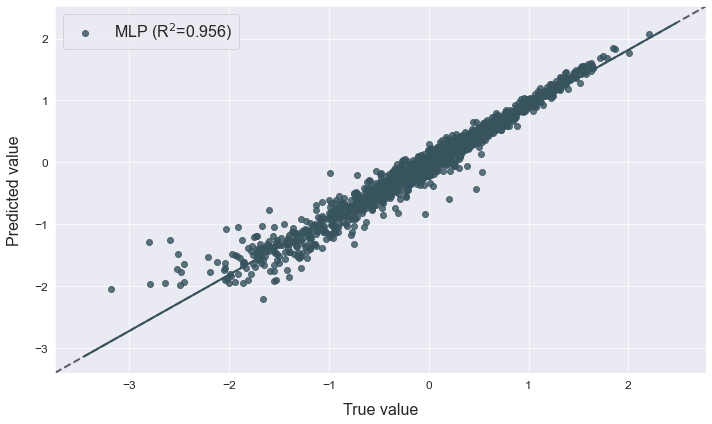

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


SFR ready!
<< ================== ATOM ================== >>
Algorithm task: regression.
Parallel processing with 7 cores.

Dataset stats ==================== >>
Shape: (8274, 10)
Scaled: False
Outlier values: 275 (0.4%)
-------------------------------------
Train set size: 6620
Test set size: 1654
-------------------------------------

Scaling features...
Pruning outliers...
 --> Dropping 186 outliers.

Training ========================= >>
Models: MLP
Metric: neg_median_absolute_error, r2



Running BO for Multi-layer Perceptron...
| call             | hidden_layer_sizes | hidden_layer_sizes | hidden_layer_sizes | activation |   alpha | batch_size | learning_rate | learning_rate_init | power_t | max_iter | neg_median_absolute_error | best_neg_median_absolute_error |      r2 | best_r2 |    time | total_time |
| ---------------- | ------------------ | ------------------ | ------------------ | ---------- | ------- | ---------- | ------------- | ------------------ | ------- | -------- | -

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 1  |       (82, 18, 78) |       (82, 18, 78) |       (82, 18, 78) |       relu |  0.0022 |         32 |           --- |              0.005 |     --- |      343 |                    -0.183 |                         -0.183 |  0.8792 |  0.8792 |  8.021s |     8.042s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 2  |       (15, 72, 94) |       (15, 72, 94) |       (15, 72, 94) |   identity |  0.0948 |        157 |           --- |              0.001 |     --- |      286 |                   -0.2394 |                         -0.183 |  0.7625 |  0.8792 | 10.064s |    18.223s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 3  |        (46, 5, 97) |        (46, 5, 97) |        (46, 5, 97) |   logistic |  0.0002 |        158 |           --- |              0.093 |     --- |      437 |                   -0.1724 |                        -0.1724 |  0.8987 |  0.8987 |  5.098s |    23.429s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 4  |        (71, 45, 1) |        (71, 45, 1) |        (71, 45, 1) |       tanh |  0.0049 |        101 |           --- |              0.003 |     --- |      357 |                   -0.1944 |                        -0.1724 |  0.8855 |  0.8987 |  7.892s |    31.431s |


Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 5  |       (65, 83, 17) |       (65, 83, 17) |       (65, 83, 17) |   logistic |  0.0004 |        191 |           --- |              0.003 |     --- |       64 |                   -0.2085 |                        -0.1724 |  0.8659 |  0.8987 |  6.062s |    37.602s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 6  |       (86, 45, 40) |       (86, 45, 40) |       (86, 45, 40) |       tanh |  0.0152 |         87 |           --- |              0.011 |     --- |      430 |                   -0.1456 |                        -0.1456 |  0.9152 |  0.9152 | 11.170s |    48.882s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 7  |       (77, 54, 59) |       (77, 54, 59) |       (77, 54, 59) |       tanh |  0.0066 |         75 |           --- |              0.002 |     --- |      241 |                   -0.1449 |                        -0.1449 |  0.9077 |  0.9152 | 11.882s |     1m:01s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 8  |        (46, 29, 1) |        (46, 29, 1) |        (46, 29, 1) |   logistic |  0.0136 |        199 |           --- |              0.071 |     --- |      462 |                   -0.1719 |                        -0.1449 |  0.8876 |  0.9152 |  4.447s |     1m:05s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 9  |       (87, 45, 10) |       (87, 45, 10) |       (87, 45, 10) |   logistic |  0.0102 |        169 |           --- |              0.004 |     --- |      222 |                    -0.207 |                        -0.1449 |  0.8555 |  0.9152 |  8.267s |     1m:14s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 10 |       (97, 85, 72) |       (97, 85, 72) |       (97, 85, 72) |   logistic |  0.0006 |         18 |           --- |              0.002 |     --- |      141 |                   -0.1995 |                        -0.1449 |   0.873 |  0.9152 | 22.816s |     1m:37s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 11 |       (91, 48, 56) |       (91, 48, 56) |       (91, 48, 56) |       relu |  0.0003 |        154 |           --- |              0.003 |     --- |      319 |                    -0.136 |                         -0.136 |  0.9232 |  0.9232 |  4.162s |     1m:41s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 12 |       (73, 88, 62) |       (73, 88, 62) |       (73, 88, 62) |   logistic |  0.0002 |        118 |           --- |              0.007 |     --- |      196 |                   -0.1678 |                         -0.136 |  0.8946 |  0.9232 | 18.949s |     2m:00s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 13 |       (21, 36, 91) |       (21, 36, 91) |       (21, 36, 91) |   logistic |  0.0088 |          8 |           --- |              0.004 |     --- |      290 |                   -0.2684 |                         -0.136 |  0.7946 |  0.9232 | 11.160s |     2m:11s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 14 |       (54, 69, 27) |       (54, 69, 27) |       (54, 69, 27) |   logistic |  0.0003 |         61 |           --- |              0.006 |     --- |      164 |                   -0.1606 |                         -0.136 |  0.9063 |  0.9232 |  6.849s |     2m:18s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 15 |       (32, 70, 71) |       (32, 70, 71) |       (32, 70, 71) |   identity |  0.0985 |         73 |           --- |              0.007 |     --- |      205 |                   -0.2682 |                         -0.136 |  0.7316 |  0.9232 |  5.409s |     2m:24s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 16 |       (67, 68, 53) |       (67, 68, 53) |       (67, 68, 53) |   logistic |  0.0046 |        151 |           --- |              0.005 |     --- |      411 |                   -0.1839 |                         -0.136 |  0.8788 |  0.9232 | 13.761s |     2m:38s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: htt

| Initial point 17 |       (52, 98, 40) |       (52, 98, 40) |       (52, 98, 40) |       relu |  0.0248 |         44 |           --- |              0.025 |     --- |      197 |                   -0.1938 |                         -0.136 |  0.8595 |  0.9232 |  6.291s |     2m:44s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 18 |       (30, 71, 81) |       (30, 71, 81) |       (30, 71, 81) |   logistic |  0.0002 |        236 |           --- |              0.011 |     --- |      354 |                   -0.2155 |                         -0.136 |  0.8671 |  0.9232 |  5.707s |     2m:50s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 19 |       (76, 21, 54) |       (76, 21, 54) |       (76, 21, 54) |       relu |  0.0005 |         50 |           --- |              0.011 |     --- |      498 |                   -0.1676 |                         -0.136 |  0.8806 |  0.9232 |  2.241s |     2m:53s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 20 |       (97, 56, 88) |       (97, 56, 88) |       (97, 56, 88) |   logistic |  0.0007 |        177 |           --- |              0.052 |     --- |      449 |                   -0.1707 |                         -0.136 |  0.8992 |  0.9232 | 10.240s |     3m:03s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 21 |       (87, 94, 79) |       (87, 94, 79) |       (87, 94, 79) |       relu |  0.0055 |         98 |           --- |              0.089 |     --- |      187 |                    -0.202 |                         -0.136 |  0.8092 |  0.9232 | 13.938s |     3m:17s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 22 |       (54, 45, 99) |       (54, 45, 99) |       (54, 45, 99) |   logistic |  0.0001 |        128 |           --- |              0.005 |     --- |      374 |                   -0.2014 |                         -0.136 |  0.8644 |  0.9232 |  7.175s |     3m:24s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 23 |       (38, 54, 51) |       (38, 54, 51) |       (38, 54, 51) |       relu |  0.0006 |        151 |           --- |              0.009 |     --- |      245 |                   -0.1406 |                         -0.136 |   0.907 |  0.9232 | 13.193s |     3m:38s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 24 |       (42, 65, 67) |       (42, 65, 67) |       (42, 65, 67) |       tanh |  0.0005 |        129 |           --- |              0.034 |     --- |      498 |                   -0.1797 |                         -0.136 |  0.8717 |  0.9232 | 13.343s |     3m:51s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 25 |       (52, 28, 88) |       (52, 28, 88) |       (52, 28, 88) |       relu |  0.0723 |         88 |           --- |              0.014 |     --- |       84 |                   -0.1736 |                         -0.136 |  0.8563 |  0.9232 |  1.741s |     3m:53s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 26 |       (38, 19, 27) |       (38, 19, 27) |       (38, 19, 27) |   logistic |  0.0013 |        104 |           --- |              0.072 |     --- |      144 |                   -0.1685 |                         -0.136 |  0.8858 |  0.9232 |  1.420s |     3m:55s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 27 |       (70, 36, 25) |       (70, 36, 25) |       (70, 36, 25) |   logistic |  0.0009 |        213 |           --- |              0.026 |     --- |      183 |                   -0.1719 |                         -0.136 |  0.9045 |  0.9232 |  5.321s |     3m:60s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 28 |       (48, 26, 61) |       (48, 26, 61) |       (48, 26, 61) |   identity |  0.0001 |        160 |           --- |              0.001 |     --- |       73 |                    -0.252 |                         -0.136 |  0.7722 |  0.9232 |  1.814s |     4m:02s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 29 |        (90, 3, 58) |        (90, 3, 58) |        (90, 3, 58) |   logistic |  0.0104 |         87 |           --- |              0.092 |     --- |      437 |                   -0.2339 |                         -0.136 |  0.8572 |  0.9232 |  2.683s |     4m:05s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 30 |        (33, 4, 30) |        (33, 4, 30) |        (33, 4, 30) |       relu |   0.001 |        208 |           --- |              0.085 |     --- |      429 |                   -0.4671 |                         -0.136 | -0.0086 |  0.9232 |  0.210s |     4m:05s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 31 |       (27, 41, 70) |       (27, 41, 70) |       (27, 41, 70) |   identity |  0.0003 |        243 |           --- |              0.001 |     --- |      245 |                   -0.2982 |                         -0.136 |  0.7416 |  0.9232 |  1.583s |     4m:07s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 32 |       (77, 25, 18) |       (77, 25, 18) |       (77, 25, 18) |   identity |  0.0019 |        175 |           --- |              0.068 |     --- |      158 |                   -0.2515 |                         -0.136 |  0.7723 |  0.9232 |  2.947s |     4m:10s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 33 |       (18, 18, 93) |       (18, 18, 93) |       (18, 18, 93) |       relu |  0.0035 |        167 |           --- |              0.029 |     --- |      305 |                   -0.1425 |                         -0.136 |  0.9069 |  0.9232 |  2.330s |     4m:12s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 34 |       (24, 12, 34) |       (24, 12, 34) |       (24, 12, 34) |   identity |  0.0002 |         83 |           --- |              0.002 |     --- |      394 |                   -0.3113 |                         -0.136 |  0.7083 |  0.9232 |  0.595s |     4m:13s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 35 |       (83, 35, 46) |       (83, 35, 46) |       (83, 35, 46) |       relu |  0.0001 |        238 |           --- |              0.003 |     --- |      470 |                   -0.1544 |                         -0.136 |  0.9049 |  0.9232 |  6.402s |     4m:19s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 36 |       (55, 54, 68) |       (55, 54, 68) |       (55, 54, 68) |       relu |  0.0679 |        237 |           --- |              0.019 |     --- |      355 |                   -0.1732 |                         -0.136 |  0.8938 |  0.9232 |  2.506s |     4m:22s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 37 |       (62, 13, 81) |       (62, 13, 81) |       (62, 13, 81) |       relu |  0.0075 |        207 |           --- |              0.003 |     --- |      147 |                   -0.1577 |                         -0.136 |  0.9083 |  0.9232 |  4.079s |     4m:26s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 38 |        (44, 4, 62) |        (44, 4, 62) |        (44, 4, 62) |   logistic |  0.0093 |        101 |           --- |              0.005 |     --- |      273 |                   -0.1886 |                         -0.136 |  0.8528 |  0.9232 |  1.874s |     4m:28s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 39 |       (72, 35, 94) |       (72, 35, 94) |       (72, 35, 94) |   identity |  0.0018 |        242 |           --- |              0.007 |     --- |      309 |                   -0.2543 |                         -0.136 |  0.7545 |  0.9232 |  2.054s |     4m:30s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 40 |       (76, 13, 25) |       (76, 13, 25) |       (76, 13, 25) |       relu |  0.0399 |        144 |           --- |              0.023 |     --- |      157 |                   -0.1698 |                         -0.136 |  0.8987 |  0.9232 |  0.782s |     4m:31s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 41 |       (44, 53, 50) |       (44, 53, 50) |       (44, 53, 50) |   logistic |  0.0008 |         32 |           --- |              0.083 |     --- |      210 |                    -0.186 |                         -0.136 |  0.8746 |  0.9232 |  4.000s |     4m:35s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 42 |       (96, 68, 48) |       (96, 68, 48) |       (96, 68, 48) |   logistic |  0.0002 |         30 |           --- |              0.013 |     --- |      476 |                   -0.1455 |                         -0.136 |   0.903 |  0.9232 |  5.708s |     4m:41s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 43 |       (80, 11, 93) |       (80, 11, 93) |       (80, 11, 93) |       tanh |  0.0972 |         22 |           --- |              0.012 |     --- |      486 |                   -0.2049 |                         -0.136 |  0.8361 |  0.9232 |  3.131s |     4m:44s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 44 |       (72, 84, 87) |       (72, 84, 87) |       (72, 84, 87) |       tanh |  0.0019 |         62 |           --- |              0.061 |     --- |      281 |                   -0.3083 |                         -0.136 |  0.7643 |  0.9232 |  5.485s |     4m:50s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 45 |       (31, 58, 86) |       (31, 58, 86) |       (31, 58, 86) |       tanh |  0.0005 |        228 |           --- |              0.005 |     --- |      267 |                   -0.1717 |                         -0.136 |  0.8843 |  0.9232 |  6.850s |     4m:57s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 46 |       (44, 71, 25) |       (44, 71, 25) |       (44, 71, 25) |   logistic |   0.002 |         69 |           --- |              0.014 |     --- |      395 |                   -0.1679 |                         -0.136 |  0.8769 |  0.9232 |  3.597s |     5m:01s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 47 |       (84, 74, 68) |       (84, 74, 68) |       (84, 74, 68) |   logistic |  0.0016 |        124 |           --- |              0.011 |     --- |      411 |                    -0.184 |                         -0.136 |  0.8685 |  0.9232 |  5.614s |     5m:06s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 48 |       (98, 56, 32) |       (98, 56, 32) |       (98, 56, 32) |   identity |  0.0594 |        230 |           --- |              0.025 |     --- |      125 |                   -0.2515 |                         -0.136 |  0.7424 |  0.9232 |  2.541s |     5m:09s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 49 |      (30, 29, 100) |      (30, 29, 100) |      (30, 29, 100) |       relu |  0.0014 |        186 |           --- |              0.083 |     --- |      228 |                   -0.1779 |                         -0.136 |  0.9006 |  0.9232 |  3.135s |     5m:12s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 50 |       (20, 34, 17) |       (20, 34, 17) |       (20, 34, 17) |       relu |  0.0015 |         64 |           --- |              0.005 |     --- |      254 |                   -0.1801 |                         -0.136 |  0.8884 |  0.9232 |  2.062s |     5m:15s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 51     |       (100, 3, 40) |       (100, 3, 40) |       (100, 3, 40) |       relu |  0.0089 |        160 |           --- |              0.005 |     --- |       50 |                   -0.1529 |                         -0.136 |  0.9034 |  0.9232 |  0.933s |     5m:18s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 52     |       (74, 77, 50) |       (74, 77, 50) |       (74, 77, 50) |       relu |  0.0001 |        250 |           --- |              0.004 |     --- |      242 |                   -0.1479 |                         -0.136 |  0.9176 |  0.9232 |  3.407s |     5m:23s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 53     |      (100, 84, 60) |      (100, 84, 60) |      (100, 84, 60) |       relu |  0.0001 |        217 |           --- |              0.001 |     --- |      230 |                   -0.1629 |                         -0.136 |  0.8909 |  0.9232 |  4.922s |     5m:30s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 54     |       (10, 14, 55) |       (10, 14, 55) |       (10, 14, 55) |       tanh |  0.0001 |        101 |           --- |              0.004 |     --- |      500 |                   -0.1926 |                         -0.136 |  0.8923 |  0.9232 |  1.272s |     5m:33s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 55     |      (10, 47, 100) |      (10, 47, 100) |      (10, 47, 100) |       relu |  0.0008 |        224 |           --- |              0.018 |     --- |      212 |                   -0.1579 |                         -0.136 |  0.9054 |  0.9232 |  4.250s |     5m:39s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 56     |      (100, 41, 29) |      (100, 41, 29) |      (100, 41, 29) |       relu |     0.1 |         65 |           --- |              0.013 |     --- |       50 |                   -0.1694 |                         -0.136 |  0.8856 |  0.9232 |  4.615s |     5m:45s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 57     |       (100, 5, 49) |       (100, 5, 49) |       (100, 5, 49) |       relu |     0.1 |         24 |           --- |              0.004 |     --- |      299 |                   -0.1908 |                         -0.136 |  0.8742 |  0.9232 |  4.493s |     5m:51s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 58     |      (100, 54, 81) |      (100, 54, 81) |      (100, 54, 81) |       tanh |     0.1 |        152 |           --- |              0.001 |     --- |       50 |                   -0.1696 |                         -0.136 |  0.8851 |  0.9232 |  5.371s |     5m:58s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 59     |      (33, 100, 57) |      (33, 100, 57) |      (33, 100, 57) |       relu |  0.0052 |        136 |           --- |              0.006 |     --- |      352 |                    -0.149 |                         -0.136 |  0.9161 |  0.9232 |  5.817s |     6m:05s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 60     |       (10, 18, 58) |       (10, 18, 58) |       (10, 18, 58) |       relu |  0.0001 |        237 |           --- |              0.008 |     --- |      126 |                    -0.176 |                         -0.136 |  0.8635 |  0.9232 |  2.899s |     6m:10s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 61     |        (10, 66, 5) |        (10, 66, 5) |        (10, 66, 5) |       tanh |  0.0023 |        239 |           --- |              0.033 |     --- |      495 |                   -0.1941 |                         -0.136 |  0.8908 |  0.9232 |  1.354s |     6m:13s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 62     |      (100, 36, 26) |      (100, 36, 26) |      (100, 36, 26) |       relu |  0.0001 |        179 |           --- |              0.004 |     --- |       83 |                   -0.1701 |                         -0.136 |  0.9016 |  0.9232 |  3.890s |     6m:18s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 63     |       (39, 17, 48) |       (39, 17, 48) |       (39, 17, 48) |       tanh |     0.1 |        211 |           --- |              0.005 |     --- |       50 |                   -0.1604 |                         -0.136 |  0.8812 |  0.9232 |  2.822s |     6m:23s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 64     |      (100, 90, 55) |      (100, 90, 55) |      (100, 90, 55) |       tanh |  0.0001 |        244 |           --- |              0.005 |     --- |       50 |                   -0.1683 |                         -0.136 |  0.9029 |  0.9232 |  5.540s |     6m:30s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 65     |       (95, 74, 46) |       (95, 74, 46) |       (95, 74, 46) |       tanh |  0.0001 |         31 |           --- |              0.016 |     --- |      229 |                   -0.2713 |                         -0.136 |  0.7948 |  0.9232 |  1.982s |     6m:33s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 66     |       (14, 81, 60) |       (14, 81, 60) |       (14, 81, 60) |       relu |  0.0001 |         92 |           --- |              0.003 |     --- |      499 |                    -0.151 |                         -0.136 |  0.9082 |  0.9232 |  6.500s |     6m:42s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 67     |       (91, 33, 27) |       (91, 33, 27) |       (91, 33, 27) |       tanh |  0.0028 |        208 |           --- |              0.001 |     --- |       50 |                   -0.1994 |                         -0.136 |   0.875 |  0.9232 |  4.416s |     6m:48s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 68     |       (14, 46, 99) |       (14, 46, 99) |       (14, 46, 99) |       tanh |     0.1 |        176 |           --- |              0.001 |     --- |      313 |                    -0.174 |                         -0.136 |  0.8922 |  0.9232 | 12.912s |     7m:03s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 69     |      (85, 64, 100) |      (85, 64, 100) |      (85, 64, 100) |       relu |  0.0008 |        112 |           --- |              0.017 |     --- |      356 |                   -0.1548 |                         -0.136 |  0.9008 |  0.9232 |  3.304s |     7m:08s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 70     |      (58, 35, 100) |      (58, 35, 100) |      (58, 35, 100) |       relu |     0.1 |        195 |           --- |              0.001 |     --- |       50 |                   -0.1753 |                         -0.136 |  0.8932 |  0.9232 |  8.367s |     7m:20s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 71     |        (76, 5, 67) |        (76, 5, 67) |        (76, 5, 67) |       tanh |     0.1 |         86 |           --- |              0.003 |     --- |      185 |                   -0.1571 |                         -0.136 |  0.8849 |  0.9232 |  3.517s |     7m:26s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 72     |        (93, 9, 60) |        (93, 9, 60) |        (93, 9, 60) |       relu |  0.0864 |        203 |           --- |              0.005 |     --- |      239 |                   -0.1782 |                         -0.136 |  0.8966 |  0.9232 |  3.638s |     7m:32s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 73     |       (30, 12, 84) |       (30, 12, 84) |       (30, 12, 84) |       tanh |  0.0001 |        136 |           --- |              0.002 |     --- |       50 |                   -0.1696 |                         -0.136 |   0.886 |  0.9232 |  3.623s |     7m:37s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 74     |       (10, 98, 52) |       (10, 98, 52) |       (10, 98, 52) |       relu |  0.0001 |        214 |           --- |              0.006 |     --- |      358 |                   -0.1596 |                         -0.136 |  0.9086 |  0.9232 |  5.164s |     7m:45s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 75     |       (91, 66, 42) |       (91, 66, 42) |       (91, 66, 42) |       tanh |     0.1 |        127 |           --- |              0.004 |     --- |      500 |                   -0.1868 |                         -0.136 |  0.8738 |  0.9232 |  9.444s |     7m:56s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 76     |     (100, 100, 39) |     (100, 100, 39) |     (100, 100, 39) |       relu |  0.0001 |        250 |           --- |              0.002 |     --- |      397 |                     -0.15 |                         -0.136 |  0.9081 |  0.9232 |  4.836s |     8m:03s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 77     |       (74, 14, 45) |       (74, 14, 45) |       (74, 14, 45) |   logistic |  0.0161 |        124 |           --- |              0.011 |     --- |       89 |                   -0.2418 |                         -0.136 |  0.8177 |  0.9232 |  1.509s |     8m:06s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 78     |           (55, 30) |           (55, 30) |           (55, 30) |   logistic |  0.0001 |        133 |           --- |              0.026 |     --- |      500 |                   -0.1603 |                         -0.136 |  0.9073 |  0.9232 |  1.750s |     8m:10s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 79     |       (52, 43, 19) |       (52, 43, 19) |       (52, 43, 19) |   logistic |  0.0001 |        104 |           --- |              0.004 |     --- |      500 |                   -0.1622 |                         -0.136 |  0.8814 |  0.9232 |  3.301s |     8m:15s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 80     |           (86, 72) |           (86, 72) |           (86, 72) |   logistic |  0.0001 |         42 |           --- |                0.1 |     --- |       50 |                   -0.1827 |                         -0.136 |  0.8675 |  0.9232 |  2.717s |     8m:20s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 81     |           (66, 75) |           (66, 75) |           (66, 75) |       relu |     0.1 |        149 |           --- |              0.001 |     --- |       50 |                   -0.1697 |                         -0.136 |  0.8976 |  0.9232 |  3.335s |     8m:26s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 82     |       (49, 65, 53) |       (49, 65, 53) |       (49, 65, 53) |       relu |  0.0001 |        209 |           --- |              0.002 |     --- |      238 |                    -0.145 |                         -0.136 |  0.9103 |  0.9232 |  8.599s |     8m:37s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 83     |      (100, 16, 36) |      (100, 16, 36) |      (100, 16, 36) |   logistic |  0.0001 |         44 |           --- |              0.006 |     --- |      313 |                   -0.1499 |                         -0.136 |  0.9045 |  0.9232 |  5.285s |     8m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 84     |       (10, 55, 51) |       (10, 55, 51) |       (10, 55, 51) |       relu |   0.001 |        250 |           --- |              0.003 |     --- |      195 |                   -0.1631 |                         -0.136 |  0.9107 |  0.9232 |  5.257s |     8m:52s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 85     |      (58, 83, 100) |      (58, 83, 100) |      (58, 83, 100) |       relu |  0.0001 |        209 |           --- |              0.001 |     --- |      500 |                   -0.1425 |                         -0.136 |  0.9206 |  0.9232 |  8.679s |     9m:03s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 86     |        (47, 8, 68) |        (47, 8, 68) |        (47, 8, 68) |       relu |  0.0001 |        250 |           --- |              0.001 |     --- |      500 |                   -0.1501 |                         -0.136 |  0.9163 |  0.9232 |  5.923s |     9m:12s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 87     |     (10, 100, 100) |     (10, 100, 100) |     (10, 100, 100) |       relu |  0.0001 |        250 |           --- |              0.001 |     --- |      345 |                   -0.1532 |                         -0.136 |  0.9018 |  0.9232 | 13.271s |     9m:27s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 88     |     (100, 39, 100) |     (100, 39, 100) |     (100, 39, 100) |       relu |     0.1 |        250 |           --- |              0.055 |     --- |       50 |                   -0.1944 |                         -0.136 |  0.8888 |  0.9232 |  2.527s |     9m:31s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 89     |          (72, 100) |          (72, 100) |          (72, 100) |   logistic |  0.0001 |         72 |           --- |              0.041 |     --- |      285 |                   -0.1594 |                         -0.136 |  0.9031 |  0.9232 | 12.597s |     9m:46s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 90     |     (10, 100, 100) |     (10, 100, 100) |     (10, 100, 100) |       relu |     0.1 |        250 |           --- |              0.001 |     --- |      500 |                   -0.1474 |                         -0.136 |  0.9114 |  0.9232 | 26.777s |    10m:16s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 91     |          (10, 100) |          (10, 100) |          (10, 100) |       relu |  0.0001 |        250 |           --- |              0.001 |     --- |      500 |                   -0.1549 |                         -0.136 |  0.8993 |  0.9232 | 10.819s |    10m:31s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 92     |      (98, 93, 100) |      (98, 93, 100) |      (98, 93, 100) |   identity |     0.1 |        244 |           --- |                0.1 |     --- |      500 |                   -0.2886 |                         -0.136 |  0.6813 |  0.9232 |  2.273s |    10m:36s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 93     |       (63, 73, 52) |       (63, 73, 52) |       (63, 73, 52) |   logistic |  0.0001 |         86 |           --- |              0.001 |     --- |      500 |                   -0.1795 |                         -0.136 |  0.8736 |  0.9232 | 20.074s |    10m:58s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 94     |       (46, 5, 100) |       (46, 5, 100) |       (46, 5, 100) |       relu |  0.0001 |        128 |           --- |              0.001 |     --- |      500 |                   -0.1501 |                         -0.136 |  0.9063 |  0.9232 |  6.136s |    11m:07s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 95     |      (59, 95, 100) |      (59, 95, 100) |      (59, 95, 100) |   logistic |  0.0001 |         50 |           --- |                0.1 |     --- |       50 |                   -0.4141 |                         -0.136 |  0.4644 |  0.9232 |  6.965s |    11m:16s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 96     |     (100, 64, 100) |     (100, 64, 100) |     (100, 64, 100) |   logistic |  0.0001 |          8 |           --- |               0.02 |     --- |      500 |                   -0.1851 |                         -0.136 |  0.8801 |  0.9232 | 14.213s |    11m:33s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 97     |      (26, 100, 78) |      (26, 100, 78) |      (26, 100, 78) |       relu |  0.0001 |        165 |           --- |              0.001 |     --- |      500 |                   -0.1531 |                         -0.136 |  0.9115 |  0.9232 |  7.978s |    11m:43s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 98     |      (78, 54, 100) |      (78, 54, 100) |      (78, 54, 100) |       relu |  0.0001 |        224 |           --- |              0.001 |     --- |      500 |                   -0.1451 |                         -0.136 |  0.9059 |  0.9232 |  8.251s |    11m:55s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 99     |       (18, 96, 97) |       (18, 96, 97) |       (18, 96, 97) |       relu |  0.0214 |        222 |           --- |              0.005 |     --- |      486 |                   -0.1683 |                         -0.136 |   0.901 |  0.9232 |  4.789s |    12m:02s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 100    |       (18, 76, 67) |       (18, 76, 67) |       (18, 76, 67) |       relu |  0.0001 |        176 |           --- |              0.001 |     --- |      393 |                   -0.1597 |                         -0.136 |  0.9051 |  0.9232 | 11.626s |    12m:16s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To


Results for Multi-layer Perceptron:         
Bayesian Optimization ---------------------------
Best call --> Initial point 11
Best parameters --> {'hidden_layer_sizes': (91, 48, 56), 'activation': 'relu', 'alpha': 0.0003, 'batch_size': 154, 'learning_rate_init': 0.003, 'max_iter': 319}
Best evaluation --> neg_median_absolute_error: -0.136   r2: 0.9232
Time elapsed: 12m:20s
Fit ---------------------------------------------
Train evaluation --> neg_median_absolute_error: -0.1323   r2: 0.9269
Test evaluation --> neg_median_absolute_error: -0.1369   r2: 0.9191
Time elapsed: 8.366s
Bootstrap ---------------------------------------
Evaluation --> neg_median_absolute_error: -0.1447 ± 0.0063   r2: 0.9139 ± 0.0026
Time elapsed: 29.475s
-------------------------------------------------
Total time: 12m:58s


Final results ==================== >>
Duration: 12m:58s
-------------------------------------
Multi-layer Perceptron --> neg_median_absolute_error: -0.1447 ± 0.0063   r2: 0.9139 ± 0.0026 ~


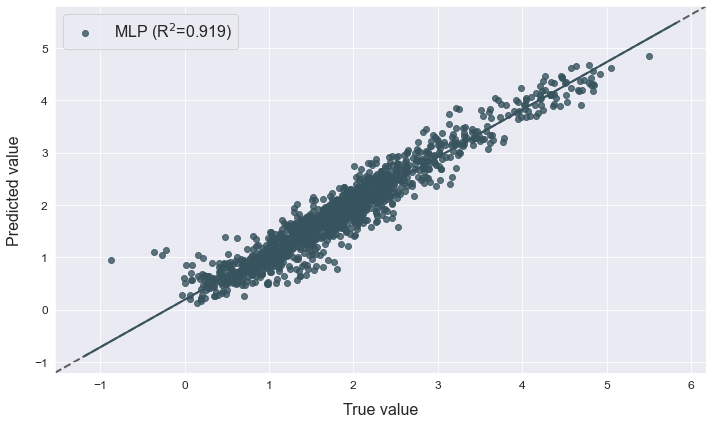

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


ISRF ready!
<< ================== ATOM ================== >>
Algorithm task: regression.
Parallel processing with 7 cores.

Dataset stats ==================== >>
Shape: (8274, 10)
Scaled: False
Outlier values: 180 (0.3%)
-------------------------------------
Train set size: 6620
Test set size: 1654
-------------------------------------

Scaling features...
Pruning outliers...
 --> Dropping 96 outliers.

Training ========================= >>
Models: MLP
Metric: neg_median_absolute_error, r2



Running BO for Multi-layer Perceptron...
| call             | hidden_layer_sizes | hidden_layer_sizes | hidden_layer_sizes | activation |   alpha | batch_size | learning_rate | learning_rate_init | power_t | max_iter | neg_median_absolute_error | best_neg_median_absolute_error |      r2 | best_r2 |    time | total_time |
| ---------------- | ------------------ | ------------------ | ------------------ | ---------- | ------- | ---------- | ------------- | ------------------ | ------- | -------- | -

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 1  |       (82, 18, 78) |       (82, 18, 78) |       (82, 18, 78) |       relu |  0.0022 |         32 |           --- |              0.005 |     --- |      343 |                   -0.1293 |                        -0.1293 |  0.8375 |  0.8375 |  2.508s |     2.529s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 2  |       (15, 72, 94) |       (15, 72, 94) |       (15, 72, 94) |   identity |  0.0948 |        157 |           --- |              0.001 |     --- |      286 |                    -0.179 |                        -0.1293 |  0.7517 |  0.8375 |  9.061s |    11.700s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 3  |        (46, 5, 97) |        (46, 5, 97) |        (46, 5, 97) |   logistic |  0.0002 |        158 |           --- |              0.093 |     --- |      437 |                   -0.4162 |                        -0.1293 | -0.0001 |  0.8375 |  1.716s |    13.528s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 4  |        (71, 45, 1) |        (71, 45, 1) |        (71, 45, 1) |       tanh |  0.0049 |        101 |           --- |              0.003 |     --- |      357 |                   -0.1142 |                        -0.1142 |  0.8491 |  0.8491 |  7.603s |    21.241s |


Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 5  |       (65, 83, 17) |       (65, 83, 17) |       (65, 83, 17) |   logistic |  0.0004 |        191 |           --- |              0.003 |     --- |       64 |                   -0.1624 |                        -0.1142 |  0.7651 |  0.8491 |  5.683s |    27.034s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 6  |       (86, 45, 40) |       (86, 45, 40) |       (86, 45, 40) |       tanh |  0.0152 |         87 |           --- |              0.011 |     --- |      430 |                   -0.1188 |                        -0.1142 |  0.8434 |  0.8491 |  6.089s |    33.233s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 7  |       (77, 54, 59) |       (77, 54, 59) |       (77, 54, 59) |       tanh |  0.0066 |         75 |           --- |              0.002 |     --- |      241 |                     -0.12 |                        -0.1142 |  0.8533 |  0.8533 | 16.750s |    50.095s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 8  |        (46, 29, 1) |        (46, 29, 1) |        (46, 29, 1) |   logistic |  0.0136 |        199 |           --- |              0.071 |     --- |      462 |                   -0.4045 |                        -0.1142 | -0.0009 |  0.8533 |  1.168s |    51.375s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 9  |       (87, 45, 10) |       (87, 45, 10) |       (87, 45, 10) |   logistic |  0.0102 |        169 |           --- |              0.004 |     --- |      222 |                   -0.1677 |                        -0.1142 |  0.7719 |  0.8533 |  6.177s |    57.662s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 10 |       (97, 85, 72) |       (97, 85, 72) |       (97, 85, 72) |   logistic |  0.0006 |         18 |           --- |              0.002 |     --- |      141 |                   -0.1624 |                        -0.1142 |  0.7568 |  0.8533 | 11.027s |     1m:09s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 11 |       (91, 48, 56) |       (91, 48, 56) |       (91, 48, 56) |       relu |  0.0003 |        154 |           --- |              0.003 |     --- |      319 |                    -0.109 |                         -0.109 |  0.8619 |  0.8619 |  5.116s |     1m:14s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 12 |       (73, 88, 62) |       (73, 88, 62) |       (73, 88, 62) |   logistic |  0.0002 |        118 |           --- |              0.007 |     --- |      196 |                   -0.1172 |                         -0.109 |  0.8349 |  0.8619 | 15.861s |     1m:31s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 13 |       (21, 36, 91) |       (21, 36, 91) |       (21, 36, 91) |   logistic |  0.0088 |          8 |           --- |              0.004 |     --- |      290 |                   -0.1722 |                         -0.109 |  0.7332 |  0.8619 | 20.912s |     1m:52s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 14 |       (54, 69, 27) |       (54, 69, 27) |       (54, 69, 27) |   logistic |  0.0003 |         61 |           --- |              0.006 |     --- |      164 |                   -0.1325 |                         -0.109 |  0.8017 |  0.8619 |  5.134s |     1m:57s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 15 |       (32, 70, 71) |       (32, 70, 71) |       (32, 70, 71) |   identity |  0.0985 |         73 |           --- |              0.007 |     --- |      205 |                   -0.2019 |                         -0.109 |  0.6819 |  0.8619 |  6.909s |     2m:04s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 16 |       (67, 68, 53) |       (67, 68, 53) |       (67, 68, 53) |   logistic |  0.0046 |        151 |           --- |              0.005 |     --- |      411 |                   -0.1385 |                         -0.109 |  0.8041 |  0.8619 | 10.407s |     2m:15s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 17 |       (52, 98, 40) |       (52, 98, 40) |       (52, 98, 40) |       relu |  0.0248 |         44 |           --- |              0.025 |     --- |      197 |                   -0.1653 |                         -0.109 |  0.7472 |  0.8619 |  1.243s |     2m:20s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 18 |       (30, 71, 81) |       (30, 71, 81) |       (30, 71, 81) |   logistic |  0.0002 |        236 |           --- |              0.011 |     --- |      354 |                   -0.1218 |                         -0.109 |  0.8187 |  0.8619 | 11.231s |     2m:31s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 19 |       (76, 21, 54) |       (76, 21, 54) |       (76, 21, 54) |       relu |  0.0005 |         50 |           --- |              0.011 |     --- |      498 |                   -0.1145 |                         -0.109 |  0.8572 |  0.8619 |  3.848s |     2m:35s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 20 |       (97, 56, 88) |       (97, 56, 88) |       (97, 56, 88) |   logistic |  0.0007 |        177 |           --- |              0.052 |     --- |      449 |                   -0.1319 |                         -0.109 |  0.8113 |  0.8619 |  6.070s |     2m:41s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 21 |       (87, 94, 79) |       (87, 94, 79) |       (87, 94, 79) |       relu |  0.0055 |         98 |           --- |              0.089 |     --- |      187 |                   -0.3688 |                         -0.109 |  0.0861 |  0.8619 |  2.794s |     2m:44s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 22 |       (54, 45, 99) |       (54, 45, 99) |       (54, 45, 99) |   logistic |  0.0001 |        128 |           --- |              0.005 |     --- |      374 |                   -0.1713 |                         -0.109 |  0.7684 |  0.8619 | 19.089s |     3m:03s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 23 |       (38, 54, 51) |       (38, 54, 51) |       (38, 54, 51) |       relu |  0.0006 |        151 |           --- |              0.009 |     --- |      245 |                   -0.1135 |                         -0.109 |  0.8651 |  0.8651 |  1.611s |     3m:05s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 24 |       (42, 65, 67) |       (42, 65, 67) |       (42, 65, 67) |       tanh |  0.0005 |        129 |           --- |              0.034 |     --- |      498 |                   -0.1423 |                         -0.109 |  0.8257 |  0.8651 |  5.891s |     3m:11s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 25 |       (52, 28, 88) |       (52, 28, 88) |       (52, 28, 88) |       relu |  0.0723 |         88 |           --- |              0.014 |     --- |       84 |                   -0.1444 |                         -0.109 |  0.7864 |  0.8651 |  1.072s |     3m:12s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 26 |       (38, 19, 27) |       (38, 19, 27) |       (38, 19, 27) |   logistic |  0.0013 |        104 |           --- |              0.072 |     --- |      144 |                   -0.1296 |                         -0.109 |  0.7722 |  0.8651 |  1.547s |     3m:14s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 27 |       (70, 36, 25) |       (70, 36, 25) |       (70, 36, 25) |   logistic |  0.0009 |        213 |           --- |              0.026 |     --- |      183 |                   -0.1203 |                         -0.109 |  0.8475 |  0.8651 |  5.184s |     3m:19s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 28 |       (48, 26, 61) |       (48, 26, 61) |       (48, 26, 61) |   identity |  0.0001 |        160 |           --- |              0.001 |     --- |       73 |                   -0.1736 |                         -0.109 |  0.7331 |  0.8651 |  2.612s |     3m:23s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 29 |        (90, 3, 58) |        (90, 3, 58) |        (90, 3, 58) |   logistic |  0.0104 |         87 |           --- |              0.092 |     --- |      437 |                   -0.1761 |                         -0.109 |  0.7252 |  0.8651 |  1.437s |     3m:25s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 30 |        (33, 4, 30) |        (33, 4, 30) |        (33, 4, 30) |       relu |   0.001 |        208 |           --- |              0.085 |     --- |      429 |                   -0.3958 |                         -0.109 |  -0.001 |  0.8651 |  0.231s |     3m:25s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 31 |       (27, 41, 70) |       (27, 41, 70) |       (27, 41, 70) |   identity |  0.0003 |        243 |           --- |              0.001 |     --- |      245 |                     -0.18 |                         -0.109 |  0.7322 |  0.8651 |  2.619s |     3m:28s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 32 |       (77, 25, 18) |       (77, 25, 18) |       (77, 25, 18) |   identity |  0.0019 |        175 |           --- |              0.068 |     --- |      158 |                   -0.1791 |                         -0.109 |  0.7445 |  0.8651 |  2.066s |     3m:30s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 33 |       (18, 18, 93) |       (18, 18, 93) |       (18, 18, 93) |       relu |  0.0035 |        167 |           --- |              0.029 |     --- |      305 |                   -0.1155 |                         -0.109 |  0.8429 |  0.8651 |  1.562s |     3m:32s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 34 |       (24, 12, 34) |       (24, 12, 34) |       (24, 12, 34) |   identity |  0.0002 |         83 |           --- |              0.002 |     --- |      394 |                   -0.1877 |                         -0.109 |  0.7206 |  0.8651 |  0.818s |     3m:33s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 35 |       (83, 35, 46) |       (83, 35, 46) |       (83, 35, 46) |       relu |  0.0001 |        238 |           --- |              0.003 |     --- |      470 |                   -0.1111 |                         -0.109 |   0.869 |   0.869 |  7.354s |     3m:40s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 36 |       (55, 54, 68) |       (55, 54, 68) |       (55, 54, 68) |       relu |  0.0679 |        237 |           --- |              0.019 |     --- |      355 |                   -0.1172 |                         -0.109 |  0.8654 |   0.869 |  4.225s |     3m:44s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 37 |       (62, 13, 81) |       (62, 13, 81) |       (62, 13, 81) |       relu |  0.0075 |        207 |           --- |              0.003 |     --- |      147 |                   -0.1196 |                         -0.109 |  0.8449 |   0.869 |  3.571s |     3m:48s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 38 |        (44, 4, 62) |        (44, 4, 62) |        (44, 4, 62) |   logistic |  0.0093 |        101 |           --- |              0.005 |     --- |      273 |                   -0.1505 |                         -0.109 |  0.7649 |   0.869 |  1.682s |     3m:50s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 39 |       (72, 35, 94) |       (72, 35, 94) |       (72, 35, 94) |   identity |  0.0018 |        242 |           --- |              0.007 |     --- |      309 |                   -0.1741 |                         -0.109 |  0.7032 |   0.869 |  2.287s |     3m:52s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 40 |       (76, 13, 25) |       (76, 13, 25) |       (76, 13, 25) |       relu |  0.0399 |        144 |           --- |              0.023 |     --- |      157 |                   -0.1223 |                         -0.109 |  0.7991 |   0.869 |  1.329s |     3m:54s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 41 |       (44, 53, 50) |       (44, 53, 50) |       (44, 53, 50) |   logistic |  0.0008 |         32 |           --- |              0.083 |     --- |      210 |                   -0.1629 |                         -0.109 |  0.7045 |   0.869 |  3.862s |     3m:58s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 42 |       (96, 68, 48) |       (96, 68, 48) |       (96, 68, 48) |   logistic |  0.0002 |         30 |           --- |              0.013 |     --- |      476 |                   -0.1429 |                         -0.109 |   0.802 |   0.869 |  5.739s |     4m:04s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 43 |       (80, 11, 93) |       (80, 11, 93) |       (80, 11, 93) |       tanh |  0.0972 |         22 |           --- |              0.012 |     --- |      486 |                   -0.1802 |                         -0.109 |  0.7242 |   0.869 |  2.132s |     4m:06s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 44 |       (72, 84, 87) |       (72, 84, 87) |       (72, 84, 87) |       tanh |  0.0019 |         62 |           --- |              0.061 |     --- |      281 |                   -0.1713 |                         -0.109 |  0.7396 |   0.869 | 13.705s |     4m:20s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 45 |       (31, 58, 86) |       (31, 58, 86) |       (31, 58, 86) |       tanh |  0.0005 |        228 |           --- |              0.005 |     --- |      267 |                   -0.1086 |                        -0.1086 |  0.8709 |  0.8709 | 12.548s |     4m:32s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 46 |       (44, 71, 25) |       (44, 71, 25) |       (44, 71, 25) |   logistic |   0.002 |         69 |           --- |              0.014 |     --- |      395 |                   -0.1371 |                        -0.1086 |  0.8203 |  0.8709 |  4.155s |     4m:37s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 47 |       (84, 74, 68) |       (84, 74, 68) |       (84, 74, 68) |   logistic |  0.0016 |        124 |           --- |              0.011 |     --- |      411 |                   -0.1216 |                        -0.1086 |   0.836 |  0.8709 | 13.285s |     4m:50s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 48 |       (98, 56, 32) |       (98, 56, 32) |       (98, 56, 32) |   identity |  0.0594 |        230 |           --- |              0.025 |     --- |      125 |                   -0.1809 |                        -0.1086 |   0.746 |  0.8709 |  3.107s |     4m:53s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 49 |      (30, 29, 100) |      (30, 29, 100) |      (30, 29, 100) |       relu |  0.0014 |        186 |           --- |              0.083 |     --- |      228 |                   -0.3941 |                        -0.1086 | -0.0091 |  0.8709 |  1.695s |     4m:55s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 50 |       (20, 34, 17) |       (20, 34, 17) |       (20, 34, 17) |       relu |  0.0015 |         64 |           --- |              0.005 |     --- |      254 |                   -0.1153 |                        -0.1086 |   0.846 |  0.8709 |  2.629s |     4m:58s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 51     |       (99, 77, 23) |       (99, 77, 23) |       (99, 77, 23) |   identity |  0.0039 |        105 |           --- |               0.04 |     --- |      333 |                   -0.1814 |                        -0.1086 |  0.7195 |  0.8709 |  4.337s |     5m:09s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 52     |        (61, 70, 1) |        (61, 70, 1) |        (61, 70, 1) |       tanh |  0.0003 |        179 |           --- |              0.008 |     --- |      408 |                   -0.4109 |                        -0.1086 | -0.0003 |  0.8709 |  1.900s |     5m:12s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 53     |       (57, 38, 36) |       (57, 38, 36) |       (57, 38, 36) |       tanh |  0.0001 |        155 |           --- |              0.005 |     --- |      220 |                   -0.1134 |                        -0.1086 |  0.8694 |  0.8709 |  9.083s |     5m:23s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 54     |       (31, 34, 37) |       (31, 34, 37) |       (31, 34, 37) |   logistic |  0.0007 |        103 |           --- |              0.062 |     --- |       50 |                   -0.1295 |                        -0.1086 |  0.8276 |  0.8709 |  1.369s |     5m:26s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 55     |       (11, 86, 27) |       (11, 86, 27) |       (11, 86, 27) |       tanh |  0.0001 |          8 |           --- |              0.004 |     --- |       50 |                   -0.1266 |                        -0.1086 |  0.8364 |  0.8709 | 10.871s |     5m:38s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 56     |       (94, 16, 19) |       (94, 16, 19) |       (94, 16, 19) |       tanh |     0.1 |        231 |           --- |              0.004 |     --- |      403 |                   -0.1291 |                        -0.1086 |  0.8176 |  0.8709 |  7.579s |     5m:47s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 57     |      (72, 60, 100) |      (72, 60, 100) |      (72, 60, 100) |   identity |     0.1 |          8 |           --- |               0.04 |     --- |      500 |                   -0.6414 |                        -0.1086 | -2.6666 |  0.8709 |  4.286s |     5m:53s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 58     |             (100,) |             (100,) |             (100,) |       tanh |     0.1 |        250 |           --- |              0.001 |     --- |      456 |                   -0.1502 |                        -0.1086 |  0.7713 |  0.8709 |  4.623s |     5m:59s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 59     |       (58, 22, 80) |       (58, 22, 80) |       (58, 22, 80) |   logistic |  0.0014 |        202 |           --- |              0.041 |     --- |      226 |                   -0.1318 |                        -0.1086 |  0.8349 |  0.8709 |  5.315s |     6m:06s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 60     |             (100,) |             (100,) |             (100,) |   identity |  0.0112 |         80 |           --- |              0.093 |     --- |      497 |                   -0.1762 |                        -0.1086 |  0.6528 |  0.8709 |  0.435s |     6m:08s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 61     |       (41, 26, 77) |       (41, 26, 77) |       (41, 26, 77) |       tanh |  0.0002 |        115 |           --- |              0.003 |     --- |      334 |                   -0.1107 |                        -0.1086 |  0.8702 |  0.8709 |  5.151s |     6m:14s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 62     |      (50, 73, 100) |      (50, 73, 100) |      (50, 73, 100) |   logistic |  0.0015 |         12 |           --- |              0.019 |     --- |       90 |                   -0.1462 |                        -0.1086 |  0.7829 |  0.8709 | 11.123s |     6m:27s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 63     |         (89, 2, 5) |         (89, 2, 5) |         (89, 2, 5) |       tanh |  0.0002 |        235 |           --- |              0.009 |     --- |      245 |                    -0.128 |                        -0.1086 |  0.8557 |  0.8709 |  2.546s |     6m:32s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 64     |       (23, 45, 88) |       (23, 45, 88) |       (23, 45, 88) |       tanh |  0.0003 |        250 |           --- |              0.019 |     --- |      286 |                   -0.1096 |                        -0.1086 |  0.8652 |  0.8709 |  9.555s |     6m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 65     |       (10, 59, 29) |       (10, 59, 29) |       (10, 59, 29) |       relu |  0.0021 |         31 |           --- |              0.007 |     --- |      306 |                   -0.1269 |                        -0.1086 |  0.8434 |  0.8709 |  3.332s |     6m:50s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 66     |       (89, 46, 50) |       (89, 46, 50) |       (89, 46, 50) |       relu |     0.1 |        100 |           --- |              0.003 |     --- |      500 |                   -0.1297 |                        -0.1086 |  0.8231 |  0.8709 |  9.721s |     7m:02s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 67     |       (96, 19, 87) |       (96, 19, 87) |       (96, 19, 87) |   logistic |   0.001 |        213 |           --- |              0.034 |     --- |      440 |                   -0.1515 |                        -0.1086 |  0.7944 |  0.8709 |  4.096s |     7m:09s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 68     |           (12, 87) |           (12, 87) |           (12, 87) |   identity |  0.0003 |        245 |           --- |              0.011 |     --- |      215 |                   -0.1833 |                        -0.1086 |  0.7081 |  0.8709 |  0.860s |     7m:11s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 69     |       (10, 59, 53) |       (10, 59, 53) |       (10, 59, 53) |       tanh |     0.1 |        248 |           --- |              0.008 |     --- |      271 |                   -0.1397 |                        -0.1086 |  0.8039 |  0.8709 |  3.669s |     7m:17s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 70     |    (100, 100, 100) |    (100, 100, 100) |    (100, 100, 100) |       tanh |  0.0001 |        250 |           --- |              0.001 |     --- |       50 |                   -0.1347 |                        -0.1086 |  0.8288 |  0.8709 |  5.838s |     7m:24s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 71     |       (88, 12, 84) |       (88, 12, 84) |       (88, 12, 84) |       tanh |  0.0015 |        250 |           --- |              0.003 |     --- |      241 |                   -0.1205 |                        -0.1086 |  0.8317 |  0.8709 |  5.389s |     7m:31s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 72     |            (58, 8) |            (58, 8) |            (58, 8) |       tanh |  0.0453 |         44 |           --- |              0.001 |     --- |       78 |                   -0.1302 |                        -0.1086 |  0.8015 |  0.8709 |  2.717s |     7m:36s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 73     |       (20, 83, 21) |       (20, 83, 21) |       (20, 83, 21) |       tanh |  0.0453 |         96 |           --- |              0.021 |     --- |       50 |                   -0.1335 |                        -0.1086 |  0.7873 |  0.8709 |  1.584s |     7m:39s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 74     |      (100, 74, 55) |      (100, 74, 55) |      (100, 74, 55) |       tanh |  0.0015 |        250 |           --- |              0.005 |     --- |      437 |                   -0.1189 |                        -0.1086 |  0.8616 |  0.8709 | 12.304s |     7m:53s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 75     |     (21, 100, 100) |     (21, 100, 100) |     (21, 100, 100) |       tanh |  0.0001 |        250 |           --- |              0.001 |     --- |      500 |                   -0.1357 |                        -0.1086 |  0.8361 |  0.8709 | 12.803s |     8m:07s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 76     |      (67, 100, 71) |      (67, 100, 71) |      (67, 100, 71) |       tanh |  0.0013 |        250 |           --- |              0.029 |     --- |      500 |                   -0.1205 |                        -0.1086 |  0.8244 |  0.8709 |  8.455s |     8m:17s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 77     |       (31, 89, 81) |       (31, 89, 81) |       (31, 89, 81) |       tanh |  0.0001 |        250 |           --- |               0.02 |     --- |      308 |                   -0.1222 |                        -0.1086 |   0.852 |  0.8709 |  5.993s |     8m:25s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 78     |       (10, 3, 100) |       (10, 3, 100) |       (10, 3, 100) |       tanh |  0.0001 |        250 |           --- |              0.001 |     --- |      500 |                   -0.1426 |                        -0.1086 |   0.793 |  0.8709 |  6.963s |     8m:34s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 79     |       (99, 17, 48) |       (99, 17, 48) |       (99, 17, 48) |       tanh |  0.0001 |        235 |           --- |               0.02 |     --- |      343 |                   -0.1252 |                        -0.1086 |   0.838 |  0.8709 |  5.040s |     8m:41s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 80     |      (70, 30, 100) |      (70, 30, 100) |      (70, 30, 100) |       tanh |  0.0001 |        250 |           --- |              0.001 |     --- |       50 |                   -0.1291 |                        -0.1086 |  0.8261 |  0.8709 |  5.973s |     8m:49s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 81     |       (11, 24, 12) |       (11, 24, 12) |       (11, 24, 12) |       relu |  0.0002 |         65 |           --- |              0.003 |     --- |      237 |                   -0.1119 |                        -0.1086 |   0.841 |  0.8709 |  2.026s |     8m:54s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 82     |      (42, 100, 40) |      (42, 100, 40) |      (42, 100, 40) |       relu |  0.0036 |          8 |           --- |              0.011 |     --- |      221 |                   -0.1389 |                        -0.1086 |  0.7927 |  0.8709 | 10.184s |     9m:06s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 83     |       (55, 62, 69) |       (55, 62, 69) |       (55, 62, 69) |       tanh |  0.0001 |        250 |           --- |              0.007 |     --- |      320 |                   -0.1131 |                        -0.1086 |  0.8564 |  0.8709 | 11.361s |     9m:20s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 84     |      (54, 100, 45) |      (54, 100, 45) |      (54, 100, 45) |   logistic |   0.094 |        250 |           --- |              0.017 |     --- |      399 |                   -0.1818 |                        -0.1086 |  0.7151 |  0.8709 |  6.700s |     9m:30s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 85     |              (29,) |              (29,) |              (29,) |   logistic |  0.0368 |         45 |           --- |              0.005 |     --- |      366 |                   -0.1608 |                        -0.1086 |  0.7272 |  0.8709 |  1.025s |     9m:35s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 86     |              (46,) |              (46,) |              (46,) |   logistic |  0.0512 |         13 |           --- |               0.01 |     --- |      282 |                   -0.1785 |                        -0.1086 |  0.6898 |  0.8709 |  2.887s |     9m:40s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 87     |              (50,) |              (50,) |              (50,) |       relu |  0.0001 |        184 |           --- |              0.017 |     --- |      458 |                   -0.1269 |                        -0.1086 |  0.8279 |  0.8709 |  0.481s |     9m:43s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 88     |       (88, 57, 38) |       (88, 57, 38) |       (88, 57, 38) |       tanh |  0.0051 |          8 |           --- |              0.006 |     --- |      406 |                   -0.1468 |                        -0.1086 |  0.7515 |  0.8709 |  8.494s |     9m:54s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 89     |      (10, 36, 100) |      (10, 36, 100) |      (10, 36, 100) |       tanh |  0.0001 |          8 |           --- |              0.022 |     --- |      211 |                   -0.1735 |                        -0.1086 |  0.7261 |  0.8709 |  3.416s |     9m:59s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 90     |        (80, 52, 7) |        (80, 52, 7) |        (80, 52, 7) |       relu |  0.0021 |         13 |           --- |              0.005 |     --- |      203 |                   -0.1248 |                        -0.1086 |  0.8495 |  0.8709 |  9.338s |    10m:11s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 91     |       (10, 51, 59) |       (10, 51, 59) |       (10, 51, 59) |   identity |  0.0052 |        250 |           --- |              0.011 |     --- |      340 |                   -0.1913 |                        -0.1086 |  0.6698 |  0.8709 |  1.133s |    10m:14s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 92     |       (67, 37, 47) |       (67, 37, 47) |       (67, 37, 47) |       tanh |  0.0101 |         95 |           --- |              0.012 |     --- |      312 |                   -0.1522 |                        -0.1086 |  0.7776 |  0.8709 |  0.940s |    10m:18s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 93     |           (81, 86) |           (81, 86) |           (81, 86) |   identity |  0.0001 |        130 |           --- |              0.021 |     --- |      312 |                   -0.1904 |                        -0.1086 |  0.6989 |  0.8709 |  1.805s |    10m:22s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 94     |       (34, 46, 42) |       (34, 46, 42) |       (34, 46, 42) |       tanh |  0.0001 |        213 |           --- |              0.005 |     --- |      204 |                   -0.1173 |                        -0.1086 |  0.8503 |  0.8709 |  9.745s |    10m:34s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 95     |       (26, 75, 77) |       (26, 75, 77) |       (26, 75, 77) |   logistic |  0.0001 |        212 |           --- |              0.026 |     --- |      107 |                   -0.1653 |                        -0.1086 |  0.7645 |  0.8709 |  7.153s |    10m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 96     |        (29, 8, 85) |        (29, 8, 85) |        (29, 8, 85) |       tanh |  0.0001 |         80 |           --- |              0.003 |     --- |       50 |                   -0.1217 |                        -0.1086 |  0.8118 |  0.8709 |  1.975s |    10m:49s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 97     |       (60, 94, 52) |       (60, 94, 52) |       (60, 94, 52) |       tanh |  0.0001 |        124 |           --- |              0.003 |     --- |       50 |                   -0.1149 |                        -0.1086 |   0.854 |  0.8709 |  7.969s |    11m:01s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 98     |       (25, 68, 44) |       (25, 68, 44) |       (25, 68, 44) |       relu |  0.0002 |        105 |           --- |              0.006 |     --- |      357 |                   -0.1074 |                        -0.1074 |  0.8578 |  0.8709 |  4.187s |    11m:08s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 99     |      (26, 65, 100) |      (26, 65, 100) |      (26, 65, 100) |       tanh |     0.1 |        156 |           --- |              0.037 |     --- |      410 |                   -0.1392 |                        -0.1074 |  0.8032 |  0.8709 |  6.731s |    11m:18s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 100    |              (41,) |              (41,) |              (41,) |       tanh |  0.0001 |        145 |           --- |              0.012 |     --- |      206 |                   -0.1277 |                        -0.1074 |  0.8335 |  0.8709 |  1.338s |    11m:22s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To


Results for Multi-layer Perceptron:         
Bayesian Optimization ---------------------------
Best call --> Iteration 98
Best parameters --> {'hidden_layer_sizes': (25, 68, 44), 'activation': 'relu', 'alpha': 0.0002, 'batch_size': 105, 'learning_rate_init': 0.006, 'max_iter': 357}
Best evaluation --> neg_median_absolute_error: -0.1074   r2: 0.8578
Time elapsed: 11m:28s
Fit ---------------------------------------------
Train evaluation --> neg_median_absolute_error: -0.118   r2: 0.8704
Test evaluation --> neg_median_absolute_error: -0.1196   r2: 0.8489
Time elapsed: 19.989s
Bootstrap ---------------------------------------
Evaluation --> neg_median_absolute_error: -0.1096 ± 0.0035   r2: 0.8553 ± 0.0073
Time elapsed: 38.593s
-------------------------------------------------
Total time: 12m:27s


Final results ==================== >>
Duration: 12m:27s
-------------------------------------
Multi-layer Perceptron --> neg_median_absolute_error: -0.1096 ± 0.0035   r2: 0.8553 ± 0.0073 ~


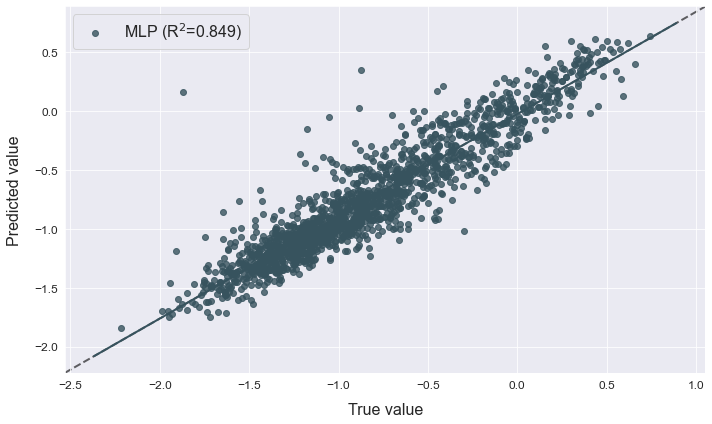

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


ZGal ready!
<< ================== ATOM ================== >>
Algorithm task: regression.
Parallel processing with 7 cores.

Dataset stats ==================== >>
Shape: (8274, 10)
Scaled: False
Outlier values: 199 (0.3%)
-------------------------------------
Train set size: 6620
Test set size: 1654
-------------------------------------

Scaling features...
Pruning outliers...
 --> Dropping 109 outliers.

Training ========================= >>
Models: MLP
Metric: neg_median_absolute_error, r2



Running BO for Multi-layer Perceptron...
| call             | hidden_layer_sizes | hidden_layer_sizes | hidden_layer_sizes | activation |   alpha | batch_size | learning_rate | learning_rate_init | power_t | max_iter | neg_median_absolute_error | best_neg_median_absolute_error |      r2 | best_r2 |    time | total_time |
| ---------------- | ------------------ | ------------------ | ------------------ | ---------- | ------- | ---------- | ------------- | ------------------ | ------- | -------- | 

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 1  |       (82, 18, 78) |       (82, 18, 78) |       (82, 18, 78) |       relu |  0.0022 |         32 |           --- |              0.005 |     --- |      343 |                   -0.2285 |                        -0.2285 |  0.9375 |  0.9375 |  6.932s |     6.954s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 2  |       (15, 72, 94) |       (15, 72, 94) |       (15, 72, 94) |   identity |  0.0948 |        157 |           --- |              0.001 |     --- |      286 |                   -0.3423 |                        -0.2285 |  0.8768 |  0.9375 |  5.832s |    12.926s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 3  |        (46, 5, 97) |        (46, 5, 97) |        (46, 5, 97) |   logistic |  0.0002 |        158 |           --- |              0.093 |     --- |      437 |                   -0.2443 |                        -0.2285 |  0.9261 |  0.9375 |  3.784s |    16.821s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 4  |        (71, 45, 1) |        (71, 45, 1) |        (71, 45, 1) |       tanh |  0.0049 |        101 |           --- |              0.003 |     --- |      357 |                   -0.8851 |                        -0.2285 | -0.0004 |  0.9375 |  6.138s |    23.070s |


Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 5  |       (65, 83, 17) |       (65, 83, 17) |       (65, 83, 17) |   logistic |  0.0004 |        191 |           --- |              0.003 |     --- |       64 |                   -0.2751 |                        -0.2285 |  0.9069 |  0.9375 |  4.801s |    27.982s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 6  |       (86, 45, 40) |       (86, 45, 40) |       (86, 45, 40) |       tanh |  0.0152 |         87 |           --- |              0.011 |     --- |      430 |                   -0.2662 |                        -0.2285 |  0.9238 |  0.9375 |  9.599s |    37.692s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 7  |       (77, 54, 59) |       (77, 54, 59) |       (77, 54, 59) |       tanh |  0.0066 |         75 |           --- |              0.002 |     --- |      241 |                    -0.258 |                        -0.2285 |  0.9342 |  0.9375 | 11.988s |    49.792s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 8  |        (46, 29, 1) |        (46, 29, 1) |        (46, 29, 1) |   logistic |  0.0136 |        199 |           --- |              0.071 |     --- |      462 |                   -0.2383 |                        -0.2285 |   0.933 |  0.9375 |  5.553s |    55.456s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 9  |       (87, 45, 10) |       (87, 45, 10) |       (87, 45, 10) |   logistic |  0.0102 |        169 |           --- |              0.004 |     --- |      222 |                   -0.2588 |                        -0.2285 |  0.9328 |  0.9375 | 15.555s |     1m:11s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 10 |       (97, 85, 72) |       (97, 85, 72) |       (97, 85, 72) |   logistic |  0.0006 |         18 |           --- |              0.002 |     --- |      141 |                   -0.2615 |                        -0.2285 |  0.9188 |  0.9375 |  7.565s |     1m:19s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 11 |       (91, 48, 56) |       (91, 48, 56) |       (91, 48, 56) |       relu |  0.0003 |        154 |           --- |              0.003 |     --- |      319 |                   -0.2383 |                        -0.2285 |   0.938 |   0.938 |  7.758s |     1m:27s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 12 |       (73, 88, 62) |       (73, 88, 62) |       (73, 88, 62) |   logistic |  0.0002 |        118 |           --- |              0.007 |     --- |      196 |                   -0.2758 |                        -0.2285 |  0.9168 |   0.938 |  9.261s |     1m:36s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 13 |       (21, 36, 91) |       (21, 36, 91) |       (21, 36, 91) |   logistic |  0.0088 |          8 |           --- |              0.004 |     --- |      290 |                   -0.3265 |                        -0.2285 |  0.8875 |   0.938 | 20.946s |     1m:57s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 14 |       (54, 69, 27) |       (54, 69, 27) |       (54, 69, 27) |   logistic |  0.0003 |         61 |           --- |              0.006 |     --- |      164 |                   -0.2425 |                        -0.2285 |  0.9346 |   0.938 |  6.802s |     2m:04s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 15 |       (32, 70, 71) |       (32, 70, 71) |       (32, 70, 71) |   identity |  0.0985 |         73 |           --- |              0.007 |     --- |      205 |                   -0.3952 |                        -0.2285 |  0.8801 |   0.938 |  4.687s |     2m:09s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 16 |       (67, 68, 53) |       (67, 68, 53) |       (67, 68, 53) |   logistic |  0.0046 |        151 |           --- |              0.005 |     --- |      411 |                   -0.2728 |                        -0.2285 |  0.9183 |   0.938 |  7.873s |     2m:17s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 17 |       (52, 98, 40) |       (52, 98, 40) |       (52, 98, 40) |       relu |  0.0248 |         44 |           --- |              0.025 |     --- |      197 |                   -0.3965 |                        -0.2285 |  0.8657 |   0.938 |  1.692s |     2m:19s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 18 |       (30, 71, 81) |       (30, 71, 81) |       (30, 71, 81) |   logistic |  0.0002 |        236 |           --- |              0.011 |     --- |      354 |                   -0.2288 |                        -0.2285 |  0.9408 |  0.9408 | 19.327s |     2m:38s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 19 |       (76, 21, 54) |       (76, 21, 54) |       (76, 21, 54) |       relu |  0.0005 |         50 |           --- |              0.011 |     --- |      498 |                   -0.2339 |                        -0.2285 |  0.9359 |  0.9408 |  2.632s |     2m:41s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 20 |       (97, 56, 88) |       (97, 56, 88) |       (97, 56, 88) |   logistic |  0.0007 |        177 |           --- |              0.052 |     --- |      449 |                   -0.2828 |                        -0.2285 |  0.9193 |  0.9408 |  8.420s |     2m:49s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 21 |       (87, 94, 79) |       (87, 94, 79) |       (87, 94, 79) |       relu |  0.0055 |         98 |           --- |              0.089 |     --- |      187 |                   -0.9119 |                        -0.2285 | -0.0227 |  0.9408 |  3.808s |     2m:53s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 22 |       (54, 45, 99) |       (54, 45, 99) |       (54, 45, 99) |   logistic |  0.0001 |        128 |           --- |              0.005 |     --- |      374 |                   -0.2982 |                        -0.2285 |  0.9137 |  0.9408 |  8.345s |     3m:02s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 23 |       (38, 54, 51) |       (38, 54, 51) |       (38, 54, 51) |       relu |  0.0006 |        151 |           --- |              0.009 |     --- |      245 |                   -0.2254 |                        -0.2254 |  0.9398 |  0.9408 |  3.782s |     3m:06s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 24 |       (42, 65, 67) |       (42, 65, 67) |       (42, 65, 67) |       tanh |  0.0005 |        129 |           --- |              0.034 |     --- |      498 |                    -0.336 |                        -0.2254 |  0.8974 |  0.9408 |  2.991s |     3m:09s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 25 |       (52, 28, 88) |       (52, 28, 88) |       (52, 28, 88) |       relu |  0.0723 |         88 |           --- |              0.014 |     --- |       84 |                   -0.2357 |                        -0.2254 |  0.9301 |  0.9408 |  1.607s |     3m:10s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 26 |       (38, 19, 27) |       (38, 19, 27) |       (38, 19, 27) |   logistic |  0.0013 |        104 |           --- |              0.072 |     --- |      144 |                   -0.3504 |                        -0.2254 |   0.875 |  0.9408 |  1.435s |     3m:12s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 27 |       (70, 36, 25) |       (70, 36, 25) |       (70, 36, 25) |   logistic |  0.0009 |        213 |           --- |              0.026 |     --- |      183 |                   -0.8645 |                        -0.2254 | -0.0003 |  0.9408 |  1.316s |     3m:13s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 28 |       (48, 26, 61) |       (48, 26, 61) |       (48, 26, 61) |   identity |  0.0001 |        160 |           --- |              0.001 |     --- |       73 |                   -0.3397 |                        -0.2254 |  0.8771 |  0.9408 |  1.967s |     3m:16s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 29 |        (90, 3, 58) |        (90, 3, 58) |        (90, 3, 58) |   logistic |  0.0104 |         87 |           --- |              0.092 |     --- |      437 |                   -0.2846 |                        -0.2254 |  0.9087 |  0.9408 |  1.095s |     3m:17s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 30 |        (33, 4, 30) |        (33, 4, 30) |        (33, 4, 30) |       relu |   0.001 |        208 |           --- |              0.085 |     --- |      429 |                   -0.8923 |                        -0.2254 | -0.0126 |  0.9408 |  0.231s |     3m:17s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 31 |       (27, 41, 70) |       (27, 41, 70) |       (27, 41, 70) |   identity |  0.0003 |        243 |           --- |              0.001 |     --- |      245 |                   -0.3366 |                        -0.2254 |  0.8753 |  0.9408 |  2.267s |     3m:19s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 32 |       (77, 25, 18) |       (77, 25, 18) |       (77, 25, 18) |   identity |  0.0019 |        175 |           --- |              0.068 |     --- |      158 |                   -0.3991 |                        -0.2254 |  0.8658 |  0.9408 |  1.475s |     3m:21s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 33 |       (18, 18, 93) |       (18, 18, 93) |       (18, 18, 93) |       relu |  0.0035 |        167 |           --- |              0.029 |     --- |      305 |                   -0.2337 |                        -0.2254 |  0.9435 |  0.9435 |  4.417s |     3m:26s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 34 |       (24, 12, 34) |       (24, 12, 34) |       (24, 12, 34) |   identity |  0.0002 |         83 |           --- |              0.002 |     --- |      394 |                    -0.365 |                        -0.2254 |  0.8653 |  0.9435 |  0.496s |     3m:26s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 35 |       (83, 35, 46) |       (83, 35, 46) |       (83, 35, 46) |       relu |  0.0001 |        238 |           --- |              0.003 |     --- |      470 |                   -0.2121 |                        -0.2121 |  0.9414 |  0.9435 |  5.870s |     3m:32s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 36 |       (55, 54, 68) |       (55, 54, 68) |       (55, 54, 68) |       relu |  0.0679 |        237 |           --- |              0.019 |     --- |      355 |                   -0.2163 |                        -0.2121 |  0.9323 |  0.9435 |  3.277s |     3m:36s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 37 |       (62, 13, 81) |       (62, 13, 81) |       (62, 13, 81) |       relu |  0.0075 |        207 |           --- |              0.003 |     --- |      147 |                   -0.2229 |                        -0.2121 |   0.934 |  0.9435 |  6.673s |     3m:42s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 38 |        (44, 4, 62) |        (44, 4, 62) |        (44, 4, 62) |   logistic |  0.0093 |        101 |           --- |              0.005 |     --- |      273 |                   -0.2567 |                        -0.2121 |  0.9299 |  0.9435 |  4.243s |     3m:47s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 39 |       (72, 35, 94) |       (72, 35, 94) |       (72, 35, 94) |   identity |  0.0018 |        242 |           --- |              0.007 |     --- |      309 |                   -0.3276 |                        -0.2121 |  0.8668 |  0.9435 |  1.800s |     3m:49s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 40 |       (76, 13, 25) |       (76, 13, 25) |       (76, 13, 25) |       relu |  0.0399 |        144 |           --- |              0.023 |     --- |      157 |                   -0.2335 |                        -0.2121 |  0.9343 |  0.9435 |  1.798s |     3m:50s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 41 |       (44, 53, 50) |       (44, 53, 50) |       (44, 53, 50) |   logistic |  0.0008 |         32 |           --- |              0.083 |     --- |      210 |                   -0.3223 |                        -0.2121 |  0.8884 |  0.9435 |  4.365s |     3m:55s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 42 |       (96, 68, 48) |       (96, 68, 48) |       (96, 68, 48) |   logistic |  0.0002 |         30 |           --- |              0.013 |     --- |      476 |                   -0.2205 |                        -0.2121 |  0.9426 |  0.9435 |  7.343s |     4m:02s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 43 |       (80, 11, 93) |       (80, 11, 93) |       (80, 11, 93) |       tanh |  0.0972 |         22 |           --- |              0.012 |     --- |      486 |                   -0.2758 |                        -0.2121 |  0.9083 |  0.9435 |  5.878s |     4m:08s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 44 |       (72, 84, 87) |       (72, 84, 87) |       (72, 84, 87) |       tanh |  0.0019 |         62 |           --- |              0.061 |     --- |      281 |                   -0.3195 |                        -0.2121 |  0.8914 |  0.9435 |  4.544s |     4m:13s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 45 |       (31, 58, 86) |       (31, 58, 86) |       (31, 58, 86) |       tanh |  0.0005 |        228 |           --- |              0.005 |     --- |      267 |                   -0.2028 |                        -0.2028 |  0.9342 |  0.9435 | 11.108s |     4m:24s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 46 |       (44, 71, 25) |       (44, 71, 25) |       (44, 71, 25) |   logistic |   0.002 |         69 |           --- |              0.014 |     --- |      395 |                   -0.2607 |                        -0.2028 |  0.9155 |  0.9435 |  4.985s |     4m:29s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 47 |       (84, 74, 68) |       (84, 74, 68) |       (84, 74, 68) |   logistic |  0.0016 |        124 |           --- |              0.011 |     --- |      411 |                   -0.2952 |                        -0.2028 |   0.901 |  0.9435 | 10.028s |     4m:40s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 48 |       (98, 56, 32) |       (98, 56, 32) |       (98, 56, 32) |   identity |  0.0594 |        230 |           --- |              0.025 |     --- |      125 |                   -0.3572 |                        -0.2028 |  0.8804 |  0.9435 |  2.598s |     4m:42s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 49 |      (30, 29, 100) |      (30, 29, 100) |      (30, 29, 100) |       relu |  0.0014 |        186 |           --- |              0.083 |     --- |      228 |                   -0.2353 |                        -0.2028 |  0.9307 |  0.9435 |  2.940s |     4m:45s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 50 |       (20, 34, 17) |       (20, 34, 17) |       (20, 34, 17) |       relu |  0.0015 |         64 |           --- |              0.005 |     --- |      254 |                   -0.2138 |                        -0.2028 |  0.9437 |  0.9437 |  2.993s |     4m:48s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 51     |       (18, 37, 72) |       (18, 37, 72) |       (18, 37, 72) |       tanh |     0.1 |         75 |           --- |               0.01 |     --- |      301 |                   -0.3058 |                        -0.2028 |  0.8987 |  0.9437 |  2.093s |     4m:54s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 52     |        (42, 4, 75) |        (42, 4, 75) |        (42, 4, 75) |   identity |   0.001 |        188 |           --- |              0.002 |     --- |      191 |                    -0.343 |                        -0.2028 |  0.8821 |  0.9437 |  1.082s |     4m:56s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 53     |         (27, 8, 4) |         (27, 8, 4) |         (27, 8, 4) |   identity |  0.0003 |        116 |           --- |              0.038 |     --- |       50 |                   -0.3426 |                        -0.2028 |  0.8712 |  0.9437 |  0.428s |     4m:58s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 54     |        (99, 9, 92) |        (99, 9, 92) |        (99, 9, 92) |       tanh |  0.0004 |        107 |           --- |              0.039 |     --- |      500 |                   -0.2654 |                        -0.2028 |  0.9264 |  0.9437 |  5.448s |     5m:05s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 55     |       (67, 71, 41) |       (67, 71, 41) |       (67, 71, 41) |   logistic |  0.0002 |         10 |           --- |              0.008 |     --- |       50 |                    -0.235 |                        -0.2028 |  0.9342 |  0.9437 |  9.733s |     5m:16s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 56     |        (28, 36, 8) |        (28, 36, 8) |        (28, 36, 8) |       relu |  0.0001 |         66 |           --- |              0.064 |     --- |      329 |                   -0.2387 |                        -0.2028 |  0.9396 |  0.9437 |  1.590s |     5m:19s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 57     |       (54, 59, 88) |       (54, 59, 88) |       (54, 59, 88) |   logistic |  0.0001 |        234 |           --- |              0.067 |     --- |      243 |                   -0.3755 |                        -0.2028 |  0.8786 |  0.9437 |  4.637s |     5m:25s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 58     |       (19, 7, 100) |       (19, 7, 100) |       (19, 7, 100) |   logistic |  0.0705 |        183 |           --- |              0.002 |     --- |       50 |                   -0.3891 |                        -0.2028 |  0.8551 |  0.9437 |  3.100s |     5m:29s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 59     |       (29, 55, 92) |       (29, 55, 92) |       (29, 55, 92) |       tanh |  0.0004 |        250 |           --- |              0.001 |     --- |       96 |                   -0.2702 |                        -0.2028 |  0.9189 |  0.9437 |  7.687s |     5m:39s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 60     |       (30, 49, 59) |       (30, 49, 59) |       (30, 49, 59) |   logistic |  0.0001 |        194 |           --- |              0.049 |     --- |      369 |                   -0.8301 |                        -0.2028 | -0.0005 |  0.9437 |  1.586s |     5m:42s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 61     |      (57, 100, 41) |      (57, 100, 41) |      (57, 100, 41) |       tanh |  0.0231 |        250 |           --- |              0.021 |     --- |      424 |                   -0.3606 |                        -0.2028 |  0.8901 |  0.9437 |  6.747s |     5m:50s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 62     |        (84, 5, 90) |        (84, 5, 90) |        (84, 5, 90) |       relu |  0.0169 |         88 |           --- |              0.009 |     --- |      308 |                   -0.2462 |                        -0.2028 |  0.9328 |  0.9437 |  1.881s |     5m:53s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 63     |       (32, 10, 39) |       (32, 10, 39) |       (32, 10, 39) |       tanh |  0.0006 |         29 |           --- |              0.001 |     --- |      239 |                   -0.2297 |                        -0.2028 |  0.9399 |  0.9437 |  8.513s |     6m:03s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 64     |          (100, 76) |          (100, 76) |          (100, 76) |   logistic |  0.0013 |        187 |           --- |              0.008 |     --- |      155 |                   -0.2377 |                        -0.2028 |  0.9378 |  0.9437 | 11.356s |     6m:16s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 65     |       (47, 24, 48) |       (47, 24, 48) |       (47, 24, 48) |   logistic |  0.0264 |        137 |           --- |              0.002 |     --- |      462 |                   -0.2677 |                        -0.2028 |  0.9261 |  0.9437 |  3.466s |     6m:21s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 66     |              (17,) |              (17,) |              (17,) |   identity |  0.0083 |         43 |           --- |               0.01 |     --- |      277 |                   -0.3958 |                        -0.2028 |  0.8753 |  0.9437 |  0.489s |     6m:23s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 67     |       (97, 50, 54) |       (97, 50, 54) |       (97, 50, 54) |   identity |  0.0905 |         28 |           --- |              0.001 |     --- |      322 |                   -0.3181 |                        -0.2028 |  0.8782 |  0.9437 |  7.040s |     6m:31s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 68     |       (91, 37, 91) |       (91, 37, 91) |       (91, 37, 91) |       relu |  0.0354 |        216 |           --- |              0.001 |     --- |      285 |                   -0.2221 |                        -0.2028 |  0.9477 |  0.9477 | 11.163s |     6m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 69     |      (37, 100, 81) |      (37, 100, 81) |      (37, 100, 81) |       tanh |  0.0005 |        227 |           --- |              0.001 |     --- |      254 |                   -0.2548 |                        -0.2028 |  0.9373 |  0.9477 | 25.911s |     7m:12s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 70     |              (76,) |              (76,) |              (76,) |   logistic |  0.0003 |         51 |           --- |              0.039 |     --- |      497 |                   -0.2402 |                        -0.2028 |  0.9394 |  0.9477 |  2.066s |     7m:16s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 71     |       (57, 14, 34) |       (57, 14, 34) |       (57, 14, 34) |   identity |  0.0008 |         64 |           --- |              0.022 |     --- |      266 |                   -0.3569 |                        -0.2028 |  0.8533 |  0.9477 |  0.858s |     7m:18s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 72     |      (92, 67, 100) |      (92, 67, 100) |      (92, 67, 100) |   logistic |  0.0178 |        157 |           --- |              0.002 |     --- |      261 |                   -0.2747 |                        -0.2028 |  0.9259 |  0.9477 | 16.454s |     7m:36s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 73     |      (68, 63, 100) |      (68, 63, 100) |      (68, 63, 100) |   logistic |  0.0001 |        163 |           --- |              0.093 |     --- |      292 |                   -0.2494 |                        -0.2028 |  0.9294 |  0.9477 |  8.881s |     7m:47s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 74     |       (86, 44, 23) |       (86, 44, 23) |       (86, 44, 23) |       relu |     0.1 |        119 |           --- |              0.026 |     --- |      348 |                   -0.2716 |                        -0.2028 |   0.931 |  0.9477 |  5.187s |     7m:54s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 75     |       (31, 96, 15) |       (31, 96, 15) |       (31, 96, 15) |       relu |  0.0033 |        140 |           --- |                0.1 |     --- |      143 |                   -0.2653 |                        -0.2028 |  0.9253 |  0.9477 |  5.073s |     8m:01s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 76     |       (65, 56, 81) |       (65, 56, 81) |       (65, 56, 81) |       relu |  0.0448 |        227 |           --- |              0.004 |     --- |      425 |                   -0.2408 |                        -0.2028 |  0.9357 |  0.9477 |  6.442s |     8m:09s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 77     |       (81, 64, 90) |       (81, 64, 90) |       (81, 64, 90) |       relu |  0.0004 |        227 |           --- |              0.004 |     --- |      221 |                   -0.2063 |                        -0.2028 |  0.9429 |  0.9477 |  3.739s |     8m:15s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 78     |              (68,) |              (68,) |              (68,) |       relu |  0.0002 |         54 |           --- |              0.001 |     --- |      158 |                    -0.243 |                        -0.2028 |   0.938 |  0.9477 |  3.307s |     8m:20s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 79     |        (61, 1, 22) |        (61, 1, 22) |        (61, 1, 22) |       relu |  0.0001 |        130 |           --- |                0.1 |     --- |      175 |                   -0.8694 |                        -0.2028 | -0.0225 |  0.9477 |  0.341s |     8m:22s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 80     |       (49, 22, 18) |       (49, 22, 18) |       (49, 22, 18) |   logistic |  0.0003 |          8 |           --- |              0.009 |     --- |       69 |                   -0.2552 |                        -0.2028 |  0.9232 |  0.9477 | 13.454s |     8m:37s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 81     |        (24, 70, 4) |        (24, 70, 4) |        (24, 70, 4) |       relu |  0.0002 |         39 |           --- |               0.06 |     --- |      355 |                   -0.2591 |                        -0.2028 |  0.9134 |  0.9477 |  2.012s |     8m:41s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 82     |       (65, 76, 32) |       (65, 76, 32) |       (65, 76, 32) |       tanh |  0.0184 |        231 |           --- |              0.002 |     --- |      293 |                   -0.2136 |                        -0.2028 |  0.9373 |  0.9477 | 17.050s |     8m:59s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 83     |       (66, 95, 54) |       (66, 95, 54) |       (66, 95, 54) |       tanh |  0.0008 |        149 |           --- |              0.006 |     --- |      299 |                   -0.2337 |                        -0.2028 |  0.9318 |  0.9477 | 11.148s |     9m:12s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 84     |       (49, 14, 21) |       (49, 14, 21) |       (49, 14, 21) |       relu |  0.0012 |         55 |           --- |              0.005 |     --- |      116 |                   -0.2369 |                        -0.2028 |  0.9383 |  0.9477 |  2.038s |     9m:16s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 85     |      (14, 43, 100) |      (14, 43, 100) |      (14, 43, 100) |       tanh |  0.0002 |        156 |           --- |               0.02 |     --- |      493 |                   -0.2295 |                        -0.2028 |  0.9348 |  0.9477 |  7.262s |     9m:25s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 86     |       (68, 82, 78) |       (68, 82, 78) |       (68, 82, 78) |   identity |   0.004 |        134 |           --- |              0.008 |     --- |      446 |                    -0.384 |                        -0.2028 |  0.8777 |  0.9477 |  1.626s |     9m:29s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 87     |       (59, 40, 44) |       (59, 40, 44) |       (59, 40, 44) |       relu |  0.0002 |        242 |           --- |              0.002 |     --- |      124 |                   -0.2307 |                        -0.2028 |  0.9373 |  0.9477 |  7.520s |     9m:40s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 88     |       (80, 29, 55) |       (80, 29, 55) |       (80, 29, 55) |   logistic |  0.0001 |         99 |           --- |              0.004 |     --- |      359 |                   -0.2702 |                        -0.2028 |  0.9282 |  0.9477 |  5.339s |     9m:47s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 89     |        (42, 65, 8) |        (42, 65, 8) |        (42, 65, 8) |   logistic |  0.0096 |        132 |           --- |              0.082 |     --- |      225 |                   -0.2937 |                        -0.2028 |  0.9131 |  0.9477 |  5.376s |     9m:54s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 90     |       (71, 32, 57) |       (71, 32, 57) |       (71, 32, 57) |       tanh |  0.0001 |         37 |           --- |              0.005 |     --- |      398 |                   -0.2367 |                        -0.2028 |  0.9325 |  0.9477 |  6.870s |    10m:03s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 91     |           (39, 38) |           (39, 38) |           (39, 38) |       relu |  0.0634 |        192 |           --- |               0.07 |     --- |      294 |                   -0.2666 |                        -0.2028 |  0.9028 |  0.9477 |  2.104s |    10m:07s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 92     |       (30, 41, 48) |       (30, 41, 48) |       (30, 41, 48) |       tanh |  0.0004 |        170 |           --- |              0.001 |     --- |      349 |                   -0.2193 |                        -0.2028 |  0.9412 |  0.9477 | 18.873s |    10m:28s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 93     |       (55, 74, 32) |       (55, 74, 32) |       (55, 74, 32) |       tanh |  0.0373 |        228 |           --- |              0.001 |     --- |      356 |                   -0.2404 |                        -0.2028 |  0.9311 |  0.9477 | 12.473s |    10m:42s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 94     |        (72, 78, 5) |        (72, 78, 5) |        (72, 78, 5) |   identity |  0.0019 |        226 |           --- |              0.006 |     --- |      245 |                   -0.3854 |                        -0.2028 |  0.8744 |  0.9477 |  1.017s |    10m:45s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 95     |       (47, 56, 97) |       (47, 56, 97) |       (47, 56, 97) |       relu |     0.1 |         79 |           --- |              0.007 |     --- |       98 |                   -0.2512 |                        -0.2028 |  0.9288 |  0.9477 |  9.285s |    10m:57s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 96     |       (11, 23, 50) |       (11, 23, 50) |       (11, 23, 50) |       relu |  0.0004 |        144 |           --- |              0.004 |     --- |      464 |                   -0.2326 |                        -0.2028 |  0.9424 |  0.9477 |  2.292s |    11m:01s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 97     |              (47,) |              (47,) |              (47,) |       tanh |  0.0001 |         17 |           --- |               0.02 |     --- |      499 |                   -0.2323 |                        -0.2028 |  0.9367 |  0.9477 |  2.734s |    11m:07s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 98     |       (69, 80, 88) |       (69, 80, 88) |       (69, 80, 88) |   logistic |  0.0003 |        217 |           --- |              0.004 |     --- |      320 |                   -0.3035 |                        -0.2028 |  0.9053 |  0.9477 |  5.520s |    11m:15s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 99     |       (23, 59, 89) |       (23, 59, 89) |       (23, 59, 89) |       tanh |  0.0004 |        232 |           --- |              0.005 |     --- |      135 |                   -0.2155 |                        -0.2028 |  0.9453 |  0.9477 | 11.685s |    11m:28s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 100    |        (92, 2, 88) |        (92, 2, 88) |        (92, 2, 88) |       relu |  0.0004 |        225 |           --- |              0.005 |     --- |       67 |                   -0.2597 |                        -0.2028 |  0.9307 |  0.9477 |  2.931s |    11m:33s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To


Results for Multi-layer Perceptron:         
Bayesian Optimization ---------------------------
Best call --> Initial point 45
Best parameters --> {'hidden_layer_sizes': (31, 58, 86), 'activation': 'tanh', 'alpha': 0.0005, 'batch_size': 228, 'learning_rate_init': 0.005, 'max_iter': 267}
Best evaluation --> neg_median_absolute_error: -0.2028   r2: 0.9342
Time elapsed: 11m:36s
Fit ---------------------------------------------
Train evaluation --> neg_median_absolute_error: -0.2388   r2: 0.944
Test evaluation --> neg_median_absolute_error: -0.248   r2: 0.9432
Time elapsed: 20.018s
Bootstrap ---------------------------------------
Evaluation --> neg_median_absolute_error: -0.223 ± 0.0117   r2: 0.9439 ± 0.0055
Time elapsed: 1m:39s
-------------------------------------------------
Total time: 13m:34s


Final results ==================== >>
Duration: 13m:34s
-------------------------------------
Multi-layer Perceptron --> neg_median_absolute_error: -0.223 ± 0.0117   r2: 0.9439 ± 0.0055 ~


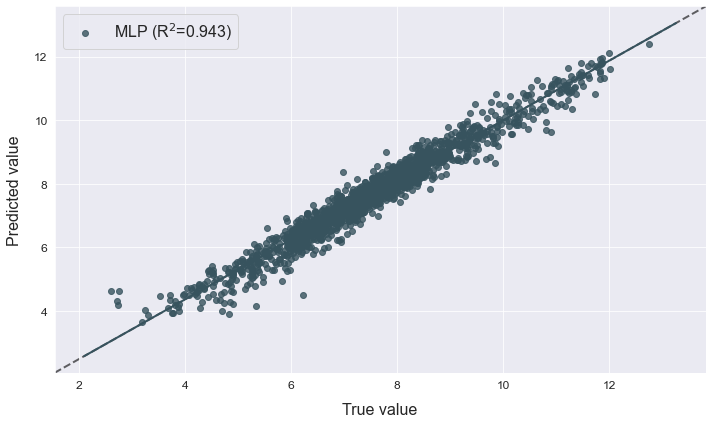

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Pressure ready!
<< ================== ATOM ================== >>
Algorithm task: regression.
Parallel processing with 7 cores.

Dataset stats ==================== >>
Shape: (8274, 10)
Scaled: False
Outlier values: 273 (0.4%)
-------------------------------------
Train set size: 6620
Test set size: 1654
-------------------------------------

Scaling features...
Pruning outliers...
 --> Dropping 184 outliers.

Training ========================= >>
Models: MLP
Metric: neg_median_absolute_error, r2



Running BO for Multi-layer Perceptron...
| call             | hidden_layer_sizes | hidden_layer_sizes | hidden_layer_sizes | activation |   alpha | batch_size | learning_rate | learning_rate_init | power_t | max_iter | neg_median_absolute_error | best_neg_median_absolute_error |      r2 | best_r2 |    time | total_time |
| ---------------- | ------------------ | ------------------ | ------------------ | ---------- | ------- | ---------- | ------------- | ------------------ | ------- | -------

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 1  |       (82, 18, 78) |       (82, 18, 78) |       (82, 18, 78) |       relu |  0.0022 |         32 |           --- |              0.005 |     --- |      343 |                   -0.1481 |                        -0.1481 |  0.9049 |  0.9049 |  3.151s |     3.172s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 2  |       (15, 72, 94) |       (15, 72, 94) |       (15, 72, 94) |   identity |  0.0948 |        157 |           --- |              0.001 |     --- |      286 |                   -0.2377 |                        -0.1481 |   0.766 |  0.9049 |  8.114s |    11.401s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 3  |        (46, 5, 97) |        (46, 5, 97) |        (46, 5, 97) |   logistic |  0.0002 |        158 |           --- |              0.093 |     --- |      437 |                   -0.1409 |                        -0.1409 |  0.8995 |  0.9049 |  3.954s |    15.470s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 4  |        (71, 45, 1) |        (71, 45, 1) |        (71, 45, 1) |       tanh |  0.0049 |        101 |           --- |              0.003 |     --- |      357 |                   -0.1472 |                        -0.1409 |  0.8951 |  0.9049 |  7.227s |    22.811s |


Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 5  |       (65, 83, 17) |       (65, 83, 17) |       (65, 83, 17) |   logistic |  0.0004 |        191 |           --- |              0.003 |     --- |       64 |                   -0.1839 |                        -0.1409 |  0.8494 |  0.9049 |  5.120s |    28.042s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 6  |       (86, 45, 40) |       (86, 45, 40) |       (86, 45, 40) |       tanh |  0.0152 |         87 |           --- |              0.011 |     --- |      430 |                   -0.1682 |                        -0.1409 |  0.9018 |  0.9049 |  8.472s |    36.638s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 7  |       (77, 54, 59) |       (77, 54, 59) |       (77, 54, 59) |       tanh |  0.0066 |         75 |           --- |              0.002 |     --- |      241 |                    -0.138 |                         -0.138 |  0.9078 |  0.9078 | 10.946s |    47.696s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 8  |        (46, 29, 1) |        (46, 29, 1) |        (46, 29, 1) |   logistic |  0.0136 |        199 |           --- |              0.071 |     --- |      462 |                    -0.184 |                         -0.138 |  0.8576 |  0.9078 |  1.904s |    49.712s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 9  |       (87, 45, 10) |       (87, 45, 10) |       (87, 45, 10) |   logistic |  0.0102 |        169 |           --- |              0.004 |     --- |      222 |                   -0.1636 |                         -0.138 |  0.8734 |  0.9078 |  7.965s |    57.789s |


Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 10 |       (97, 85, 72) |       (97, 85, 72) |       (97, 85, 72) |   logistic |  0.0006 |         18 |           --- |              0.002 |     --- |      141 |                   -0.1778 |                         -0.138 |   0.861 |  0.9078 | 19.681s |     1m:18s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 11 |       (91, 48, 56) |       (91, 48, 56) |       (91, 48, 56) |       relu |  0.0003 |        154 |           --- |              0.003 |     --- |      319 |                   -0.1288 |                        -0.1288 |   0.913 |   0.913 |  3.584s |     1m:21s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 12 |       (73, 88, 62) |       (73, 88, 62) |       (73, 88, 62) |   logistic |  0.0002 |        118 |           --- |              0.007 |     --- |      196 |                   -0.1538 |                        -0.1288 |  0.8947 |   0.913 | 13.832s |     1m:35s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 13 |       (21, 36, 91) |       (21, 36, 91) |       (21, 36, 91) |   logistic |  0.0088 |          8 |           --- |              0.004 |     --- |      290 |                   -0.2542 |                        -0.1288 |  0.7986 |   0.913 |  7.344s |     1m:43s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 14 |       (54, 69, 27) |       (54, 69, 27) |       (54, 69, 27) |   logistic |  0.0003 |         61 |           --- |              0.006 |     --- |      164 |                   -0.1586 |                        -0.1288 |  0.8932 |   0.913 |  6.267s |     1m:49s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 15 |       (32, 70, 71) |       (32, 70, 71) |       (32, 70, 71) |   identity |  0.0985 |         73 |           --- |              0.007 |     --- |      205 |                   -0.2686 |                        -0.1288 |  0.7671 |   0.913 |  6.700s |     1m:56s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 16 |       (67, 68, 53) |       (67, 68, 53) |       (67, 68, 53) |   logistic |  0.0046 |        151 |           --- |              0.005 |     --- |      411 |                   -0.1722 |                        -0.1288 |  0.8762 |   0.913 | 13.078s |     2m:09s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 17 |       (52, 98, 40) |       (52, 98, 40) |       (52, 98, 40) |       relu |  0.0248 |         44 |           --- |              0.025 |     --- |      197 |                   -0.2079 |                        -0.1288 |  0.8467 |   0.913 |  1.474s |     2m:11s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 18 |       (30, 71, 81) |       (30, 71, 81) |       (30, 71, 81) |   logistic |  0.0002 |        236 |           --- |              0.011 |     --- |      354 |                   -0.3008 |                        -0.1288 |  0.7966 |   0.913 |  7.261s |     2m:18s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 19 |       (76, 21, 54) |       (76, 21, 54) |       (76, 21, 54) |       relu |  0.0005 |         50 |           --- |              0.011 |     --- |      498 |                   -0.1659 |                        -0.1288 |  0.8842 |   0.913 |  1.799s |     2m:20s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 20 |       (97, 56, 88) |       (97, 56, 88) |       (97, 56, 88) |   logistic |  0.0007 |        177 |           --- |              0.052 |     --- |      449 |                   -0.1464 |                        -0.1288 |  0.9004 |   0.913 |  8.053s |     2m:28s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 21 |       (87, 94, 79) |       (87, 94, 79) |       (87, 94, 79) |       relu |  0.0055 |         98 |           --- |              0.089 |     --- |      187 |                    -0.167 |                        -0.1288 |   0.883 |   0.913 | 14.552s |     2m:43s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 22 |       (54, 45, 99) |       (54, 45, 99) |       (54, 45, 99) |   logistic |  0.0001 |        128 |           --- |              0.005 |     --- |      374 |                   -0.1639 |                        -0.1288 |  0.8942 |   0.913 | 21.408s |     3m:04s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 23 |       (38, 54, 51) |       (38, 54, 51) |       (38, 54, 51) |       relu |  0.0006 |        151 |           --- |              0.009 |     --- |      245 |                   -0.1268 |                        -0.1268 |  0.9177 |  0.9177 |  4.148s |     3m:09s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 24 |       (42, 65, 67) |       (42, 65, 67) |       (42, 65, 67) |       tanh |  0.0005 |        129 |           --- |              0.034 |     --- |      498 |                   -0.1625 |                        -0.1268 |  0.8867 |  0.9177 |  7.492s |     3m:16s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 25 |       (52, 28, 88) |       (52, 28, 88) |       (52, 28, 88) |       relu |  0.0723 |         88 |           --- |              0.014 |     --- |       84 |                   -0.1721 |                        -0.1268 |  0.8457 |  0.9177 |  1.581s |     3m:18s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 26 |       (38, 19, 27) |       (38, 19, 27) |       (38, 19, 27) |   logistic |  0.0013 |        104 |           --- |              0.072 |     --- |      144 |                   -0.1574 |                        -0.1268 |  0.8745 |  0.9177 |  1.405s |     3m:19s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 27 |       (70, 36, 25) |       (70, 36, 25) |       (70, 36, 25) |   logistic |  0.0009 |        213 |           --- |              0.026 |     --- |      183 |                   -0.1591 |                        -0.1268 |  0.9066 |  0.9177 |  6.440s |     3m:26s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 28 |       (48, 26, 61) |       (48, 26, 61) |       (48, 26, 61) |   identity |  0.0001 |        160 |           --- |              0.001 |     --- |       73 |                   -0.2395 |                        -0.1268 |  0.7691 |  0.9177 |  2.350s |     3m:28s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 29 |        (90, 3, 58) |        (90, 3, 58) |        (90, 3, 58) |   logistic |  0.0104 |         87 |           --- |              0.092 |     --- |      437 |                   -0.2253 |                        -0.1268 |  0.8384 |  0.9177 |  1.989s |     3m:31s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 30 |        (33, 4, 30) |        (33, 4, 30) |        (33, 4, 30) |       relu |   0.001 |        208 |           --- |              0.085 |     --- |      429 |                   -0.4165 |                        -0.1268 | -0.0133 |  0.9177 |  0.206s |     3m:31s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 31 |       (27, 41, 70) |       (27, 41, 70) |       (27, 41, 70) |   identity |  0.0003 |        243 |           --- |              0.001 |     --- |      245 |                   -0.2322 |                        -0.1268 |  0.7535 |  0.9177 |  2.014s |     3m:33s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 32 |       (77, 25, 18) |       (77, 25, 18) |       (77, 25, 18) |   identity |  0.0019 |        175 |           --- |              0.068 |     --- |      158 |                   -0.3055 |                        -0.1268 |   0.702 |  0.9177 |  2.368s |     3m:35s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 33 |       (18, 18, 93) |       (18, 18, 93) |       (18, 18, 93) |       relu |  0.0035 |        167 |           --- |              0.029 |     --- |      305 |                   -0.1369 |                        -0.1268 |   0.916 |  0.9177 |  3.341s |     3m:39s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 34 |       (24, 12, 34) |       (24, 12, 34) |       (24, 12, 34) |   identity |  0.0002 |         83 |           --- |              0.002 |     --- |      394 |                   -0.2595 |                        -0.1268 |  0.7678 |  0.9177 |  1.128s |     3m:40s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 35 |       (83, 35, 46) |       (83, 35, 46) |       (83, 35, 46) |       relu |  0.0001 |        238 |           --- |              0.003 |     --- |      470 |                   -0.1508 |                        -0.1268 |   0.908 |  0.9177 |  3.387s |     3m:44s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 36 |       (55, 54, 68) |       (55, 54, 68) |       (55, 54, 68) |       relu |  0.0679 |        237 |           --- |              0.019 |     --- |      355 |                    -0.217 |                        -0.1268 |  0.8194 |  0.9177 |  0.935s |     3m:45s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 37 |       (62, 13, 81) |       (62, 13, 81) |       (62, 13, 81) |       relu |  0.0075 |        207 |           --- |              0.003 |     --- |      147 |                   -0.1479 |                        -0.1268 |  0.9056 |  0.9177 |  4.551s |     3m:49s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 38 |        (44, 4, 62) |        (44, 4, 62) |        (44, 4, 62) |   logistic |  0.0093 |        101 |           --- |              0.005 |     --- |      273 |                   -0.2201 |                        -0.1268 |  0.8489 |  0.9177 |  1.820s |     3m:51s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 39 |       (72, 35, 94) |       (72, 35, 94) |       (72, 35, 94) |   identity |  0.0018 |        242 |           --- |              0.007 |     --- |      309 |                   -0.2437 |                        -0.1268 |  0.7356 |  0.9177 |  1.504s |     3m:53s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 40 |       (76, 13, 25) |       (76, 13, 25) |       (76, 13, 25) |       relu |  0.0399 |        144 |           --- |              0.023 |     --- |      157 |                   -0.1605 |                        -0.1268 |  0.8967 |  0.9177 |  1.045s |     3m:54s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 41 |       (44, 53, 50) |       (44, 53, 50) |       (44, 53, 50) |   logistic |  0.0008 |         32 |           --- |              0.083 |     --- |      210 |                   -0.1871 |                        -0.1268 |  0.8189 |  0.9177 |  5.345s |     3m:60s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 42 |       (96, 68, 48) |       (96, 68, 48) |       (96, 68, 48) |   logistic |  0.0002 |         30 |           --- |              0.013 |     --- |      476 |                   -0.1407 |                        -0.1268 |  0.8855 |  0.9177 |  7.527s |     4m:07s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 43 |       (80, 11, 93) |       (80, 11, 93) |       (80, 11, 93) |       tanh |  0.0972 |         22 |           --- |              0.012 |     --- |      486 |                   -0.2053 |                        -0.1268 |  0.8286 |  0.9177 |  3.131s |     4m:10s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 44 |       (72, 84, 87) |       (72, 84, 87) |       (72, 84, 87) |       tanh |  0.0019 |         62 |           --- |              0.061 |     --- |      281 |                   -0.2054 |                        -0.1268 |  0.8319 |  0.9177 |  7.168s |     4m:18s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 45 |       (31, 58, 86) |       (31, 58, 86) |       (31, 58, 86) |       tanh |  0.0005 |        228 |           --- |              0.005 |     --- |      267 |                   -0.1511 |                        -0.1268 |   0.888 |  0.9177 |  9.780s |     4m:28s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 46 |       (44, 71, 25) |       (44, 71, 25) |       (44, 71, 25) |   logistic |   0.002 |         69 |           --- |              0.014 |     --- |      395 |                   -0.1627 |                        -0.1268 |  0.8841 |  0.9177 | 11.905s |     4m:40s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 47 |       (84, 74, 68) |       (84, 74, 68) |       (84, 74, 68) |   logistic |  0.0016 |        124 |           --- |              0.011 |     --- |      411 |                    -0.173 |                        -0.1268 |  0.8754 |  0.9177 | 10.948s |     4m:51s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 48 |       (98, 56, 32) |       (98, 56, 32) |       (98, 56, 32) |   identity |  0.0594 |        230 |           --- |              0.025 |     --- |      125 |                   -0.2722 |                        -0.1268 |  0.7362 |  0.9177 |  2.942s |     4m:54s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 49 |      (30, 29, 100) |      (30, 29, 100) |      (30, 29, 100) |       relu |  0.0014 |        186 |           --- |              0.083 |     --- |      228 |                   -0.1431 |                        -0.1268 |  0.9068 |  0.9177 |  4.910s |     4m:59s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 50 |       (20, 34, 17) |       (20, 34, 17) |       (20, 34, 17) |       relu |  0.0015 |         64 |           --- |              0.005 |     --- |      254 |                   -0.1348 |                        -0.1268 |  0.9191 |  0.9191 |  2.733s |     5m:02s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 51     |       (28, 38, 49) |       (28, 38, 49) |       (28, 38, 49) |       relu |  0.0001 |          8 |           --- |              0.006 |     --- |       50 |                   -0.1414 |                        -0.1268 |  0.9076 |  0.9191 | 12.774s |     5m:17s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 52     |       (42, 18, 29) |       (42, 18, 29) |       (42, 18, 29) |       relu |  0.0042 |         27 |           --- |              0.009 |     --- |      304 |                   -0.1592 |                        -0.1268 |  0.8837 |  0.9191 |  4.304s |     5m:23s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 53     |       (26, 40, 39) |       (26, 40, 39) |       (26, 40, 39) |       tanh |  0.0009 |        126 |           --- |              0.003 |     --- |      220 |                   -0.1421 |                        -0.1268 |  0.9047 |  0.9191 |  3.001s |     5m:27s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 54     |     (100, 15, 100) |     (100, 15, 100) |     (100, 15, 100) |   logistic |  0.0052 |         88 |           --- |              0.006 |     --- |       50 |                   -0.2039 |                        -0.1268 |  0.8334 |  0.9191 |  1.279s |     5m:30s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 55     |       (42, 78, 56) |       (42, 78, 56) |       (42, 78, 56) |       relu |  0.0003 |        147 |           --- |              0.007 |     --- |      164 |                   -0.1443 |                        -0.1268 |  0.9022 |  0.9191 |  5.110s |     5m:37s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 56     |      (10, 22, 100) |      (10, 22, 100) |      (10, 22, 100) |       relu |  0.0001 |        202 |           --- |              0.016 |     --- |      129 |                   -0.1405 |                        -0.1268 |  0.8939 |  0.9191 |  3.775s |     5m:42s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 57     |      (100, 77, 70) |      (100, 77, 70) |      (100, 77, 70) |       relu |  0.0001 |        159 |           --- |              0.002 |     --- |      124 |                   -0.1459 |                        -0.1268 |  0.9148 |  0.9191 |  6.593s |     5m:50s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 58     |           (10, 84) |           (10, 84) |           (10, 84) |       relu |  0.0486 |        238 |           --- |              0.001 |     --- |      264 |                   -0.1547 |                        -0.1268 |  0.8969 |  0.9191 |  8.389s |     6m:00s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 59     |        (59, 1, 39) |        (59, 1, 39) |        (59, 1, 39) |       tanh |  0.0007 |         33 |           --- |              0.002 |     --- |       83 |                   -0.1531 |                        -0.1268 |  0.9036 |  0.9191 |  4.489s |     6m:06s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 60     |       (19, 87, 43) |       (19, 87, 43) |       (19, 87, 43) |       tanh |  0.0002 |        134 |           --- |              0.009 |     --- |       74 |                   -0.1374 |                        -0.1268 |  0.9007 |  0.9191 |  4.590s |     6m:12s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 61     |           (17, 66) |           (17, 66) |           (17, 66) |       tanh |   0.045 |        237 |           --- |               0.03 |     --- |      490 |                   -0.2892 |                        -0.1268 |  0.7746 |  0.9191 |  2.094s |     6m:16s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 62     |       (21, 53, 57) |       (21, 53, 57) |       (21, 53, 57) |       tanh |  0.0001 |         79 |           --- |              0.006 |     --- |       50 |                   -0.1553 |                        -0.1268 |  0.8989 |  0.9191 |  1.932s |     6m:19s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 63     |      (100, 82, 21) |      (100, 82, 21) |      (100, 82, 21) |       relu |  0.0001 |         81 |           --- |               0.01 |     --- |       50 |                   -0.1493 |                        -0.1268 |  0.9049 |  0.9191 |  5.136s |     6m:26s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 64     |        (21, 4, 37) |        (21, 4, 37) |        (21, 4, 37) |       relu |  0.0014 |        230 |           --- |              0.004 |     --- |      147 |                   -0.1463 |                        -0.1268 |  0.9095 |  0.9191 |  1.008s |     6m:28s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 65     |      (61, 73, 100) |      (61, 73, 100) |      (61, 73, 100) |       tanh |  0.0001 |        244 |           --- |              0.001 |     --- |      385 |                    -0.146 |                        -0.1268 |  0.9084 |  0.9191 | 13.393s |     6m:43s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 66     |       (91, 24, 31) |       (91, 24, 31) |       (91, 24, 31) |   logistic |  0.0001 |        215 |           --- |               0.01 |     --- |       50 |                   -0.1866 |                        -0.1268 |  0.8694 |  0.9191 |  3.390s |     6m:48s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 67     |       (35, 73, 47) |       (35, 73, 47) |       (35, 73, 47) |       relu |  0.0001 |        104 |           --- |              0.005 |     --- |      279 |                   -0.1404 |                        -0.1268 |  0.9174 |  0.9191 |  6.643s |     6m:56s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 68     |      (10, 61, 100) |      (10, 61, 100) |      (10, 61, 100) |       tanh |  0.0001 |        127 |           --- |              0.025 |     --- |      278 |                   -0.2345 |                        -0.1268 |  0.8417 |  0.9191 |  4.844s |     7m:03s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 69     |       (62, 25, 69) |       (62, 25, 69) |       (62, 25, 69) |       tanh |  0.0013 |         26 |           --- |              0.002 |     --- |      200 |                   -0.1474 |                        -0.1268 |  0.9043 |  0.9191 |  6.497s |     7m:12s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 70     |      (100, 28, 45) |      (100, 28, 45) |      (100, 28, 45) |       tanh |     0.1 |        197 |           --- |              0.001 |     --- |      500 |                    -0.143 |                        -0.1268 |  0.9054 |  0.9191 | 15.003s |     7m:29s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 71     |           (94, 78) |           (94, 78) |           (94, 78) |       relu |    0.05 |        203 |           --- |              0.001 |     --- |      229 |                   -0.1334 |                        -0.1268 |  0.9143 |  0.9191 |  7.859s |     7m:39s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 72     |        (86, 2, 24) |        (86, 2, 24) |        (86, 2, 24) |       relu |     0.1 |         26 |           --- |              0.002 |     --- |      193 |                   -0.1852 |                        -0.1268 |  0.8624 |  0.9191 |  3.702s |     7m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 73     |      (84, 76, 100) |      (84, 76, 100) |      (84, 76, 100) |   logistic |  0.0001 |         75 |           --- |                0.1 |     --- |      490 |                   -0.2849 |                        -0.1268 |  0.7311 |  0.9191 |  5.211s |     7m:52s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 74     |      (36, 21, 100) |      (36, 21, 100) |      (36, 21, 100) |   logistic |  0.0357 |         75 |           --- |                0.1 |     --- |       70 |                   -0.2127 |                        -0.1268 |  0.7699 |  0.9191 |  1.423s |     7m:55s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 75     |       (39, 18, 25) |       (39, 18, 25) |       (39, 18, 25) |       relu |  0.0001 |        104 |           --- |              0.001 |     --- |      121 |                   -0.1479 |                        -0.1268 |  0.8996 |  0.9191 |  2.431s |     7m:60s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 76     |       (10, 82, 34) |       (10, 82, 34) |       (10, 82, 34) |       relu |  0.0016 |        116 |           --- |              0.006 |     --- |      383 |                    -0.145 |                        -0.1268 |  0.9023 |  0.9191 |  4.093s |     8m:06s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 77     |       (46, 36, 59) |       (46, 36, 59) |       (46, 36, 59) |       tanh |  0.0001 |        212 |           --- |              0.002 |     --- |      235 |                   -0.1539 |                        -0.1268 |  0.9036 |  0.9191 |  6.205s |     8m:14s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 78     |       (16, 84, 47) |       (16, 84, 47) |       (16, 84, 47) |       relu |  0.0007 |        136 |           --- |              0.009 |     --- |      125 |                   -0.1337 |                        -0.1268 |  0.9154 |  0.9191 |  5.519s |     8m:21s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 79     |        (67, 84, 4) |        (67, 84, 4) |        (67, 84, 4) |       relu |  0.0005 |        198 |           --- |              0.002 |     --- |      101 |                   -0.1682 |                        -0.1268 |  0.8808 |  0.9191 |  5.227s |     8m:28s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 80     |      (100, 48, 39) |      (100, 48, 39) |      (100, 48, 39) |       relu |  0.0002 |        159 |           --- |              0.002 |     --- |      417 |                   -0.1285 |                        -0.1268 |  0.9125 |  0.9191 |  9.080s |     8m:38s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 81     |          (83, 100) |          (83, 100) |          (83, 100) |   logistic |  0.0002 |          8 |           --- |              0.017 |     --- |      378 |                   -0.1815 |                        -0.1268 |  0.8527 |  0.9191 | 12.424s |     8m:53s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 82     |              (27,) |              (27,) |              (27,) |       relu |  0.0003 |        203 |           --- |              0.001 |     --- |       83 |                   -0.1772 |                        -0.1268 |  0.8564 |  0.9191 |  0.546s |     8m:55s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 83     |       (81, 18, 39) |       (81, 18, 39) |       (81, 18, 39) |       relu |  0.0023 |        137 |           --- |              0.007 |     --- |      286 |                    -0.142 |                        -0.1268 |  0.9079 |  0.9191 |  1.314s |     8m:59s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 84     |      (82, 100, 33) |      (82, 100, 33) |      (82, 100, 33) |       tanh |  0.0054 |        135 |           --- |              0.001 |     --- |      254 |                   -0.1572 |                        -0.1268 |  0.9106 |  0.9191 | 11.554s |     9m:12s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 85     |       (71, 89, 32) |       (71, 89, 32) |       (71, 89, 32) |   logistic |  0.0001 |        138 |           --- |              0.013 |     --- |      228 |                   -0.1612 |                        -0.1268 |   0.893 |  0.9191 | 12.381s |     9m:27s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 86     |      (46, 20, 100) |      (46, 20, 100) |      (46, 20, 100) |       relu |  0.0002 |        156 |           --- |              0.043 |     --- |      279 |                   -0.1468 |                        -0.1268 |  0.9049 |  0.9191 |  3.989s |     9m:34s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 87     |       (99, 42, 59) |       (99, 42, 59) |       (99, 42, 59) |       relu |  0.0402 |        176 |           --- |              0.003 |     --- |      500 |                   -0.1428 |                        -0.1268 |  0.9079 |  0.9191 |  5.218s |     9m:42s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 88     |      (73, 100, 79) |      (73, 100, 79) |      (73, 100, 79) |       relu |  0.0008 |          8 |           --- |              0.001 |     --- |       50 |                   -0.1396 |                        -0.1268 |   0.903 |  0.9191 | 27.889s |    10m:12s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 89     |       (27, 56, 44) |       (27, 56, 44) |       (27, 56, 44) |       relu |  0.0166 |        134 |           --- |              0.014 |     --- |       50 |                   -0.1358 |                        -0.1268 |  0.9224 |  0.9224 |  2.950s |    10m:18s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 90     |           (62, 27) |           (62, 27) |           (62, 27) |       relu |  0.0001 |         99 |           --- |               0.01 |     --- |      180 |                   -0.1365 |                        -0.1268 |  0.9129 |  0.9224 |  0.960s |    10m:22s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 91     |      (63, 100, 86) |      (63, 100, 86) |      (63, 100, 86) |       relu |  0.0155 |         72 |           --- |              0.001 |     --- |      500 |                   -0.1301 |                        -0.1268 |  0.9086 |  0.9224 |  9.356s |    10m:33s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 92     |       (76, 49, 54) |       (76, 49, 54) |       (76, 49, 54) |       relu |  0.0009 |        123 |           --- |              0.002 |     --- |      268 |                   -0.1456 |                        -0.1268 |   0.903 |  0.9224 |  6.773s |    10m:43s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 93     |          (97, 100) |          (97, 100) |          (97, 100) |       relu |  0.0004 |        137 |           --- |              0.001 |     --- |      500 |                   -0.1522 |                        -0.1268 |  0.9021 |  0.9224 |  7.835s |    10m:54s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 94     |      (11, 100, 74) |      (11, 100, 74) |      (11, 100, 74) |       tanh |  0.0001 |         50 |           --- |              0.001 |     --- |       50 |                    -0.146 |                        -0.1268 |  0.8949 |  0.9224 |  7.992s |    11m:05s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 95     |       (10, 97, 84) |       (10, 97, 84) |       (10, 97, 84) |       relu |  0.0001 |         55 |           --- |              0.001 |     --- |      262 |                   -0.1354 |                        -0.1268 |  0.9106 |  0.9224 | 21.203s |    11m:29s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 96     |      (68, 100, 53) |      (68, 100, 53) |      (68, 100, 53) |   logistic |  0.0006 |         75 |           --- |              0.003 |     --- |      252 |                   -0.1698 |                        -0.1268 |  0.8883 |  0.9224 | 18.317s |    11m:50s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 97     |       (20, 24, 59) |       (20, 24, 59) |       (20, 24, 59) |       relu |  0.0001 |        174 |           --- |              0.005 |     --- |      495 |                   -0.1323 |                        -0.1268 |  0.9162 |  0.9224 |  6.351s |    11m:59s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 98     |              (90,) |              (90,) |              (90,) |       relu |  0.0004 |        250 |           --- |              0.003 |     --- |      100 |                   -0.1471 |                        -0.1268 |  0.9055 |  0.9224 |  2.680s |    12m:05s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 99     |      (50, 100, 54) |      (50, 100, 54) |      (50, 100, 54) |       relu |  0.0003 |        116 |           --- |              0.004 |     --- |       99 |                   -0.1434 |                        -0.1268 |  0.9107 |  0.9224 |  5.000s |    12m:13s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 100    |              (53,) |              (53,) |              (53,) |       tanh |  0.0001 |         81 |           --- |              0.001 |     --- |      211 |                   -0.1739 |                        -0.1268 |  0.8695 |  0.9224 |  2.444s |    12m:19s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To


Results for Multi-layer Perceptron:         
Bayesian Optimization ---------------------------
Best call --> Initial point 23
Best parameters --> {'hidden_layer_sizes': (38, 54, 51), 'activation': 'relu', 'alpha': 0.0006, 'batch_size': 151, 'learning_rate_init': 0.009, 'max_iter': 245}
Best evaluation --> neg_median_absolute_error: -0.1268   r2: 0.9177
Time elapsed: 12m:22s
Fit ---------------------------------------------
Train evaluation --> neg_median_absolute_error: -0.1276   r2: 0.9169
Test evaluation --> neg_median_absolute_error: -0.1315   r2: 0.9205
Time elapsed: 3.552s
Bootstrap ---------------------------------------
Evaluation --> neg_median_absolute_error: -0.1368 ± 0.0036   r2: 0.9121 ± 0.0026
Time elapsed: 23.431s
-------------------------------------------------
Total time: 12m:49s


Final results ==================== >>
Duration: 12m:49s
-------------------------------------
Multi-layer Perceptron --> neg_median_absolute_error: -0.1368 ± 0.0036   r2: 0.9121 ± 0.0026 ~


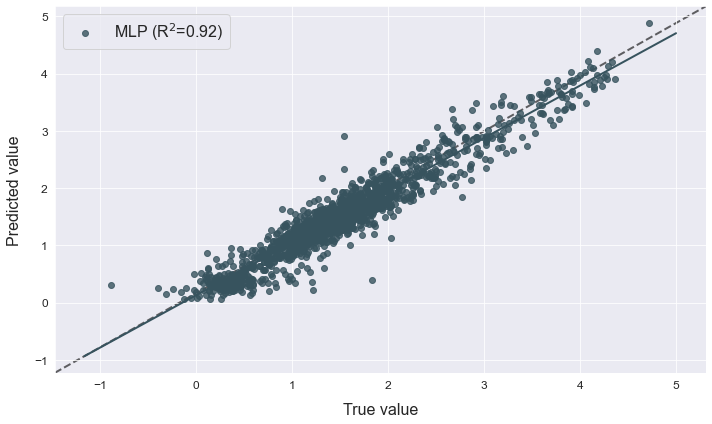

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


n$(\mathrm{H})_{\mathrm{cloud}}$ ready!
<< ================== ATOM ================== >>
Algorithm task: regression.
Parallel processing with 7 cores.

Dataset stats ==================== >>
Shape: (8274, 10)
Scaled: False
Outlier values: 209 (0.3%)
-------------------------------------
Train set size: 6620
Test set size: 1654
-------------------------------------

Scaling features...
Pruning outliers...
 --> Dropping 110 outliers.

Training ========================= >>
Models: MLP
Metric: neg_median_absolute_error, r2



Running BO for Multi-layer Perceptron...
| call             | hidden_layer_sizes | hidden_layer_sizes | hidden_layer_sizes | activation |   alpha | batch_size | learning_rate | learning_rate_init | power_t | max_iter | neg_median_absolute_error | best_neg_median_absolute_error |      r2 | best_r2 |    time | total_time |
| ---------------- | ------------------ | ------------------ | ------------------ | ---------- | ------- | ---------- | ------------- | --------------

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 1  |       (82, 18, 78) |       (82, 18, 78) |       (82, 18, 78) |       relu |  0.0022 |         32 |           --- |              0.005 |     --- |      343 |                   -0.0288 |                        -0.0288 |  0.8686 |  0.8686 |  1.684s |     1.705s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 2  |       (15, 72, 94) |       (15, 72, 94) |       (15, 72, 94) |   identity |  0.0948 |        157 |           --- |              0.001 |     --- |      286 |                   -0.0393 |                        -0.0288 |  0.7474 |  0.8686 |  6.991s |     8.810s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 3  |        (46, 5, 97) |        (46, 5, 97) |        (46, 5, 97) |   logistic |  0.0002 |        158 |           --- |              0.093 |     --- |      437 |                   -0.0472 |                        -0.0288 |  0.7086 |  0.8686 |  1.813s |    10.736s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 4  |        (71, 45, 1) |        (71, 45, 1) |        (71, 45, 1) |       tanh |  0.0049 |        101 |           --- |              0.003 |     --- |      357 |                   -0.0305 |                        -0.0288 |  0.8301 |  0.8686 |  3.530s |    14.381s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 5  |       (65, 83, 17) |       (65, 83, 17) |       (65, 83, 17) |   logistic |  0.0004 |        191 |           --- |              0.003 |     --- |       64 |                   -0.0423 |                        -0.0288 |  0.7592 |  0.8686 |  2.097s |    16.590s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 6  |       (86, 45, 40) |       (86, 45, 40) |       (86, 45, 40) |       tanh |  0.0152 |         87 |           --- |              0.011 |     --- |      430 |                   -0.0338 |                        -0.0288 |    0.81 |  0.8686 |  4.754s |    21.458s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 7  |       (77, 54, 59) |       (77, 54, 59) |       (77, 54, 59) |       tanh |  0.0066 |         75 |           --- |              0.002 |     --- |      241 |                    -0.033 |                        -0.0288 |  0.8337 |  0.8686 |  8.874s |    30.446s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 8  |        (46, 29, 1) |        (46, 29, 1) |        (46, 29, 1) |   logistic |  0.0136 |        199 |           --- |              0.071 |     --- |      462 |                   -0.0358 |                        -0.0288 |  0.8166 |  0.8686 |  1.654s |    32.213s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 9  |       (87, 45, 10) |       (87, 45, 10) |       (87, 45, 10) |   logistic |  0.0102 |        169 |           --- |              0.004 |     --- |      222 |                   -0.0386 |                        -0.0288 |  0.7553 |  0.8686 |  3.803s |    36.128s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 10 |       (97, 85, 72) |       (97, 85, 72) |       (97, 85, 72) |   logistic |  0.0006 |         18 |           --- |              0.002 |     --- |      141 |                   -0.0566 |                        -0.0288 |  0.6548 |  0.8686 |  2.645s |    38.886s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 11 |       (91, 48, 56) |       (91, 48, 56) |       (91, 48, 56) |       relu |  0.0003 |        154 |           --- |              0.003 |     --- |      319 |                   -0.0283 |                        -0.0283 |  0.8706 |  0.8706 |  1.390s |    40.389s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 12 |       (73, 88, 62) |       (73, 88, 62) |       (73, 88, 62) |   logistic |  0.0002 |        118 |           --- |              0.007 |     --- |      196 |                   -0.0319 |                        -0.0283 |  0.8253 |  0.8706 |  2.136s |    42.637s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 13 |       (21, 36, 91) |       (21, 36, 91) |       (21, 36, 91) |   logistic |  0.0088 |          8 |           --- |              0.004 |     --- |      290 |                   -0.0492 |                        -0.0283 |    0.54 |  0.8706 |  7.833s |    50.583s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 14 |       (54, 69, 27) |       (54, 69, 27) |       (54, 69, 27) |   logistic |  0.0003 |         61 |           --- |              0.006 |     --- |      164 |                   -0.0339 |                        -0.0283 |  0.8329 |  0.8706 |  1.125s |    51.821s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 15 |       (32, 70, 71) |       (32, 70, 71) |       (32, 70, 71) |   identity |  0.0985 |         73 |           --- |              0.007 |     --- |      205 |                   -0.0472 |                        -0.0283 |  0.7065 |  0.8706 |  3.158s |    55.092s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 16 |       (67, 68, 53) |       (67, 68, 53) |       (67, 68, 53) |   logistic |  0.0046 |        151 |           --- |              0.005 |     --- |      411 |                   -0.0433 |                        -0.0283 |  0.7381 |  0.8706 |  1.803s |    57.007s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 17 |       (52, 98, 40) |       (52, 98, 40) |       (52, 98, 40) |       relu |  0.0248 |         44 |           --- |              0.025 |     --- |      197 |                   -0.0563 |                        -0.0283 |  0.6978 |  0.8706 |  1.695s |    58.815s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 18 |       (30, 71, 81) |       (30, 71, 81) |       (30, 71, 81) |   logistic |  0.0002 |        236 |           --- |              0.011 |     --- |      354 |                   -0.0345 |                        -0.0283 |  0.8128 |  0.8706 |  1.774s |     1m:01s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 19 |       (76, 21, 54) |       (76, 21, 54) |       (76, 21, 54) |       relu |  0.0005 |         50 |           --- |              0.011 |     --- |      498 |                   -0.0283 |                        -0.0283 |  0.8388 |  0.8706 |  0.831s |     1m:02s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 20 |       (97, 56, 88) |       (97, 56, 88) |       (97, 56, 88) |   logistic |  0.0007 |        177 |           --- |              0.052 |     --- |      449 |                    -0.034 |                        -0.0283 |  0.8282 |  0.8706 |  4.245s |     1m:06s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 21 |       (87, 94, 79) |       (87, 94, 79) |       (87, 94, 79) |       relu |  0.0055 |         98 |           --- |              0.089 |     --- |      187 |                    -0.067 |                        -0.0283 | -0.0001 |  0.8706 |  1.817s |     1m:08s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 22 |       (54, 45, 99) |       (54, 45, 99) |       (54, 45, 99) |   logistic |  0.0001 |        128 |           --- |              0.005 |     --- |      374 |                   -0.0388 |                        -0.0283 |  0.7924 |  0.8706 |  2.080s |     1m:10s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 23 |       (38, 54, 51) |       (38, 54, 51) |       (38, 54, 51) |       relu |  0.0006 |        151 |           --- |              0.009 |     --- |      245 |                   -0.0268 |                        -0.0268 |  0.8434 |  0.8706 |  1.075s |     1m:11s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 24 |       (42, 65, 67) |       (42, 65, 67) |       (42, 65, 67) |       tanh |  0.0005 |        129 |           --- |              0.034 |     --- |      498 |                    -0.036 |                        -0.0268 |  0.8127 |  0.8706 |  2.343s |     1m:14s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 25 |       (52, 28, 88) |       (52, 28, 88) |       (52, 28, 88) |       relu |  0.0723 |         88 |           --- |              0.014 |     --- |       84 |                   -0.0397 |                        -0.0268 |  0.7801 |  0.8706 |  0.749s |     1m:15s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 26 |       (38, 19, 27) |       (38, 19, 27) |       (38, 19, 27) |   logistic |  0.0013 |        104 |           --- |              0.072 |     --- |      144 |                   -0.0381 |                        -0.0268 |  0.8041 |  0.8706 |  0.562s |     1m:15s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 27 |       (70, 36, 25) |       (70, 36, 25) |       (70, 36, 25) |   logistic |  0.0009 |        213 |           --- |              0.026 |     --- |      183 |                   -0.0342 |                        -0.0268 |  0.8325 |  0.8706 |  1.231s |     1m:17s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 28 |       (48, 26, 61) |       (48, 26, 61) |       (48, 26, 61) |   identity |  0.0001 |        160 |           --- |              0.001 |     --- |       73 |                    -0.041 |                        -0.0268 |  0.7373 |  0.8706 |  0.654s |     1m:17s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 29 |        (90, 3, 58) |        (90, 3, 58) |        (90, 3, 58) |   logistic |  0.0104 |         87 |           --- |              0.092 |     --- |      437 |                   -0.0388 |                        -0.0268 |  0.8061 |  0.8706 |  1.095s |     1m:19s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 30 |        (33, 4, 30) |        (33, 4, 30) |        (33, 4, 30) |       relu |   0.001 |        208 |           --- |              0.085 |     --- |      429 |                   -0.0705 |                        -0.0268 |  -0.006 |  0.8706 |  0.193s |     1m:19s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 31 |       (27, 41, 70) |       (27, 41, 70) |       (27, 41, 70) |   identity |  0.0003 |        243 |           --- |              0.001 |     --- |      245 |                   -0.0453 |                        -0.0268 |  0.6939 |  0.8706 |  0.468s |     1m:20s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 32 |       (77, 25, 18) |       (77, 25, 18) |       (77, 25, 18) |   identity |  0.0019 |        175 |           --- |              0.068 |     --- |      158 |                   -0.0428 |                        -0.0268 |  0.6961 |  0.8706 |  0.892s |     1m:21s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 33 |       (18, 18, 93) |       (18, 18, 93) |       (18, 18, 93) |       relu |  0.0035 |        167 |           --- |              0.029 |     --- |      305 |                   -0.0304 |                        -0.0268 |  0.8528 |  0.8706 |  1.656s |     1m:22s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 34 |       (24, 12, 34) |       (24, 12, 34) |       (24, 12, 34) |   identity |  0.0002 |         83 |           --- |              0.002 |     --- |      394 |                   -0.0392 |                        -0.0268 |  0.7392 |  0.8706 |  0.304s |     1m:23s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 35 |       (83, 35, 46) |       (83, 35, 46) |       (83, 35, 46) |       relu |  0.0001 |        238 |           --- |              0.003 |     --- |      470 |                   -0.0306 |                        -0.0268 |  0.8495 |  0.8706 |  0.881s |     1m:24s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 36 |       (55, 54, 68) |       (55, 54, 68) |       (55, 54, 68) |       relu |  0.0679 |        237 |           --- |              0.019 |     --- |      355 |                   -0.0304 |                        -0.0268 |  0.8393 |  0.8706 |  2.453s |     1m:26s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 37 |       (62, 13, 81) |       (62, 13, 81) |       (62, 13, 81) |       relu |  0.0075 |        207 |           --- |              0.003 |     --- |      147 |                   -0.0313 |                        -0.0268 |  0.8231 |  0.8706 |  0.819s |     1m:27s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 38 |        (44, 4, 62) |        (44, 4, 62) |        (44, 4, 62) |   logistic |  0.0093 |        101 |           --- |              0.005 |     --- |      273 |                   -0.0458 |                        -0.0268 |  0.7174 |  0.8706 |  0.517s |     1m:28s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 39 |       (72, 35, 94) |       (72, 35, 94) |       (72, 35, 94) |   identity |  0.0018 |        242 |           --- |              0.007 |     --- |      309 |                   -0.0428 |                        -0.0268 |  0.6968 |  0.8706 |  0.549s |     1m:28s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 40 |       (76, 13, 25) |       (76, 13, 25) |       (76, 13, 25) |       relu |  0.0399 |        144 |           --- |              0.023 |     --- |      157 |                   -0.0321 |                        -0.0268 |  0.8258 |  0.8706 |  0.665s |     1m:29s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 41 |       (44, 53, 50) |       (44, 53, 50) |       (44, 53, 50) |   logistic |  0.0008 |         32 |           --- |              0.083 |     --- |      210 |                   -0.0477 |                        -0.0268 |  0.7443 |  0.8706 |  2.529s |     1m:32s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 42 |       (96, 68, 48) |       (96, 68, 48) |       (96, 68, 48) |   logistic |  0.0002 |         30 |           --- |              0.013 |     --- |      476 |                   -0.0399 |                        -0.0268 |  0.8136 |  0.8706 |  1.937s |     1m:34s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 43 |       (80, 11, 93) |       (80, 11, 93) |       (80, 11, 93) |       tanh |  0.0972 |         22 |           --- |              0.012 |     --- |      486 |                   -0.0493 |                        -0.0268 |  0.3847 |  0.8706 |  1.414s |     1m:35s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 44 |       (72, 84, 87) |       (72, 84, 87) |       (72, 84, 87) |       tanh |  0.0019 |         62 |           --- |              0.061 |     --- |      281 |                   -0.0653 |                        -0.0268 | -0.0031 |  0.8706 | 10.671s |     1m:46s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 45 |       (31, 58, 86) |       (31, 58, 86) |       (31, 58, 86) |       tanh |  0.0005 |        228 |           --- |              0.005 |     --- |      267 |                   -0.0341 |                        -0.0268 |   0.814 |  0.8706 |  1.281s |     1m:48s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 46 |       (44, 71, 25) |       (44, 71, 25) |       (44, 71, 25) |   logistic |   0.002 |         69 |           --- |              0.014 |     --- |      395 |                   -0.0337 |                        -0.0268 |  0.8386 |  0.8706 |  1.047s |     1m:49s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 47 |       (84, 74, 68) |       (84, 74, 68) |       (84, 74, 68) |   logistic |  0.0016 |        124 |           --- |              0.011 |     --- |      411 |                   -0.0361 |                        -0.0268 |  0.8028 |  0.8706 |  3.132s |     1m:52s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 48 |       (98, 56, 32) |       (98, 56, 32) |       (98, 56, 32) |   identity |  0.0594 |        230 |           --- |              0.025 |     --- |      125 |                   -0.0411 |                        -0.0268 |  0.7258 |  0.8706 |  2.715s |     1m:55s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 49 |      (30, 29, 100) |      (30, 29, 100) |      (30, 29, 100) |       relu |  0.0014 |        186 |           --- |              0.083 |     --- |      228 |                   -0.0641 |                        -0.0268 | -0.0013 |  0.8706 |  0.876s |     1m:56s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 50 |       (20, 34, 17) |       (20, 34, 17) |       (20, 34, 17) |       relu |  0.0015 |         64 |           --- |              0.005 |     --- |      254 |                   -0.0464 |                        -0.0268 |  0.7331 |  0.8706 |  0.733s |     1m:57s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 51     |      (100, 28, 36) |      (100, 28, 36) |      (100, 28, 36) |       relu |  0.0001 |        152 |           --- |              0.009 |     --- |       70 |                   -0.0384 |                        -0.0268 |  0.7977 |  0.8706 |  0.955s |     1m:59s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 52     |       (41, 40, 79) |       (41, 40, 79) |       (41, 40, 79) |       tanh |  0.0008 |        250 |           --- |              0.016 |     --- |      449 |                   -0.0483 |                        -0.0268 |  0.7448 |  0.8706 |  1.356s |     2m:02s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 53     |             (100,) |             (100,) |             (100,) |       tanh |  0.0178 |         12 |           --- |              0.004 |     --- |      228 |                   -0.0405 |                        -0.0268 |   0.764 |  0.8706 |  1.826s |     2m:05s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 54     |       (69, 96, 33) |       (69, 96, 33) |       (69, 96, 33) |       relu |  0.0015 |        195 |           --- |               0.01 |     --- |      365 |                   -0.0285 |                        -0.0268 |  0.8591 |  0.8706 |  1.112s |     2m:08s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 55     |           (10, 47) |           (10, 47) |           (10, 47) |       relu |   0.056 |        147 |           --- |               0.01 |     --- |      254 |                   -0.0323 |                        -0.0268 |  0.8353 |  0.8706 |  0.506s |     2m:10s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 56     |      (100, 59, 60) |      (100, 59, 60) |      (100, 59, 60) |       relu |  0.0001 |         24 |           --- |              0.008 |     --- |      388 |                   -0.0295 |                        -0.0268 |  0.8669 |  0.8706 |  1.608s |     2m:13s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 57     |              (82,) |              (82,) |              (82,) |       relu |     0.1 |        248 |           --- |              0.021 |     --- |      478 |                    -0.035 |                        -0.0268 |  0.8189 |  0.8706 |  0.963s |     2m:15s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 58     |      (100, 96, 67) |      (100, 96, 67) |      (100, 96, 67) |       tanh |  0.0326 |        238 |           --- |              0.007 |     --- |      432 |                   -0.0305 |                        -0.0268 |  0.8466 |  0.8706 |  8.988s |     2m:26s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 59     |        (37, 3, 32) |        (37, 3, 32) |        (37, 3, 32) |   logistic |     0.1 |        119 |           --- |              0.034 |     --- |      438 |                    -0.052 |                        -0.0268 |  0.5103 |  0.8706 |  0.485s |     2m:28s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 60     |       (60, 72, 29) |       (60, 72, 29) |       (60, 72, 29) |       tanh |  0.0004 |         35 |           --- |              0.009 |     --- |      500 |                   -0.0349 |                        -0.0268 |  0.8135 |  0.8706 |  1.247s |     2m:31s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 61     |      (100, 67, 32) |      (100, 67, 32) |      (100, 67, 32) |       relu |     0.1 |        109 |           --- |              0.009 |     --- |      500 |                   -0.0393 |                        -0.0268 |  0.8206 |  0.8706 |  2.421s |     2m:35s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 62     |     (100, 100, 64) |     (100, 100, 64) |     (100, 100, 64) |       relu |  0.0019 |        185 |           --- |              0.003 |     --- |      464 |                   -0.0293 |                        -0.0268 |  0.8342 |  0.8706 |  2.193s |     2m:39s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 63     |        (13, 63, 7) |        (13, 63, 7) |        (13, 63, 7) |       relu |  0.0005 |        163 |           --- |              0.016 |     --- |      429 |                   -0.0343 |                        -0.0268 |  0.8239 |  0.8706 |  0.359s |     2m:41s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 64     |      (100, 47, 40) |      (100, 47, 40) |      (100, 47, 40) |       tanh |  0.0004 |        229 |           --- |              0.002 |     --- |      265 |                   -0.0317 |                        -0.0268 |   0.829 |  0.8706 |  1.339s |     2m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 65     |       (100, 52, 5) |       (100, 52, 5) |       (100, 52, 5) |       tanh |     0.1 |        250 |           --- |              0.003 |     --- |       66 |                    -0.033 |                        -0.0268 |  0.8356 |  0.8706 |  4.396s |     2m:50s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 66     |      (10, 100, 80) |      (10, 100, 80) |      (10, 100, 80) |       relu |  0.0001 |        176 |           --- |              0.009 |     --- |      460 |                   -0.0382 |                        -0.0268 |   0.836 |  0.8706 |  1.592s |     2m:53s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 67     |       (10, 81, 58) |       (10, 81, 58) |       (10, 81, 58) |       tanh |  0.0003 |        203 |           --- |              0.002 |     --- |      178 |                   -0.0379 |                        -0.0268 |  0.8019 |  0.8706 |  1.149s |     2m:56s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 68     |      (100, 98, 81) |      (100, 98, 81) |      (100, 98, 81) |       tanh |  0.0001 |         89 |           --- |              0.004 |     --- |      494 |                    -0.033 |                        -0.0268 |  0.8167 |  0.8706 |  2.974s |     3m:01s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 69     |        (89, 32, 6) |        (89, 32, 6) |        (89, 32, 6) |       tanh |  0.0782 |        236 |           --- |              0.001 |     --- |      428 |                   -0.0389 |                        -0.0268 |  0.7952 |  0.8706 |  1.698s |     3m:04s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 70     |      (100, 10, 17) |      (100, 10, 17) |      (100, 10, 17) |       tanh |  0.0028 |        164 |           --- |              0.005 |     --- |      261 |                   -0.0328 |                        -0.0268 |  0.7945 |  0.8706 |  0.457s |     3m:07s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 71     |       (10, 41, 19) |       (10, 41, 19) |       (10, 41, 19) |   logistic |  0.0163 |        250 |           --- |              0.014 |     --- |      431 |                   -0.0408 |                        -0.0268 |  0.7583 |  0.8706 |  0.424s |     3m:09s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 72     |      (100, 10, 20) |      (100, 10, 20) |      (100, 10, 20) |       relu |  0.0005 |        231 |           --- |              0.025 |     --- |      395 |                   -0.0297 |                        -0.0268 |  0.8658 |  0.8706 |  0.440s |     3m:11s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 73     |       (26, 52, 99) |       (26, 52, 99) |       (26, 52, 99) |       tanh |  0.0001 |          8 |           --- |              0.001 |     --- |      496 |                   -0.0286 |                        -0.0268 |   0.864 |  0.8706 |  6.436s |     3m:20s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 74     |       (100, 1, 30) |       (100, 1, 30) |       (100, 1, 30) |       tanh |  0.0001 |          8 |           --- |              0.002 |     --- |      143 |                   -0.0393 |                        -0.0268 |  0.8155 |  0.8706 |  4.015s |     3m:26s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 75     |       (10, 88, 68) |       (10, 88, 68) |       (10, 88, 68) |       tanh |  0.0103 |          8 |           --- |              0.001 |     --- |      247 |                   -0.0338 |                        -0.0268 |   0.803 |  0.8706 |  5.156s |     3m:34s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 76     |       (13, 20, 17) |       (13, 20, 17) |       (13, 20, 17) |       relu |  0.0001 |        250 |           --- |              0.001 |     --- |      460 |                   -0.0465 |                        -0.0268 |  0.6344 |  0.8706 |  0.445s |     3m:37s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 77     |       (52, 83, 76) |       (52, 83, 76) |       (52, 83, 76) |       relu |  0.0001 |        250 |           --- |              0.028 |     --- |      268 |                   -0.0343 |                        -0.0268 |  0.8242 |  0.8706 |  0.837s |     3m:41s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 78     |       (61, 28, 11) |       (61, 28, 11) |       (61, 28, 11) |       relu |  0.0001 |         37 |           --- |              0.008 |     --- |      413 |                   -0.0278 |                        -0.0268 |  0.8645 |  0.8706 |  1.124s |     3m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 79     |       (52, 69, 65) |       (52, 69, 65) |       (52, 69, 65) |       relu |   0.001 |        197 |           --- |              0.016 |     --- |       50 |                   -0.0269 |                        -0.0268 |  0.8383 |  0.8706 |  1.133s |     3m:47s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 80     |       (66, 97, 97) |       (66, 97, 97) |       (66, 97, 97) |       relu |  0.0001 |        168 |           --- |              0.016 |     --- |      169 |                   -0.0316 |                        -0.0268 |  0.8606 |  0.8706 |  1.101s |     3m:50s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 81     |       (49, 88, 76) |       (49, 88, 76) |       (49, 88, 76) |       relu |     0.1 |        250 |           --- |              0.006 |     --- |      243 |                   -0.0341 |                        -0.0268 |  0.8348 |  0.8706 |  3.993s |     3m:57s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 82     |       (10, 83, 18) |       (10, 83, 18) |       (10, 83, 18) |       tanh |  0.0001 |          8 |           --- |              0.002 |     --- |      204 |                   -0.0307 |                        -0.0268 |  0.8429 |  0.8706 |  5.284s |     4m:04s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 83     |        (50, 9, 34) |        (50, 9, 34) |        (50, 9, 34) |       tanh |     0.1 |        178 |           --- |              0.007 |     --- |      254 |                    -0.036 |                        -0.0268 |  0.8017 |  0.8706 |  0.822s |     4m:07s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 84     |      (100, 42, 95) |      (100, 42, 95) |      (100, 42, 95) |       relu |  0.0001 |         73 |           --- |              0.004 |     --- |      131 |                   -0.0283 |                        -0.0268 |  0.8563 |  0.8706 |  1.744s |     4m:11s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 85     |        (10, 92, 5) |        (10, 92, 5) |        (10, 92, 5) |   identity |  0.0001 |        104 |           --- |              0.016 |     --- |       58 |                   -0.0572 |                        -0.0268 |  0.6765 |  0.8706 |  0.261s |     4m:13s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 86     |      (67, 82, 100) |      (67, 82, 100) |      (67, 82, 100) |       tanh |  0.0001 |        162 |           --- |              0.003 |     --- |      339 |                   -0.0359 |                        -0.0268 |   0.826 |  0.8706 |  2.051s |     4m:17s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 87     |           (51, 56) |           (51, 56) |           (51, 56) |       relu |  0.0001 |        164 |           --- |              0.011 |     --- |      156 |                    -0.029 |                        -0.0268 |  0.8104 |  0.8706 |  1.003s |     4m:21s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 88     |       (69, 59, 86) |       (69, 59, 86) |       (69, 59, 86) |   logistic |  0.0001 |          8 |           --- |              0.007 |     --- |       97 |                   -0.0347 |                        -0.0268 |  0.8235 |  0.8706 |  9.312s |     4m:33s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 89     |           (96, 63) |           (96, 63) |           (96, 63) |       relu |  0.0001 |          8 |           --- |              0.004 |     --- |      104 |                   -0.0281 |                        -0.0268 |  0.8789 |  0.8789 |  4.175s |     4m:40s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 90     |      (100, 85, 69) |      (100, 85, 69) |      (100, 85, 69) |       relu |     0.1 |        250 |           --- |              0.002 |     --- |       63 |                   -0.0344 |                        -0.0268 |  0.8224 |  0.8789 |  3.730s |     4m:46s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 91     |       (69, 45, 15) |       (69, 45, 15) |       (69, 45, 15) |       relu |  0.0001 |          8 |           --- |              0.008 |     --- |      276 |                    -0.033 |                        -0.0268 |  0.8296 |  0.8789 |  3.621s |     4m:51s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 92     |        (70, 57, 6) |        (70, 57, 6) |        (70, 57, 6) |       relu |  0.0001 |        250 |           --- |              0.005 |     --- |      379 |                    -0.032 |                        -0.0268 |  0.8141 |  0.8789 |  1.214s |     4m:54s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 93     |      (100, 98, 22) |      (100, 98, 22) |      (100, 98, 22) |       relu |  0.0002 |        250 |           --- |              0.021 |     --- |      480 |                   -0.0314 |                        -0.0268 |  0.8433 |  0.8789 |  1.817s |     4m:58s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 94     |      (100, 57, 37) |      (100, 57, 37) |      (100, 57, 37) |   identity |  0.0709 |          8 |           --- |                0.1 |     --- |      123 |                   -0.0672 |                        -0.0268 | -0.1729 |  0.8789 |  7.399s |     5m:08s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 95     |      (100, 47, 54) |      (100, 47, 54) |      (100, 47, 54) |   logistic |     0.1 |        250 |           --- |              0.072 |     --- |       50 |                   -0.0843 |                        -0.0268 |  0.2558 |  0.8789 |  3.120s |     5m:13s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 96     |              (54,) |              (54,) |              (54,) |       relu |  0.0013 |        250 |           --- |              0.017 |     --- |      203 |                   -0.0326 |                        -0.0268 |  0.8372 |  0.8789 |  0.393s |     5m:16s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 97     |       (72, 93, 53) |       (72, 93, 53) |       (72, 93, 53) |       tanh |  0.0038 |        250 |           --- |              0.009 |     --- |       98 |                   -0.0289 |                        -0.0268 |  0.8599 |  0.8789 |  2.337s |     5m:21s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 98     |     (100, 100, 16) |     (100, 100, 16) |     (100, 100, 16) |       relu |  0.0023 |        250 |           --- |              0.005 |     --- |      135 |                    -0.029 |                        -0.0268 |  0.8548 |  0.8789 |  1.125s |     5m:25s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 99     |              (10,) |              (10,) |              (10,) |   identity |  0.0001 |          8 |           --- |              0.049 |     --- |      113 |                   -0.0466 |                        -0.0268 |  0.6373 |  0.8789 |  1.635s |     5m:29s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 100    |      (100, 69, 46) |      (100, 69, 46) |      (100, 69, 46) |       relu |  0.0005 |         88 |           --- |              0.005 |     --- |      314 |                   -0.0282 |                        -0.0268 |   0.857 |  0.8789 |  1.743s |     5m:33s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To


Results for Multi-layer Perceptron:         
Bayesian Optimization ---------------------------
Best call --> Initial point 23
Best parameters --> {'hidden_layer_sizes': (38, 54, 51), 'activation': 'relu', 'alpha': 0.0006, 'batch_size': 151, 'learning_rate_init': 0.009, 'max_iter': 245}
Best evaluation --> neg_median_absolute_error: -0.0268   r2: 0.8434
Time elapsed: 5m:36s
Fit ---------------------------------------------
Train evaluation --> neg_median_absolute_error: -0.0292   r2: 0.8614
Test evaluation --> neg_median_absolute_error: -0.0303   r2: 0.8454
Time elapsed: 2.084s
Bootstrap ---------------------------------------
Evaluation --> neg_median_absolute_error: -0.0296 ± 0.0021   r2: 0.848 ± 0.0144
Time elapsed: 8.741s
-------------------------------------------------
Total time: 5m:46s


Final results ==================== >>
Duration: 5m:46s
-------------------------------------
Multi-layer Perceptron --> neg_median_absolute_error: -0.0296 ± 0.0021   r2: 0.848 ± 0.0144 ~


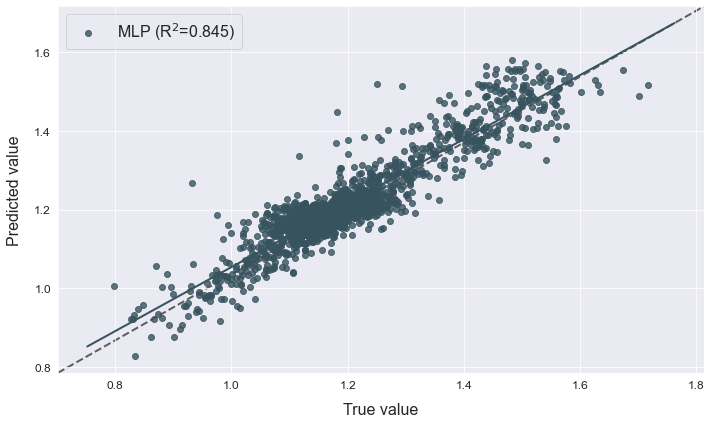

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


R$_{\mathrm{cloud}}$ ready!
<< ================== ATOM ================== >>
Algorithm task: regression.
Parallel processing with 7 cores.

Dataset stats ==================== >>
Shape: (8274, 10)
Scaled: False
Outlier values: 221 (0.3%)
-------------------------------------
Train set size: 6620
Test set size: 1654
-------------------------------------

Scaling features...
Pruning outliers...
 --> Dropping 137 outliers.

Training ========================= >>
Models: MLP
Metric: neg_median_absolute_error, r2



Running BO for Multi-layer Perceptron...
| call             | hidden_layer_sizes | hidden_layer_sizes | hidden_layer_sizes | activation |   alpha | batch_size | learning_rate | learning_rate_init | power_t | max_iter | neg_median_absolute_error | best_neg_median_absolute_error |      r2 | best_r2 |    time | total_time |
| ---------------- | ------------------ | ------------------ | ------------------ | ---------- | ------- | ---------- | ------------- | ------------------ | -----

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 1  |       (82, 18, 78) |       (82, 18, 78) |       (82, 18, 78) |       relu |  0.0022 |         32 |           --- |              0.005 |     --- |      343 |                     -0.14 |                          -0.14 |  0.8071 |  0.8071 |  3.096s |     3.117s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 2  |       (15, 72, 94) |       (15, 72, 94) |       (15, 72, 94) |   identity |  0.0948 |        157 |           --- |              0.001 |     --- |      286 |                   -0.1651 |                          -0.14 |  0.7572 |  0.8071 | 11.188s |    14.430s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 3  |        (46, 5, 97) |        (46, 5, 97) |        (46, 5, 97) |   logistic |  0.0002 |        158 |           --- |              0.093 |     --- |      437 |                   -0.2936 |                          -0.14 |   -0.09 |  0.8071 |  1.814s |    16.359s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 4  |        (71, 45, 1) |        (71, 45, 1) |        (71, 45, 1) |       tanh |  0.0049 |        101 |           --- |              0.003 |     --- |      357 |                   -0.1331 |                        -0.1331 |  0.8248 |  0.8248 | 15.468s |    31.941s |


Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 5  |       (65, 83, 17) |       (65, 83, 17) |       (65, 83, 17) |   logistic |  0.0004 |        191 |           --- |              0.003 |     --- |       64 |                   -0.1681 |                        -0.1331 |  0.6524 |  0.8248 |  5.086s |    37.148s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 6  |       (86, 45, 40) |       (86, 45, 40) |       (86, 45, 40) |       tanh |  0.0152 |         87 |           --- |              0.011 |     --- |      430 |                   -0.1288 |                        -0.1288 |  0.7947 |  0.8248 |  9.594s |    46.868s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 7  |       (77, 54, 59) |       (77, 54, 59) |       (77, 54, 59) |       tanh |  0.0066 |         75 |           --- |              0.002 |     --- |      241 |                   -0.1147 |                        -0.1147 |  0.8437 |  0.8437 | 13.617s |     1m:01s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 8  |        (46, 29, 1) |        (46, 29, 1) |        (46, 29, 1) |   logistic |  0.0136 |        199 |           --- |              0.071 |     --- |      462 |                   -0.3651 |                        -0.1147 | -0.0001 |  0.8437 |  1.435s |     1m:02s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 9  |       (87, 45, 10) |       (87, 45, 10) |       (87, 45, 10) |   logistic |  0.0102 |        169 |           --- |              0.004 |     --- |      222 |                     -0.23 |                        -0.1147 |   0.606 |  0.8437 | 11.818s |     1m:14s |


Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 10 |       (97, 85, 72) |       (97, 85, 72) |       (97, 85, 72) |   logistic |  0.0006 |         18 |           --- |              0.002 |     --- |      141 |                   -0.1124 |                        -0.1124 |  0.8054 |  0.8437 | 21.217s |     1m:35s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 11 |       (91, 48, 56) |       (91, 48, 56) |       (91, 48, 56) |       relu |  0.0003 |        154 |           --- |              0.003 |     --- |      319 |                   -0.1275 |                        -0.1124 |  0.7615 |  0.8437 |  5.055s |     1m:41s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 12 |       (73, 88, 62) |       (73, 88, 62) |       (73, 88, 62) |   logistic |  0.0002 |        118 |           --- |              0.007 |     --- |      196 |                   -0.3715 |                        -0.1124 | -0.0003 |  0.8437 |  1.618s |     1m:42s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 13 |       (21, 36, 91) |       (21, 36, 91) |       (21, 36, 91) |   logistic |  0.0088 |          8 |           --- |              0.004 |     --- |      290 |                   -0.1637 |                        -0.1124 |  0.7047 |  0.8437 |  9.720s |     1m:52s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 14 |       (54, 69, 27) |       (54, 69, 27) |       (54, 69, 27) |   logistic |  0.0003 |         61 |           --- |              0.006 |     --- |      164 |                   -0.1099 |                        -0.1099 |  0.8377 |  0.8437 |  4.816s |     1m:57s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 15 |       (32, 70, 71) |       (32, 70, 71) |       (32, 70, 71) |   identity |  0.0985 |         73 |           --- |              0.007 |     --- |      205 |                    -0.156 |                        -0.1099 |  0.7312 |  0.8437 |  7.463s |     2m:05s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 16 |       (67, 68, 53) |       (67, 68, 53) |       (67, 68, 53) |   logistic |  0.0046 |        151 |           --- |              0.005 |     --- |      411 |                   -0.1182 |                        -0.1099 |  0.8143 |  0.8437 |  8.893s |     2m:14s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 17 |       (52, 98, 40) |       (52, 98, 40) |       (52, 98, 40) |       relu |  0.0248 |         44 |           --- |              0.025 |     --- |      197 |                   -0.1685 |                        -0.1099 |  0.7541 |  0.8437 |  4.656s |     2m:19s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 18 |       (30, 71, 81) |       (30, 71, 81) |       (30, 71, 81) |   logistic |  0.0002 |        236 |           --- |              0.011 |     --- |      354 |                   -0.3469 |                        -0.1099 | -0.0009 |  0.8437 |  1.472s |     2m:20s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 19 |       (76, 21, 54) |       (76, 21, 54) |       (76, 21, 54) |       relu |  0.0005 |         50 |           --- |              0.011 |     --- |      498 |                   -0.1742 |                        -0.1099 |  0.6413 |  0.8437 |  0.827s |     2m:21s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 20 |       (97, 56, 88) |       (97, 56, 88) |       (97, 56, 88) |   logistic |  0.0007 |        177 |           --- |              0.052 |     --- |      449 |                   -0.3863 |                        -0.1099 | -0.0041 |  0.8437 |  1.643s |     2m:23s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 21 |       (87, 94, 79) |       (87, 94, 79) |       (87, 94, 79) |       relu |  0.0055 |         98 |           --- |              0.089 |     --- |      187 |                   -0.1382 |                        -0.1099 |  0.7668 |  0.8437 |  5.030s |     2m:28s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 22 |       (54, 45, 99) |       (54, 45, 99) |       (54, 45, 99) |   logistic |  0.0001 |        128 |           --- |              0.005 |     --- |      374 |                   -0.1274 |                        -0.1099 |  0.8318 |  0.8437 | 21.826s |     2m:50s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 23 |       (38, 54, 51) |       (38, 54, 51) |       (38, 54, 51) |       relu |  0.0006 |        151 |           --- |              0.009 |     --- |      245 |                   -0.1167 |                        -0.1099 |  0.8475 |  0.8475 |  2.952s |     2m:53s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 24 |       (42, 65, 67) |       (42, 65, 67) |       (42, 65, 67) |       tanh |  0.0005 |        129 |           --- |              0.034 |     --- |      498 |                   -0.1878 |                        -0.1099 |  0.7488 |  0.8475 |  4.876s |     2m:58s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 25 |       (52, 28, 88) |       (52, 28, 88) |       (52, 28, 88) |       relu |  0.0723 |         88 |           --- |              0.014 |     --- |       84 |                    -0.152 |                        -0.1099 |  0.7423 |  0.8475 |  1.971s |     3m:00s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 26 |       (38, 19, 27) |       (38, 19, 27) |       (38, 19, 27) |   logistic |  0.0013 |        104 |           --- |              0.072 |     --- |      144 |                   -0.3413 |                        -0.1099 |  -0.002 |  0.8475 |  0.413s |     3m:01s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 27 |       (70, 36, 25) |       (70, 36, 25) |       (70, 36, 25) |   logistic |  0.0009 |        213 |           --- |              0.026 |     --- |      183 |                   -0.3665 |                        -0.1099 |   -0.01 |  0.8475 |  1.205s |     3m:02s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 28 |       (48, 26, 61) |       (48, 26, 61) |       (48, 26, 61) |   identity |  0.0001 |        160 |           --- |              0.001 |     --- |       73 |                   -0.1578 |                        -0.1099 |  0.7342 |  0.8475 |  4.319s |     3m:06s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 29 |        (90, 3, 58) |        (90, 3, 58) |        (90, 3, 58) |   logistic |  0.0104 |         87 |           --- |              0.092 |     --- |      437 |                   -0.3386 |                        -0.1099 |  0.3429 |  0.8475 |  1.288s |     3m:08s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 30 |        (33, 4, 30) |        (33, 4, 30) |        (33, 4, 30) |       relu |   0.001 |        208 |           --- |              0.085 |     --- |      429 |                    -0.366 |                        -0.1099 | -0.0006 |  0.8475 |  0.290s |     3m:08s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 31 |       (27, 41, 70) |       (27, 41, 70) |       (27, 41, 70) |   identity |  0.0003 |        243 |           --- |              0.001 |     --- |      245 |                   -0.1521 |                        -0.1099 |  0.7095 |  0.8475 |  3.646s |     3m:12s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 32 |       (77, 25, 18) |       (77, 25, 18) |       (77, 25, 18) |   identity |  0.0019 |        175 |           --- |              0.068 |     --- |      158 |                   -0.1663 |                        -0.1099 |  0.7095 |  0.8475 |  1.457s |     3m:14s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 33 |       (18, 18, 93) |       (18, 18, 93) |       (18, 18, 93) |       relu |  0.0035 |        167 |           --- |              0.029 |     --- |      305 |                   -0.1437 |                        -0.1099 |  0.7936 |  0.8475 |  2.077s |     3m:16s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 34 |       (24, 12, 34) |       (24, 12, 34) |       (24, 12, 34) |   identity |  0.0002 |         83 |           --- |              0.002 |     --- |      394 |                   -0.1528 |                        -0.1099 |  0.7411 |  0.8475 |  0.571s |     3m:16s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 35 |       (83, 35, 46) |       (83, 35, 46) |       (83, 35, 46) |       relu |  0.0001 |        238 |           --- |              0.003 |     --- |      470 |                   -0.1276 |                        -0.1099 |  0.7988 |  0.8475 |  4.437s |     3m:21s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 36 |       (55, 54, 68) |       (55, 54, 68) |       (55, 54, 68) |       relu |  0.0679 |        237 |           --- |              0.019 |     --- |      355 |                   -0.1362 |                        -0.1099 |   0.764 |  0.8475 |  3.441s |     3m:25s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 37 |       (62, 13, 81) |       (62, 13, 81) |       (62, 13, 81) |       relu |  0.0075 |        207 |           --- |              0.003 |     --- |      147 |                   -0.1074 |                        -0.1074 |  0.8216 |  0.8475 |  5.597s |     3m:30s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 38 |        (44, 4, 62) |        (44, 4, 62) |        (44, 4, 62) |   logistic |  0.0093 |        101 |           --- |              0.005 |     --- |      273 |                   -0.1249 |                        -0.1074 |  0.7777 |  0.8475 |  3.446s |     3m:34s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 39 |       (72, 35, 94) |       (72, 35, 94) |       (72, 35, 94) |   identity |  0.0018 |        242 |           --- |              0.007 |     --- |      309 |                   -0.1643 |                        -0.1074 |  0.6425 |  0.8475 |  1.290s |     3m:35s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 40 |       (76, 13, 25) |       (76, 13, 25) |       (76, 13, 25) |       relu |  0.0399 |        144 |           --- |              0.023 |     --- |      157 |                   -0.1197 |                        -0.1074 |  0.7946 |  0.8475 |  0.489s |     3m:36s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 41 |       (44, 53, 50) |       (44, 53, 50) |       (44, 53, 50) |   logistic |  0.0008 |         32 |           --- |              0.083 |     --- |      210 |                   -0.2046 |                        -0.1074 |  0.6872 |  0.8475 |  2.786s |     3m:39s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 42 |       (96, 68, 48) |       (96, 68, 48) |       (96, 68, 48) |   logistic |  0.0002 |         30 |           --- |              0.013 |     --- |      476 |                   -0.4026 |                        -0.1074 | -0.0082 |  0.8475 |  1.172s |     3m:40s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 43 |       (80, 11, 93) |       (80, 11, 93) |       (80, 11, 93) |       tanh |  0.0972 |         22 |           --- |              0.012 |     --- |      486 |                   -0.1949 |                        -0.1074 |  0.6596 |  0.8475 |  4.432s |     3m:45s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 44 |       (72, 84, 87) |       (72, 84, 87) |       (72, 84, 87) |       tanh |  0.0019 |         62 |           --- |              0.061 |     --- |      281 |                   -0.3231 |                        -0.1074 | -0.0228 |  0.8475 |  3.067s |     3m:48s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 45 |       (31, 58, 86) |       (31, 58, 86) |       (31, 58, 86) |       tanh |  0.0005 |        228 |           --- |              0.005 |     --- |      267 |                   -0.1087 |                        -0.1074 |  0.8409 |  0.8475 | 11.711s |     3m:60s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 46 |       (44, 71, 25) |       (44, 71, 25) |       (44, 71, 25) |   logistic |   0.002 |         69 |           --- |              0.014 |     --- |      395 |                   -0.1069 |                        -0.1069 |  0.7921 |  0.8475 |  3.347s |     4m:03s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 47 |       (84, 74, 68) |       (84, 74, 68) |       (84, 74, 68) |   logistic |  0.0016 |        124 |           --- |              0.011 |     --- |      411 |                   -0.3864 |                        -0.1069 | -0.0002 |  0.8475 |  1.709s |     4m:05s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 48 |       (98, 56, 32) |       (98, 56, 32) |       (98, 56, 32) |   identity |  0.0594 |        230 |           --- |              0.025 |     --- |      125 |                   -0.1891 |                        -0.1069 |  0.6774 |  0.8475 |  2.949s |     4m:08s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 49 |      (30, 29, 100) |      (30, 29, 100) |      (30, 29, 100) |       relu |  0.0014 |        186 |           --- |              0.083 |     --- |      228 |                   -0.1489 |                        -0.1069 |   0.745 |  0.8475 |  4.634s |     4m:13s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 50 |       (20, 34, 17) |       (20, 34, 17) |       (20, 34, 17) |       relu |  0.0015 |         64 |           --- |              0.005 |     --- |      254 |                   -0.1565 |                        -0.1069 |  0.7591 |  0.8475 |  1.681s |     4m:14s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 51     |       (29, 72, 28) |       (29, 72, 28) |       (29, 72, 28) |   logistic |  0.0049 |        109 |           --- |              0.007 |     --- |      370 |                   -0.1245 |                        -0.1069 |  0.8076 |  0.8475 |  3.508s |     4m:19s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 52     |       (62, 64, 47) |       (62, 64, 47) |       (62, 64, 47) |   logistic |  0.0079 |        101 |           --- |              0.005 |     --- |      442 |                   -0.1431 |                        -0.1069 |  0.7837 |  0.8475 |  9.664s |     4m:30s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 53     |       (70, 39, 84) |       (70, 39, 84) |       (70, 39, 84) |   logistic |  0.0006 |        201 |           --- |              0.002 |     --- |      141 |                   -0.1385 |                        -0.1069 |  0.7582 |  0.8475 | 11.348s |     4m:43s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 54     |       (41, 62, 24) |       (41, 62, 24) |       (41, 62, 24) |   logistic |  0.0002 |          8 |           --- |              0.007 |     --- |      464 |                   -0.1164 |                        -0.1069 |  0.8297 |  0.8475 | 15.293s |     4m:60s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 55     |       (38, 53, 24) |       (38, 53, 24) |       (38, 53, 24) |   logistic |  0.0023 |        113 |           --- |              0.012 |     --- |      382 |                   -0.3763 |                        -0.1069 | -0.0002 |  0.8475 |  0.445s |     5m:02s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 56     |       (42, 51, 20) |       (42, 51, 20) |       (42, 51, 20) |   logistic |  0.0035 |         15 |           --- |              0.002 |     --- |      450 |                   -0.1631 |                        -0.1069 |  0.6973 |  0.8475 |  5.664s |     5m:09s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 57     |      (54, 73, 100) |      (54, 73, 100) |      (54, 73, 100) |       tanh |  0.0012 |        250 |           --- |              0.003 |     --- |      361 |                   -0.1174 |                        -0.1069 |   0.807 |  0.8475 | 13.678s |     5m:24s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 58     |       (17, 31, 77) |       (17, 31, 77) |       (17, 31, 77) |       tanh |  0.0016 |        167 |           --- |              0.002 |     --- |       58 |                   -0.1202 |                        -0.1069 |  0.7922 |  0.8475 |  4.326s |     5m:30s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 59     |           (52, 39) |           (52, 39) |           (52, 39) |       tanh |  0.0001 |        250 |           --- |              0.002 |     --- |      175 |                   -0.1341 |                        -0.1069 |  0.7849 |  0.8475 |  8.393s |     5m:39s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 60     |       (22, 100, 4) |       (22, 100, 4) |       (22, 100, 4) |       tanh |     0.1 |        106 |           --- |              0.003 |     --- |      443 |                   -0.1201 |                        -0.1069 |  0.8359 |  0.8475 |  3.818s |     5m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 61     |       (10, 93, 54) |       (10, 93, 54) |       (10, 93, 54) |       relu |  0.0214 |        250 |           --- |              0.001 |     --- |      139 |                   -0.1191 |                        -0.1069 |  0.7955 |  0.8475 |  7.275s |     5m:53s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 62     |     (35, 100, 100) |     (35, 100, 100) |     (35, 100, 100) |       relu |     0.1 |        250 |           --- |              0.003 |     --- |      129 |                    -0.106 |                         -0.106 |  0.8333 |  0.8475 |  7.092s |     6m:02s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 63     |       (42, 75, 75) |       (42, 75, 75) |       (42, 75, 75) |       relu |  0.0143 |        250 |           --- |              0.002 |     --- |      414 |                   -0.1191 |                         -0.106 |  0.8261 |  0.8475 |  4.704s |     6m:08s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 64     |       (73, 77, 51) |       (73, 77, 51) |       (73, 77, 51) |       relu |   0.048 |        218 |           --- |              0.004 |     --- |      232 |                   -0.1134 |                         -0.106 |   0.802 |  0.8475 |  4.853s |     6m:15s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 65     |       (45, 45, 71) |       (45, 45, 71) |       (45, 45, 71) |       relu |  0.0039 |        250 |           --- |              0.003 |     --- |      430 |                   -0.1337 |                         -0.106 |  0.7551 |  0.8475 |  2.729s |     6m:19s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 66     |       (45, 62, 77) |       (45, 62, 77) |       (45, 62, 77) |       relu |  0.0909 |        250 |           --- |              0.003 |     --- |       57 |                   -0.1165 |                         -0.106 |  0.7747 |  0.8475 |  3.448s |     6m:24s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 67     |       (21, 76, 62) |       (21, 76, 62) |       (21, 76, 62) |   logistic |  0.0032 |         58 |           --- |              0.015 |     --- |      297 |                   -0.1547 |                         -0.106 |  0.7557 |  0.8475 |  9.419s |     6m:35s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 68     |       (18, 75, 15) |       (18, 75, 15) |       (18, 75, 15) |   logistic |   0.009 |         67 |           --- |              0.015 |     --- |      353 |                   -0.1757 |                         -0.106 |  0.6737 |  0.8475 |  1.881s |     6m:39s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 69     |       (49, 78, 47) |       (49, 78, 47) |       (49, 78, 47) |       relu |  0.0009 |        250 |           --- |              0.003 |     --- |      281 |                   -0.1179 |                         -0.106 |  0.7999 |  0.8475 |  8.964s |     6m:50s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 70     |       (43, 87, 63) |       (43, 87, 63) |       (43, 87, 63) |       relu |  0.0397 |        250 |           --- |              0.002 |     --- |      403 |                   -0.1278 |                         -0.106 |  0.8357 |  0.8475 | 12.284s |     7m:07s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 71     |       (27, 61, 19) |       (27, 61, 19) |       (27, 61, 19) |       tanh |  0.0768 |          8 |           --- |              0.001 |     --- |      484 |                   -0.1555 |                         -0.106 |  0.7086 |  0.8475 | 59.301s |     8m:10s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 72     |      (100, 12, 55) |      (100, 12, 55) |      (100, 12, 55) |       tanh |  0.0742 |        250 |           --- |              0.001 |     --- |       68 |                   -0.1568 |                         -0.106 |  0.7178 |  0.8475 |  5.599s |     8m:17s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 73     |       (45, 72, 29) |       (45, 72, 29) |       (45, 72, 29) |       relu |   0.002 |         77 |           --- |              0.001 |     --- |       82 |                   -0.1187 |                         -0.106 |  0.7983 |  0.8475 |  2.748s |     8m:22s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 74     |      (64, 38, 100) |      (64, 38, 100) |      (64, 38, 100) |       relu |  0.0255 |        218 |           --- |              0.001 |     --- |       50 |                   -0.1286 |                         -0.106 |  0.7908 |  0.8475 |  3.458s |     8m:27s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 75     |       (10, 69, 31) |       (10, 69, 31) |       (10, 69, 31) |   logistic |  0.0251 |        171 |           --- |              0.001 |     --- |      256 |                   -0.1319 |                         -0.106 |  0.7821 |  0.8475 | 17.901s |     8m:46s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 76     |       (43, 83, 60) |       (43, 83, 60) |       (43, 83, 60) |   logistic |  0.0109 |         84 |           --- |              0.001 |     --- |      199 |                   -0.1409 |                         -0.106 |  0.7268 |  0.8475 | 21.198s |     9m:09s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 77     |      (47, 100, 99) |      (47, 100, 99) |      (47, 100, 99) |       relu |  0.0447 |        218 |           --- |              0.003 |     --- |       50 |                   -0.1174 |                         -0.106 |  0.8066 |  0.8475 |  5.160s |     9m:17s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 78     |       (38, 56, 73) |       (38, 56, 73) |       (38, 56, 73) |       relu |  0.0003 |        235 |           --- |              0.003 |     --- |      199 |                   -0.1065 |                         -0.106 |  0.8019 |  0.8475 |  4.143s |     9m:23s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 79     |       (42, 76, 70) |       (42, 76, 70) |       (42, 76, 70) |       relu |  0.0063 |        221 |           --- |              0.003 |     --- |       67 |                   -0.1149 |                         -0.106 |  0.8067 |  0.8475 |  3.449s |     9m:28s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 80     |       (36, 78, 94) |       (36, 78, 94) |       (36, 78, 94) |       relu |  0.0147 |        237 |           --- |              0.003 |     --- |      395 |                   -0.1194 |                         -0.106 |  0.8264 |  0.8475 |  4.365s |     9m:34s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 81     |       (37, 53, 75) |       (37, 53, 75) |       (37, 53, 75) |       relu |  0.0003 |        235 |           --- |              0.003 |     --- |       52 |                   -0.1206 |                         -0.106 |  0.8303 |  0.8475 |  2.641s |     9m:39s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 82     |       (10, 60, 32) |       (10, 60, 32) |       (10, 60, 32) |   identity |  0.0655 |          8 |           --- |                0.1 |     --- |      491 |                   -0.6846 |                         -0.106 | -4.2373 |  0.8475 |  2.715s |     9m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 83     |       (13, 75, 75) |       (13, 75, 75) |       (13, 75, 75) |   logistic |  0.0697 |         69 |           --- |              0.006 |     --- |      379 |                   -0.1661 |                         -0.106 |  0.6893 |  0.8475 | 11.540s |     9m:58s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 84     |       (10, 26, 14) |       (10, 26, 14) |       (10, 26, 14) |       relu |  0.0004 |        248 |           --- |              0.008 |     --- |      108 |                   -0.1123 |                         -0.106 |  0.7832 |  0.8475 |  2.874s |    10m:05s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 85     |       (39, 47, 60) |       (39, 47, 60) |       (39, 47, 60) |       tanh |  0.0077 |        210 |           --- |              0.004 |     --- |       65 |                   -0.1182 |                         -0.106 |  0.7826 |  0.8475 |  5.284s |    10m:12s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 86     |        (10, 4, 69) |        (10, 4, 69) |        (10, 4, 69) |       tanh |   0.006 |        121 |           --- |              0.021 |     --- |      103 |                   -0.1268 |                         -0.106 |  0.7901 |  0.8475 |  2.796s |    10m:17s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 87     |       (16, 63, 31) |       (16, 63, 31) |       (16, 63, 31) |       tanh |  0.0042 |        200 |           --- |              0.008 |     --- |      161 |                    -0.119 |                         -0.106 |  0.8147 |  0.8475 | 17.072s |    10m:40s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 88     |       (45, 27, 70) |       (45, 27, 70) |       (45, 27, 70) |   logistic |   0.002 |        103 |           --- |              0.006 |     --- |      100 |                   -0.1081 |                         -0.106 |  0.7979 |  0.8475 |  2.903s |    10m:46s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 89     |       (89, 89, 53) |       (89, 89, 53) |       (89, 89, 53) |       tanh |  0.0686 |        175 |           --- |              0.005 |     --- |      236 |                   -0.1238 |                         -0.106 |  0.8218 |  0.8475 | 26.002s |    11m:14s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 90     |       (86, 49, 67) |       (86, 49, 67) |       (86, 49, 67) |       tanh |  0.0246 |        173 |           --- |              0.002 |     --- |      124 |                    -0.123 |                         -0.106 |  0.8218 |  0.8475 | 20.875s |    11m:38s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 91     |            (55, 1) |            (55, 1) |            (55, 1) |       relu |  0.0001 |        245 |           --- |              0.007 |     --- |      178 |                   -0.3534 |                         -0.106 |    -0.0 |  0.8475 |  3.325s |    11m:43s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 92     |       (35, 56, 55) |       (35, 56, 55) |       (35, 56, 55) |       tanh |  0.0006 |        164 |           --- |              0.007 |     --- |      234 |                   -0.1113 |                         -0.106 |  0.8382 |  0.8475 |  5.792s |    11m:52s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 93     |        (10, 81, 5) |        (10, 81, 5) |        (10, 81, 5) |       tanh |  0.0002 |         89 |           --- |              0.011 |     --- |      120 |                   -0.3705 |                         -0.106 |  -0.001 |  0.8475 |  0.599s |    11m:55s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 94     |       (54, 65, 32) |       (54, 65, 32) |       (54, 65, 32) |       relu |  0.0005 |         75 |           --- |              0.003 |     --- |      194 |                   -0.1164 |                         -0.106 |   0.821 |  0.8475 |  3.462s |    12m:01s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 95     |       (10, 24, 67) |       (10, 24, 67) |       (10, 24, 67) |       relu |  0.0006 |        193 |           --- |              0.007 |     --- |      355 |                   -0.1234 |                         -0.106 |  0.7622 |  0.8475 |  5.402s |    12m:09s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 96     |       (43, 73, 27) |       (43, 73, 27) |       (43, 73, 27) |   logistic |  0.0021 |        117 |           --- |               0.01 |     --- |       61 |                   -0.3564 |                         -0.106 |     0.0 |  0.8475 |  1.429s |    12m:13s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 97     |       (25, 22, 35) |       (25, 22, 35) |       (25, 22, 35) |       tanh |  0.0016 |         45 |           --- |              0.009 |     --- |      257 |                   -0.1004 |                        -0.1004 |  0.8483 |  0.8483 |  4.447s |    12m:19s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 98     |       (76, 84, 43) |       (76, 84, 43) |       (76, 84, 43) |       relu |  0.0005 |        250 |           --- |              0.007 |     --- |      219 |                   -0.1241 |                        -0.1004 |  0.7426 |  0.8483 |  2.828s |    12m:25s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 99     |       (70, 12, 26) |       (70, 12, 26) |       (70, 12, 26) |   logistic |  0.0012 |        165 |           --- |              0.006 |     --- |      493 |                   -0.1137 |                        -0.1004 |  0.8226 |  0.8483 |  2.424s |    12m:29s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 100    |       (27, 94, 63) |       (27, 94, 63) |       (27, 94, 63) |   logistic |  0.0033 |        139 |           --- |              0.014 |     --- |      462 |                   -0.3689 |                        -0.1004 | -0.0018 |  0.8483 |  1.943s |    12m:34s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To


Results for Multi-layer Perceptron:         
Bayesian Optimization ---------------------------
Best call --> Iteration 97
Best parameters --> {'hidden_layer_sizes': (25, 22, 35), 'activation': 'tanh', 'alpha': 0.0016, 'batch_size': 45, 'learning_rate_init': 0.009, 'max_iter': 257}
Best evaluation --> neg_median_absolute_error: -0.1004   r2: 0.8483
Time elapsed: 12m:36s
Fit ---------------------------------------------
Train evaluation --> neg_median_absolute_error: -0.1323   r2: 0.8367
Test evaluation --> neg_median_absolute_error: -0.1299   r2: 0.8314
Time elapsed: 3.808s
Bootstrap ---------------------------------------
Evaluation --> neg_median_absolute_error: -0.1415 ± 0.0239   r2: 0.7679 ± 0.0327
Time elapsed: 16.539s
-------------------------------------------------
Total time: 12m:57s


Final results ==================== >>
Duration: 12m:57s
-------------------------------------
Multi-layer Perceptron --> neg_median_absolute_error: -0.1415 ± 0.0239   r2: 0.7679 ± 0.0327 ~


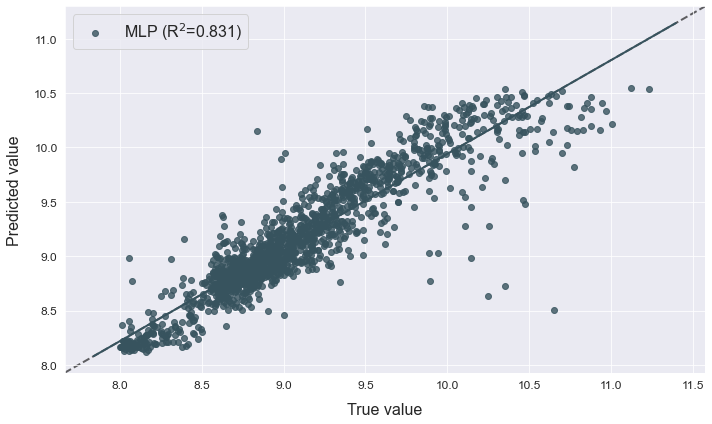

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


M$_{\mathrm{\ast}}$ ready!
<< ================== ATOM ================== >>
Algorithm task: regression.
Parallel processing with 7 cores.

Dataset stats ==================== >>
Shape: (8274, 10)
Scaled: False
Outlier values: 290 (0.4%)
-------------------------------------
Train set size: 6620
Test set size: 1654
-------------------------------------

Scaling features...
Pruning outliers...
 --> Dropping 154 outliers.

Training ========================= >>
Models: MLP
Metric: neg_median_absolute_error, r2



Running BO for Multi-layer Perceptron...
| call             | hidden_layer_sizes | hidden_layer_sizes | hidden_layer_sizes | activation |   alpha | batch_size | learning_rate | learning_rate_init | power_t | max_iter | neg_median_absolute_error | best_neg_median_absolute_error |      r2 | best_r2 |    time | total_time |
| ---------------- | ------------------ | ------------------ | ------------------ | ---------- | ------- | ---------- | ------------- | ------------------ | ------

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 1  |       (82, 18, 78) |       (82, 18, 78) |       (82, 18, 78) |       relu |  0.0022 |         32 |           --- |              0.005 |     --- |      343 |                   -0.0726 |                        -0.0726 |  0.9396 |  0.9396 |  1.717s |     1.738s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 2  |       (15, 72, 94) |       (15, 72, 94) |       (15, 72, 94) |   identity |  0.0948 |        157 |           --- |              0.001 |     --- |      286 |                   -0.1127 |                        -0.0726 |  0.8572 |  0.9396 | 11.742s |    13.597s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 3  |        (46, 5, 97) |        (46, 5, 97) |        (46, 5, 97) |   logistic |  0.0002 |        158 |           --- |              0.093 |     --- |      437 |                   -0.2637 |                        -0.0726 | -0.0588 |  0.9396 |  1.558s |    15.271s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 4  |        (71, 45, 1) |        (71, 45, 1) |        (71, 45, 1) |       tanh |  0.0049 |        101 |           --- |              0.003 |     --- |      357 |                   -0.2979 |                        -0.0726 | -0.0047 |  0.9396 |  8.168s |    23.555s |


Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 5  |       (65, 83, 17) |       (65, 83, 17) |       (65, 83, 17) |   logistic |  0.0004 |        191 |           --- |              0.003 |     --- |       64 |                    -0.109 |                        -0.0726 |  0.8349 |  0.9396 |  5.948s |    29.619s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 6  |       (86, 45, 40) |       (86, 45, 40) |       (86, 45, 40) |       tanh |  0.0152 |         87 |           --- |              0.011 |     --- |      430 |                   -0.0798 |                        -0.0726 |  0.9193 |  0.9396 |  9.048s |    38.781s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 7  |       (77, 54, 59) |       (77, 54, 59) |       (77, 54, 59) |       tanh |  0.0066 |         75 |           --- |              0.002 |     --- |      241 |                   -0.0609 |                        -0.0609 |  0.9413 |  0.9413 | 11.032s |    49.929s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 8  |        (46, 29, 1) |        (46, 29, 1) |        (46, 29, 1) |   logistic |  0.0136 |        199 |           --- |              0.071 |     --- |      462 |                    -0.309 |                        -0.0609 | -0.0107 |  0.9413 |  2.032s |    52.091s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 9  |       (87, 45, 10) |       (87, 45, 10) |       (87, 45, 10) |   logistic |  0.0102 |        169 |           --- |              0.004 |     --- |      222 |                   -0.2955 |                        -0.0609 | -0.0038 |  0.9413 |  4.981s |    57.187s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 10 |       (97, 85, 72) |       (97, 85, 72) |       (97, 85, 72) |   logistic |  0.0006 |         18 |           --- |              0.002 |     --- |      141 |                     -0.07 |                        -0.0609 |   0.911 |  0.9413 |  8.716s |     1m:06s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 11 |       (91, 48, 56) |       (91, 48, 56) |       (91, 48, 56) |       relu |  0.0003 |        154 |           --- |              0.003 |     --- |      319 |                   -0.0814 |                        -0.0609 |  0.9177 |  0.9413 | 10.929s |     1m:17s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 12 |       (73, 88, 62) |       (73, 88, 62) |       (73, 88, 62) |   logistic |  0.0002 |        118 |           --- |              0.007 |     --- |      196 |                    -0.293 |                        -0.0609 |  0.0001 |  0.9413 |  5.127s |     1m:23s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: htt

| Initial point 13 |       (21, 36, 91) |       (21, 36, 91) |       (21, 36, 91) |   logistic |  0.0088 |          8 |           --- |              0.004 |     --- |      290 |                   -0.1264 |                        -0.0609 |  0.7883 |  0.9413 | 15.128s |     1m:38s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 14 |       (54, 69, 27) |       (54, 69, 27) |       (54, 69, 27) |   logistic |  0.0003 |         61 |           --- |              0.006 |     --- |      164 |                   -0.0667 |                        -0.0609 |  0.9316 |  0.9413 |  3.089s |     1m:41s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 15 |       (32, 70, 71) |       (32, 70, 71) |       (32, 70, 71) |   identity |  0.0985 |         73 |           --- |              0.007 |     --- |      205 |                    -0.119 |                        -0.0609 |  0.8709 |  0.9413 | 10.584s |     1m:52s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 16 |       (67, 68, 53) |       (67, 68, 53) |       (67, 68, 53) |   logistic |  0.0046 |        151 |           --- |              0.005 |     --- |      411 |                   -0.0735 |                        -0.0609 |  0.9294 |  0.9413 | 11.370s |     2m:03s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 17 |       (52, 98, 40) |       (52, 98, 40) |       (52, 98, 40) |       relu |  0.0248 |         44 |           --- |              0.025 |     --- |      197 |                   -0.0754 |                        -0.0609 |   0.921 |  0.9413 |  2.152s |     2m:06s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 18 |       (30, 71, 81) |       (30, 71, 81) |       (30, 71, 81) |   logistic |  0.0002 |        236 |           --- |              0.011 |     --- |      354 |                   -0.0689 |                        -0.0609 |  0.9266 |  0.9413 |  8.712s |     2m:15s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 19 |       (76, 21, 54) |       (76, 21, 54) |       (76, 21, 54) |       relu |  0.0005 |         50 |           --- |              0.011 |     --- |      498 |                   -0.0593 |                        -0.0593 |  0.9219 |  0.9413 |  1.280s |     2m:16s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 20 |       (97, 56, 88) |       (97, 56, 88) |       (97, 56, 88) |   logistic |  0.0007 |        177 |           --- |              0.052 |     --- |      449 |                   -0.2949 |                        -0.0593 | -0.0074 |  0.9413 |  2.367s |     2m:18s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 21 |       (87, 94, 79) |       (87, 94, 79) |       (87, 94, 79) |       relu |  0.0055 |         98 |           --- |              0.089 |     --- |      187 |                   -0.1245 |                        -0.0593 |  0.7592 |  0.9413 |  3.972s |     2m:23s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 22 |       (54, 45, 99) |       (54, 45, 99) |       (54, 45, 99) |   logistic |  0.0001 |        128 |           --- |              0.005 |     --- |      374 |                   -0.0651 |                        -0.0593 |  0.9171 |  0.9413 | 27.387s |     2m:50s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: htt

| Initial point 23 |       (38, 54, 51) |       (38, 54, 51) |       (38, 54, 51) |       relu |  0.0006 |        151 |           --- |              0.009 |     --- |      245 |                   -0.0649 |                        -0.0593 |  0.9373 |  0.9413 |  9.692s |     3m:00s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 24 |       (42, 65, 67) |       (42, 65, 67) |       (42, 65, 67) |       tanh |  0.0005 |        129 |           --- |              0.034 |     --- |      498 |                   -0.1586 |                        -0.0593 |   0.779 |  0.9413 |  6.966s |     3m:07s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 25 |       (52, 28, 88) |       (52, 28, 88) |       (52, 28, 88) |       relu |  0.0723 |         88 |           --- |              0.014 |     --- |       84 |                   -0.0955 |                        -0.0593 |   0.897 |  0.9413 |  2.262s |     3m:09s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 26 |       (38, 19, 27) |       (38, 19, 27) |       (38, 19, 27) |   logistic |  0.0013 |        104 |           --- |              0.072 |     --- |      144 |                   -0.1464 |                        -0.0593 |  0.8368 |  0.9413 |  1.785s |     3m:11s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 27 |       (70, 36, 25) |       (70, 36, 25) |       (70, 36, 25) |   logistic |  0.0009 |        213 |           --- |              0.026 |     --- |      183 |                   -0.2853 |                        -0.0593 | -0.0016 |  0.9413 |  1.082s |     3m:13s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 28 |       (48, 26, 61) |       (48, 26, 61) |       (48, 26, 61) |   identity |  0.0001 |        160 |           --- |              0.001 |     --- |       73 |                   -0.0994 |                        -0.0593 |  0.8526 |  0.9413 |  2.138s |     3m:15s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 29 |        (90, 3, 58) |        (90, 3, 58) |        (90, 3, 58) |   logistic |  0.0104 |         87 |           --- |              0.092 |     --- |      437 |                   -0.0839 |                        -0.0593 |  0.8884 |  0.9413 |  1.445s |     3m:16s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 30 |        (33, 4, 30) |        (33, 4, 30) |        (33, 4, 30) |       relu |   0.001 |        208 |           --- |              0.085 |     --- |      429 |                    -0.273 |                        -0.0593 | -0.0132 |  0.9413 |  0.230s |     3m:17s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 31 |       (27, 41, 70) |       (27, 41, 70) |       (27, 41, 70) |   identity |  0.0003 |        243 |           --- |              0.001 |     --- |      245 |                   -0.0979 |                        -0.0593 |  0.8684 |  0.9413 |  1.287s |     3m:18s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 32 |       (77, 25, 18) |       (77, 25, 18) |       (77, 25, 18) |   identity |  0.0019 |        175 |           --- |              0.068 |     --- |      158 |                   -0.1844 |                        -0.0593 |   0.777 |  0.9413 |  0.765s |     3m:19s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 33 |       (18, 18, 93) |       (18, 18, 93) |       (18, 18, 93) |       relu |  0.0035 |        167 |           --- |              0.029 |     --- |      305 |                   -0.1594 |                        -0.0593 |  0.8188 |  0.9413 |  1.618s |     3m:21s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 34 |       (24, 12, 34) |       (24, 12, 34) |       (24, 12, 34) |   identity |  0.0002 |         83 |           --- |              0.002 |     --- |      394 |                   -0.0952 |                        -0.0593 |  0.8435 |  0.9413 |  0.794s |     3m:22s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 35 |       (83, 35, 46) |       (83, 35, 46) |       (83, 35, 46) |       relu |  0.0001 |        238 |           --- |              0.003 |     --- |      470 |                   -0.0608 |                        -0.0593 |  0.9271 |  0.9413 |  2.762s |     3m:25s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 36 |       (55, 54, 68) |       (55, 54, 68) |       (55, 54, 68) |       relu |  0.0679 |        237 |           --- |              0.019 |     --- |      355 |                   -0.1087 |                        -0.0593 |  0.9151 |  0.9413 |  3.834s |     3m:29s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 37 |       (62, 13, 81) |       (62, 13, 81) |       (62, 13, 81) |       relu |  0.0075 |        207 |           --- |              0.003 |     --- |      147 |                    -0.062 |                        -0.0593 |  0.9225 |  0.9413 |  2.448s |     3m:31s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 38 |        (44, 4, 62) |        (44, 4, 62) |        (44, 4, 62) |   logistic |  0.0093 |        101 |           --- |              0.005 |     --- |      273 |                   -0.0677 |                        -0.0593 |  0.9205 |  0.9413 |  2.706s |     3m:34s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 39 |       (72, 35, 94) |       (72, 35, 94) |       (72, 35, 94) |   identity |  0.0018 |        242 |           --- |              0.007 |     --- |      309 |                   -0.1231 |                        -0.0593 |  0.7711 |  0.9413 |  0.876s |     3m:35s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 40 |       (76, 13, 25) |       (76, 13, 25) |       (76, 13, 25) |       relu |  0.0399 |        144 |           --- |              0.023 |     --- |      157 |                   -0.0892 |                        -0.0593 |  0.9242 |  0.9413 |  0.589s |     3m:36s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 41 |       (44, 53, 50) |       (44, 53, 50) |       (44, 53, 50) |   logistic |  0.0008 |         32 |           --- |              0.083 |     --- |      210 |                    -0.162 |                        -0.0593 |  0.8242 |  0.9413 |  2.588s |     3m:38s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 42 |       (96, 68, 48) |       (96, 68, 48) |       (96, 68, 48) |   logistic |  0.0002 |         30 |           --- |              0.013 |     --- |      476 |                   -0.2625 |                        -0.0593 | -0.0467 |  0.9413 |  1.156s |     3m:40s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 43 |       (80, 11, 93) |       (80, 11, 93) |       (80, 11, 93) |       tanh |  0.0972 |         22 |           --- |              0.012 |     --- |      486 |                   -0.1099 |                        -0.0593 |  0.8841 |  0.9413 |  3.481s |     3m:43s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 44 |       (72, 84, 87) |       (72, 84, 87) |       (72, 84, 87) |       tanh |  0.0019 |         62 |           --- |              0.061 |     --- |      281 |                   -0.1865 |                        -0.0593 |  0.7422 |  0.9413 | 11.200s |     3m:54s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 45 |       (31, 58, 86) |       (31, 58, 86) |       (31, 58, 86) |       tanh |  0.0005 |        228 |           --- |              0.005 |     --- |      267 |                   -0.0653 |                        -0.0593 |  0.9299 |  0.9413 |  5.587s |     4m:00s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 46 |       (44, 71, 25) |       (44, 71, 25) |       (44, 71, 25) |   logistic |   0.002 |         69 |           --- |              0.014 |     --- |      395 |                   -0.0647 |                        -0.0593 |  0.9168 |  0.9413 |  2.821s |     4m:03s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 47 |       (84, 74, 68) |       (84, 74, 68) |       (84, 74, 68) |   logistic |  0.0016 |        124 |           --- |              0.011 |     --- |      411 |                   -0.2789 |                        -0.0593 | -0.0087 |  0.9413 |  1.721s |     4m:05s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 48 |       (98, 56, 32) |       (98, 56, 32) |       (98, 56, 32) |   identity |  0.0594 |        230 |           --- |              0.025 |     --- |      125 |                   -0.1207 |                        -0.0593 |  0.7848 |  0.9413 |  4.434s |     4m:10s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


| Initial point 49 |      (30, 29, 100) |      (30, 29, 100) |      (30, 29, 100) |       relu |  0.0014 |        186 |           --- |              0.083 |     --- |      228 |                   -0.0627 |                        -0.0593 |  0.9393 |  0.9413 |  2.498s |     4m:12s |


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


| Initial point 50 |       (20, 34, 17) |       (20, 34, 17) |       (20, 34, 17) |       relu |  0.0015 |         64 |           --- |              0.005 |     --- |      254 |                   -0.0723 |                        -0.0593 |  0.9252 |  0.9413 |  1.478s |     4m:14s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 51     |       (48, 34, 40) |       (48, 34, 40) |       (48, 34, 40) |       tanh |  0.0014 |        242 |           --- |              0.007 |     --- |      260 |                   -0.0561 |                        -0.0561 |  0.9391 |  0.9413 |  7.184s |     4m:22s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 52     |       (67, 28, 49) |       (67, 28, 49) |       (67, 28, 49) |       relu |  0.0006 |          8 |           --- |              0.008 |     --- |      490 |                   -0.1162 |                        -0.0561 |  0.8745 |  0.9413 | 13.444s |     4m:37s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 53     |       (18, 98, 38) |       (18, 98, 38) |       (18, 98, 38) |   logistic |  0.0009 |        166 |           --- |              0.008 |     --- |      350 |                   -0.0736 |                        -0.0561 |   0.918 |  0.9413 |  8.945s |     4m:47s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 54     |      (31, 71, 100) |      (31, 71, 100) |      (31, 71, 100) |       relu |  0.0001 |        203 |           --- |              0.004 |     --- |      172 |                   -0.0582 |                        -0.0561 |  0.9397 |  0.9413 |  3.479s |     4m:52s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 55     |       (39, 86, 36) |       (39, 86, 36) |       (39, 86, 36) |   logistic |  0.0025 |         22 |           --- |              0.009 |     --- |       97 |                   -0.0866 |                        -0.0561 |  0.9185 |  0.9413 |  6.210s |     4m:59s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 56     |       (69, 24, 69) |       (69, 24, 69) |       (69, 24, 69) |       tanh |  0.0031 |        198 |           --- |              0.003 |     --- |      363 |                   -0.0616 |                        -0.0561 |  0.9301 |  0.9413 |  8.128s |     5m:09s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 57     |       (62, 19, 62) |       (62, 19, 62) |       (62, 19, 62) |       relu |  0.0127 |        161 |           --- |              0.004 |     --- |      293 |                   -0.0642 |                        -0.0561 |  0.9084 |  0.9413 |  3.429s |     5m:14s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 58     |       (81, 48, 94) |       (81, 48, 94) |       (81, 48, 94) |       relu |  0.0001 |        180 |           --- |              0.002 |     --- |      431 |                   -0.0565 |                        -0.0561 |  0.9376 |  0.9413 |  9.310s |     5m:25s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 59     |       (77, 11, 72) |       (77, 11, 72) |       (77, 11, 72) |       tanh |  0.0002 |        250 |           --- |              0.002 |     --- |      383 |                   -0.0608 |                        -0.0561 |   0.935 |  0.9413 | 14.065s |     5m:41s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 60     |       (35, 14, 31) |       (35, 14, 31) |       (35, 14, 31) |       tanh |  0.0003 |        250 |           --- |              0.006 |     --- |      304 |                   -0.0594 |                        -0.0561 |  0.9234 |  0.9413 |  2.289s |     5m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 61     |      (22, 76, 100) |      (22, 76, 100) |      (22, 76, 100) |   logistic |  0.0436 |         93 |           --- |                0.1 |     --- |      115 |                   -0.1312 |                        -0.0561 |  0.8218 |  0.9413 |  4.220s |     5m:50s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 62     |       (60, 37, 51) |       (60, 37, 51) |       (60, 37, 51) |       tanh |  0.0338 |        113 |           --- |              0.011 |     --- |      471 |                   -0.0719 |                        -0.0561 |  0.9146 |  0.9413 |  3.691s |     5m:55s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 63     |        (17, 85, 3) |        (17, 85, 3) |        (17, 85, 3) |       tanh |  0.0001 |        110 |           --- |               0.01 |     --- |      199 |                   -0.2878 |                        -0.0561 |  -0.009 |  0.9413 |  0.733s |     5m:57s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 64     |       (10, 61, 84) |       (10, 61, 84) |       (10, 61, 84) |       relu |  0.0002 |        194 |           --- |              0.009 |     --- |      400 |                   -0.0621 |                        -0.0561 |  0.9161 |  0.9413 |  5.453s |     6m:04s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 65     |        (10, 1, 61) |        (10, 1, 61) |        (10, 1, 61) |       tanh |  0.0011 |        161 |           --- |              0.012 |     --- |      124 |                   -0.0727 |                        -0.0561 |  0.9267 |  0.9413 |  4.171s |     6m:10s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 66     |      (80, 17, 100) |      (80, 17, 100) |      (80, 17, 100) |       relu |  0.0001 |        155 |           --- |              0.008 |     --- |      252 |                    -0.081 |                        -0.0561 |  0.9261 |  0.9413 |  2.688s |     6m:15s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 67     |       (66, 99, 79) |       (66, 99, 79) |       (66, 99, 79) |   logistic |  0.0001 |        200 |           --- |              0.004 |     --- |      221 |                   -0.0713 |                        -0.0561 |  0.9207 |  0.9413 | 13.456s |     6m:30s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 68     |       (26, 55, 32) |       (26, 55, 32) |       (26, 55, 32) |       tanh |  0.0009 |        173 |           --- |              0.005 |     --- |      330 |                   -0.0609 |                        -0.0561 |  0.9151 |  0.9413 | 11.425s |     6m:42s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 69     |      (88, 87, 100) |      (88, 87, 100) |      (88, 87, 100) |       tanh |  0.0001 |        250 |           --- |              0.002 |     --- |      241 |                   -0.0681 |                        -0.0561 |  0.9147 |  0.9413 |  8.412s |     6m:52s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 70     |     (100, 28, 100) |     (100, 28, 100) |     (100, 28, 100) |       relu |  0.0065 |        182 |           --- |              0.001 |     --- |      355 |                   -0.0624 |                        -0.0561 |  0.9242 |  0.9413 |  4.714s |     6m:58s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 71     |      (100, 39, 78) |      (100, 39, 78) |      (100, 39, 78) |       relu |   0.016 |        112 |           --- |              0.002 |     --- |      448 |                   -0.0622 |                        -0.0561 |  0.9228 |  0.9413 |  5.566s |     7m:05s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 72     |       (100, 2, 92) |       (100, 2, 92) |       (100, 2, 92) |   logistic |  0.0067 |        236 |           --- |              0.001 |     --- |      497 |                   -0.1114 |                        -0.0561 |  0.8376 |  0.9413 |  7.563s |     7m:14s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 73     |      (54, 97, 100) |      (54, 97, 100) |      (54, 97, 100) |       tanh |  0.0006 |        231 |           --- |              0.002 |     --- |      222 |                   -0.0696 |                        -0.0561 |  0.9299 |  0.9413 |  8.930s |     7m:25s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 74     |       (23, 50, 87) |       (23, 50, 87) |       (23, 50, 87) |   logistic |  0.0001 |        168 |           --- |              0.007 |     --- |      353 |                   -0.0764 |                        -0.0561 |  0.9247 |  0.9413 |  9.327s |     7m:36s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 75     |       (43, 63, 61) |       (43, 63, 61) |       (43, 63, 61) |       relu |     0.1 |        151 |           --- |              0.039 |     --- |      349 |                   -0.1033 |                        -0.0561 |  0.9091 |  0.9413 |  6.182s |     7m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 76     |       (29, 20, 71) |       (29, 20, 71) |       (29, 20, 71) |       tanh |  0.0003 |        250 |           --- |              0.009 |     --- |      299 |                   -0.0568 |                        -0.0561 |  0.9336 |  0.9413 |  6.170s |     7m:52s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 77     |       (69, 26, 66) |       (69, 26, 66) |       (69, 26, 66) |       relu |  0.0076 |        197 |           --- |              0.003 |     --- |      298 |                   -0.0753 |                        -0.0561 |  0.9216 |  0.9413 |  4.194s |     7m:59s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 78     |       (30, 49, 67) |       (30, 49, 67) |       (30, 49, 67) |       tanh |  0.0078 |        160 |           --- |              0.001 |     --- |      131 |                   -0.0656 |                        -0.0561 |  0.9333 |  0.9413 | 10.624s |     8m:11s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 79     |       (100, 2, 50) |       (100, 2, 50) |       (100, 2, 50) |       relu |  0.0001 |        227 |           --- |              0.001 |     --- |      408 |                   -0.0632 |                        -0.0561 |  0.9169 |  0.9413 |  6.781s |     8m:19s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 80     |       (10, 93, 48) |       (10, 93, 48) |       (10, 93, 48) |       relu |     0.1 |        194 |           --- |              0.007 |     --- |      429 |                   -0.0815 |                        -0.0561 |    0.91 |  0.9413 |  6.824s |     8m:28s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 81     |       (61, 37, 67) |       (61, 37, 67) |       (61, 37, 67) |       tanh |  0.0065 |         57 |           --- |              0.002 |     --- |      329 |                   -0.0567 |                        -0.0561 |  0.9352 |  0.9413 |  5.464s |     8m:35s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 82     |      (83, 46, 100) |      (83, 46, 100) |      (83, 46, 100) |       relu |     0.1 |         65 |           --- |              0.001 |     --- |       56 |                   -0.0734 |                        -0.0561 |  0.9303 |  0.9413 |  7.065s |     8m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 83     |       (78, 73, 52) |       (78, 73, 52) |       (78, 73, 52) |       tanh |  0.0001 |        250 |           --- |              0.002 |     --- |      356 |                   -0.0598 |                        -0.0561 |  0.9364 |  0.9413 | 13.987s |     8m:60s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 84     |              (38,) |              (38,) |              (38,) |       tanh |  0.0005 |        230 |           --- |              0.004 |     --- |      368 |                   -0.0784 |                        -0.0561 |   0.909 |  0.9413 |  0.724s |     9m:02s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 85     |      (10, 24, 100) |      (10, 24, 100) |      (10, 24, 100) |   logistic |  0.0001 |         10 |           --- |              0.003 |     --- |      156 |                   -0.0876 |                        -0.0561 |  0.8937 |  0.9413 | 10.719s |     9m:15s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 86     |       (68, 34, 80) |       (68, 34, 80) |       (68, 34, 80) |       tanh |  0.0082 |          8 |           --- |              0.001 |     --- |       50 |                    -0.097 |                        -0.0561 |   0.904 |  0.9413 | 11.370s |     9m:28s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 87     |       (54, 75, 56) |       (54, 75, 56) |       (54, 75, 56) |       relu |  0.0092 |        224 |           --- |              0.003 |     --- |      500 |                   -0.0588 |                        -0.0561 |  0.9276 |  0.9413 |  3.686s |     9m:33s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 88     |       (57, 20, 59) |       (57, 20, 59) |       (57, 20, 59) |       tanh |   0.007 |         66 |           --- |              0.003 |     --- |      307 |                   -0.0833 |                        -0.0561 |  0.9288 |  0.9413 |  3.021s |     9m:38s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 89     |       (65, 91, 55) |       (65, 91, 55) |       (65, 91, 55) |       relu |  0.0288 |        186 |           --- |              0.005 |     --- |      281 |                   -0.1256 |                        -0.0561 |  0.8808 |  0.9413 |  3.206s |     9m:44s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 90     |      (10, 40, 100) |      (10, 40, 100) |      (10, 40, 100) |       tanh |  0.0024 |        185 |           --- |                0.1 |     --- |       50 |                   -0.4236 |                        -0.0561 |  0.1133 |  0.9413 |  4.080s |     9m:50s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 91     |       (37, 69, 39) |       (37, 69, 39) |       (37, 69, 39) |   logistic |  0.0006 |        123 |           --- |              0.003 |     --- |      500 |                   -0.0653 |                        -0.0561 |  0.9252 |  0.9413 | 12.170s |    10m:05s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 92     |       (26, 44, 66) |       (26, 44, 66) |       (26, 44, 66) |       relu |  0.0001 |        156 |           --- |              0.003 |     --- |      231 |                   -0.0888 |                        -0.0561 |  0.9062 |  0.9413 |  5.211s |    10m:13s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 93     |      (37, 39, 100) |      (37, 39, 100) |      (37, 39, 100) |       tanh |  0.0051 |        240 |           --- |              0.045 |     --- |      100 |                   -0.0709 |                        -0.0561 |  0.3331 |  0.9413 |  4.050s |    10m:20s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 94     |       (81, 13, 41) |       (81, 13, 41) |       (81, 13, 41) |   logistic |     0.1 |         52 |           --- |              0.055 |     --- |      499 |                   -0.1881 |                        -0.0561 |  0.7428 |  0.9413 |  1.422s |    10m:24s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 95     |        (61, 1, 84) |        (61, 1, 84) |        (61, 1, 84) |       relu |  0.0064 |        243 |           --- |              0.003 |     --- |      500 |                   -0.0599 |                        -0.0561 |  0.9276 |  0.9413 |  5.059s |    10m:32s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 96     |       (86, 29, 74) |       (86, 29, 74) |       (86, 29, 74) |   logistic |  0.0003 |         23 |           --- |              0.002 |     --- |      308 |                   -0.0647 |                        -0.0561 |  0.9369 |  0.9413 |  6.241s |    10m:40s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 97     |       (80, 72, 76) |       (80, 72, 76) |       (80, 72, 76) |       tanh |  0.0034 |        221 |           --- |              0.002 |     --- |      410 |                   -0.0679 |                        -0.0561 |  0.9301 |  0.9413 |  9.078s |    10m:52s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 98     |       (79, 69, 95) |       (79, 69, 95) |       (79, 69, 95) |       tanh |  0.0001 |         26 |           --- |              0.004 |     --- |      449 |                   -0.0858 |                        -0.0561 |  0.9155 |  0.9413 |  6.174s |    11m:01s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 99     |        (16, 3, 73) |        (16, 3, 73) |        (16, 3, 73) |       relu |  0.0007 |        250 |           --- |              0.006 |     --- |      412 |                   -0.0705 |                        -0.0561 |  0.9263 |  0.9413 |  3.169s |    11m:07s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

| Iteration 100    |      (46, 72, 100) |      (46, 72, 100) |      (46, 72, 100) |   logistic |  0.0001 |        216 |           --- |              0.004 |     --- |      302 |                   -0.0657 |                        -0.0561 |  0.9118 |  0.9413 | 15.112s |    11m:25s |


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To


Results for Multi-layer Perceptron:         
Bayesian Optimization ---------------------------
Best call --> Iteration 51
Best parameters --> {'hidden_layer_sizes': (48, 34, 40), 'activation': 'tanh', 'alpha': 0.0014, 'batch_size': 242, 'learning_rate_init': 0.007, 'max_iter': 260}
Best evaluation --> neg_median_absolute_error: -0.0561   r2: 0.9391
Time elapsed: 11m:28s
Fit ---------------------------------------------
Train evaluation --> neg_median_absolute_error: -0.0544   r2: 0.9412
Test evaluation --> neg_median_absolute_error: -0.0575   r2: 0.9511
Time elapsed: 9.336s
Bootstrap ---------------------------------------
Evaluation --> neg_median_absolute_error: -0.0564 ± 0.0016   r2: 0.9484 ± 0.0024
Time elapsed: 47.517s
-------------------------------------------------
Total time: 12m:25s


Final results ==================== >>
Duration: 12m:25s
-------------------------------------
Multi-layer Perceptron --> neg_median_absolute_error: -0.0564 ± 0.0016   r2: 0.9484 ± 0.0024 ~


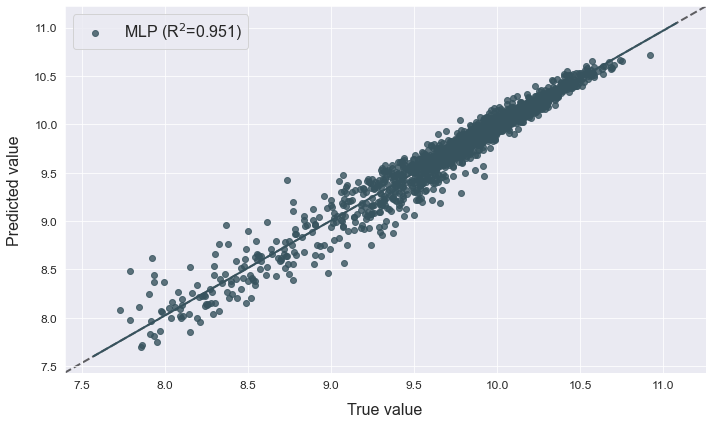

M$_{\mathrm{gas}}$ ready!


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [7]:
for par in list_parameters:
    hyp_pipeline(par)

We check the table with the obtained values and finally we save it

In [8]:
Hyp_tab

Parameter,alpha,batch_size,activation,hidden_layer_sizes,learning_rate_init,max_iter,MEDAE,R2
object,object,object,object,object,object,object,object,object
SFR,0.0002,195,relu,"(100, 83, 77)",0.002,500,-0.07094653236721227,0.9510133739396015
ISRF,0.0003,154,relu,"(91, 48, 56)",0.003,319,-0.13597205045747807,0.9232244944421248
ZGal,0.0002,105,relu,"(25, 68, 44)",0.006,357,-0.10742856234850884,0.8578378354236396
Pressure,0.0005,228,tanh,"(31, 58, 86)",0.005,267,-0.20276484130236305,0.9342203179420304
n$(\mathrm{H})_{\mathrm{cloud}}$,0.0006,151,relu,"(38, 54, 51)",0.009,245,-0.1268172056425041,0.9176624759199685
R$_{\mathrm{cloud}}$,0.0006,151,relu,"(38, 54, 51)",0.009,245,-0.026819085829875577,0.8433900303910054
M$_{\mathrm{\ast}}$,0.0016,45,tanh,"(25, 22, 35)",0.009,257,-0.10038696830321125,0.8482532922822618
M$_{\mathrm{gas}}$,0.0014,242,tanh,"(48, 34, 40)",0.007,260,-0.05607645921728199,0.939106008566844


In [9]:
Hyp_tab.write('../data/interim/Hyperparameters_table.csv', format='ascii.csv', overwrite=True)

##### Notebook info

In [10]:
%load_ext watermark
%watermark -a "Andres Ramos" -d -v -m
print('Specific Python packages')
%watermark -iv -w -p atom,astropy

Author: Andres Ramos

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 3.10.0-1160.59.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
atom   : 4.10.0
astropy: 5.0

sklearn : 1.0.1
autopep8: 1.5.7
numpy   : 1.22.1
json    : 2.0.9

Watermark: 2.2.0

